# Auswertung I3W

Die Ergebnisse des Trainings wurden hier abgelegt:

In [12]:
path_ray_results = "/home/thorsten/ray_results/IntersectionExample/"
folder_results = "PPO_MultiAgentIntersectionEnv_sharedPolicy_4veh-v0_0_2019-05-01_14-57-36jqgdbssf_40Rollouts500_gut"

## B) Auswertung des Trainings
Auswertung der csv, die während des Trainings erstellt worden ist.

In [13]:
filename_trainingprogress = path_ray_results \
                            + folder_results \
                            + "/progress.csv"

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import json

data = pd.read_csv(filename_trainingprogress,sep=',',header=0)
list(data)

['config',
 'episodes_total',
 'date',
 'timestamp',
 'policy_reward_mean',
 'time_total_s',
 'timesteps_this_iter',
 'num_metric_batches_dropped',
 'done',
 'episode_reward_max',
 'episodes_this_iter',
 'episode_len_mean',
 'experiment_id',
 'hostname',
 'episode_reward_mean',
 'time_since_restore',
 'time_this_iter_s',
 'pid',
 'info',
 'timesteps_total',
 'training_iteration',
 'node_ip',
 'custom_metrics',
 'timesteps_since_restore',
 'episode_reward_min',
 'iterations_since_restore']

In [14]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

N_RA = 10
pltAlpha = 0.25

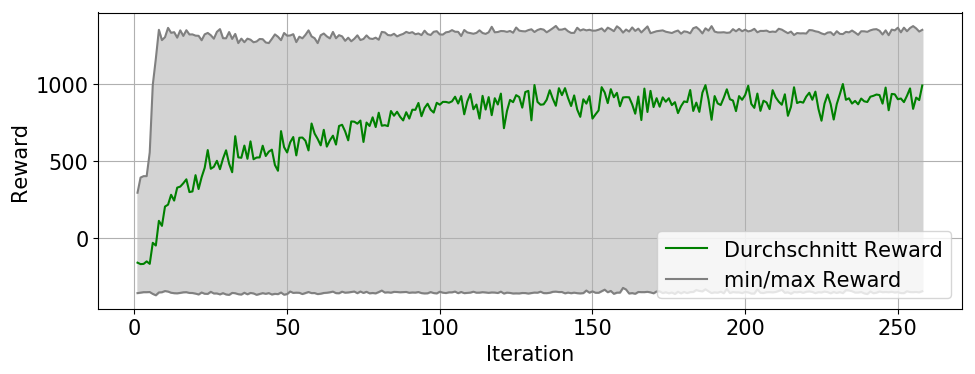

In [15]:
episode_reward_min = data[['episode_reward_min']].values
episode_reward_mean = data[['episode_reward_mean']].values
episode_reward_max = data[['episode_reward_max']].values
training_iteration = data[['training_iteration']].values
    
fig, ax1 = plt.subplots(figsize=(10,4),dpi=100)

ax1.plot(training_iteration,
         episode_reward_min,
         c='grey')
ax1.plot(training_iteration,
         episode_reward_mean,
         c='green',
         label='Durchschnitt Reward')
ax1.plot(training_iteration,
         episode_reward_max,
         c='grey',
         label='min/max Reward')
ax1.fill_between(np.squeeze(training_iteration),
                 np.squeeze(episode_reward_min),
                 np.squeeze(episode_reward_max),
                 color='lightgrey')

ax1.legend(loc='lower right')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Reward')
plt.grid()
plt.tight_layout()

plt.savefig("./training_EX2.png",dpi=100)

## C) Test durchführen

Um bei jedem rollout eine andere Startposition zu nutzen, muss im Ergebniss Ordner in *parms.json* der Parameter *starting_position_shuffle* auf *true* gesetzt werden.

Ausführen des Visualisierungsskripts, dort kann auch die logdatei angepasst werden.

In [2]:
! python /home/thorsten/flow_2/flow/flow/visualize/visualizer_rllib_log_veh4.py /home/thorsten/ray_results/IntersectionExample/PPO_MultiAgentIntersectionEnv_sharedPolicy_4veh-v0_0_2019-05-01_14-57-36jqgdbssf_40Rollouts500_gut 225 --num-rollouts 25

Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-05-06_13-03-20_9716/logs.
Waiting for redis server at 127.0.0.1:64921 to respond...
Waiting for redis server at 127.0.0.1:30925 to respond...
Starting the Plasma object store with 6.554658406 GB memory using /dev/shm.

View the web UI at http://localhost:8890/notebooks/ray_ui.ipynb?token=97a13c125362dd9c44b232b4688e066ebb3d26bc9b245e60

False
Created LogSyncer for /home/thorsten/ray_results/PPO_MultiAgentIntersectionEnv_sharedPolicy_4veh-v0_2019-05-06_13-03-21tcjq9255 -> None
2019-05-06 13:03:21,742	INFO ppo.py:130 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
2019-05-06 13:03:21,742	WARNING ppo.py:137 -- By default, observations will be normalized with MeanStdFilter
Loading configuration... done.
Success.
 Starting SUMO on port 59993
Loading configuration... done.
New Teamspirit:
0.3834086611234464
0.6

{'rl_0': array([ 1.46049950e-01,  1.01273237e-01,  9.88851965e-02,  1.23934854e-01,
        9.97437312e-01, -1.23401617e-03, -2.15994678e-03, -4.12842895e-04]), 'rl_1': array([ 1.01273237e-01,  1.46049950e-01,  9.88851965e-02,  1.23934854e-01,
        9.98671328e-01,  1.23401617e-03, -9.25930612e-04,  8.21173275e-04]), 'rl_3': array([ 1.23934854e-01,  1.46049950e-01,  1.01273237e-01,  9.88851965e-02,
        9.97850155e-01,  4.12842895e-04, -8.21173275e-04, -1.74710389e-03]), 'rl_2': array([9.88851965e-02, 1.46049950e-01, 1.01273237e-01, 1.23934854e-01,
       9.99597259e-01, 2.15994678e-03, 9.25930612e-04, 1.74710389e-03])}
{'rl_0': array([ 1.55950941e-01,  1.07900044e-01,  1.04948470e-01,  1.31917457e-01,
        9.97419037e-01, -1.23964713e-03, -2.16592363e-03, -4.15659319e-04]), 'rl_1': array([ 1.07900044e-01,  1.55950941e-01,  1.04948470e-01,  1.31917457e-01,
        9.98658684e-01,  1.23964713e-03, -9.26276500e-04,  8.23987816e-04]), 'rl_3': array([ 1.31917457e-01,  1.55950941e-0

{'rl_0': array([ 3.03681737e-01,  2.07222520e-01,  1.97505186e-01,  2.55899656e-01,
        9.97006541e-01, -1.36901835e-03, -2.30588327e-03, -4.79432220e-04]), 'rl_1': array([ 2.07222520e-01,  3.03681737e-01,  1.97505186e-01,  2.55899656e-01,
        9.98375560e-01,  1.36901835e-03, -9.36864919e-04,  8.89586129e-04]), 'rl_3': array([ 2.55899656e-01,  3.03681737e-01,  2.07222520e-01,  1.97505186e-01,
        9.97485974e-01,  4.79432220e-04, -8.89586129e-04, -1.82645105e-03]), 'rl_2': array([1.97505186e-01, 3.03681737e-01, 2.07222520e-01, 2.55899656e-01,
       9.99312425e-01, 2.30588327e-03, 9.36864919e-04, 1.82645105e-03])}
{'rl_0': array([ 3.13582720e-01,  2.13639337e-01,  2.02785506e-01,  2.64259851e-01,
        9.96969793e-01, -1.38073046e-03, -2.31886732e-03, -4.85212244e-04]), 'rl_1': array([ 2.13639337e-01,  3.13582720e-01,  2.02785506e-01,  2.64259851e-01,
        9.98350524e-01,  1.38073046e-03, -9.38136852e-04,  8.95518220e-04]), 'rl_3': array([ 2.64259851e-01,  3.13582720e-0

{'rl_0': array([ 4.62097467e-01,  3.03178023e-01,  2.91607850e-01,  3.86137308e-01,
        9.96232466e-01, -1.65670216e-03, -2.61686402e-03, -6.41580105e-04]), 'rl_1': array([ 3.03178023e-01,  4.62097467e-01,  2.91607850e-01,  3.86137308e-01,
        9.97889168e-01,  1.65670216e-03, -9.60161864e-04,  1.01512205e-03]), 'rl_3': array([ 3.86137308e-01,  4.62097467e-01,  3.03178023e-01,  2.91607850e-01,
        9.96874046e-01,  6.41580105e-04, -1.01512205e-03, -1.97528391e-03]), 'rl_2': array([2.91607850e-01, 4.62097467e-01, 3.03178023e-01, 3.86137308e-01,
       9.98849330e-01, 2.61686402e-03, 9.60161864e-04, 1.97528391e-03])}
{'rl_0': array([ 4.71998451e-01,  3.08882035e-01,  2.98045221e-01,  3.93588702e-01,
        9.96177154e-01, -1.67581736e-03, -2.63724916e-03, -6.50768747e-04]), 'rl_1': array([ 3.08882035e-01,  4.71998451e-01,  2.98045221e-01,  3.93588702e-01,
        9.97852971e-01,  1.67581736e-03, -9.61431803e-04,  1.02504861e-03]), 'rl_3': array([ 3.93588702e-01,  4.71998451e-0

{'rl_0': array([ 6.12302610e-01,  3.94005874e-01,  3.92897602e-01,  4.99382157e-01,
        9.95211790e-01, -2.02002643e-03, -2.99112669e-03, -8.87344595e-04]), 'rl_1': array([ 3.94005874e-01,  6.12302610e-01,  3.92897602e-01,  4.99382157e-01,
        9.97231816e-01,  2.02002643e-03, -9.71100259e-04,  1.13268183e-03]), 'rl_3': array([ 4.99382157e-01,  6.12302610e-01,  3.94005874e-01,  3.92897602e-01,
        9.96099134e-01,  8.87344595e-04, -1.13268183e-03, -2.10378209e-03]), 'rl_2': array([3.92897602e-01, 6.12302610e-01, 3.94005874e-01, 4.99382157e-01,
       9.98202916e-01, 2.99112669e-03, 9.71100259e-04, 2.10378209e-03])}
{'rl_0': array([ 6.20533208e-01,  4.00141774e-01,  3.99422217e-01,  5.05825113e-01,
        9.95139071e-01, -2.04585355e-03, -3.01703813e-03, -9.00786950e-04]), 'rl_1': array([ 4.00141774e-01,  6.20533208e-01,  3.99422217e-01,  5.05825113e-01,
        9.97184924e-01,  2.04585355e-03, -9.71184582e-04,  1.14506660e-03]), 'rl_3': array([ 5.05825113e-01,  6.20533208e-0

{'rl_0': array([ 0.71846255,  0.50253805,  0.49697752,  0.60001215,  0.99395146,
       -0.0025016 , -0.0034111 , -0.00111129]), 'rl_1': array([ 5.02538047e-01,  7.18462547e-01,  4.96977523e-01,  6.00012153e-01,
        9.96453058e-01,  2.50160132e-03, -9.09495094e-04,  1.39030654e-03]), 'rl_3': array([ 0.60001215,  0.71846255,  0.50253805,  0.49697752,  0.99506275,
        0.00111129, -0.00139031, -0.0022998 ]), 'rl_2': array([4.96977523e-01, 7.18462547e-01, 5.02538047e-01, 6.00012153e-01,
       9.97362553e-01, 3.41109641e-03, 9.09495094e-04, 2.29980163e-03])}
{'rl_0': array([ 0.724099  ,  0.51032497,  0.50355428,  0.60637904,  0.9938666 ,
       -0.00252665, -0.00343694, -0.00112509]), 'rl_1': array([ 5.10324969e-01,  7.24098998e-01,  5.03554285e-01,  6.06379037e-01,
        9.96393255e-01,  2.52665296e-03, -9.10288534e-04,  1.40156288e-03]), 'rl_3': array([ 0.60637904,  0.724099  ,  0.51032497,  0.50355428,  0.99499169,
        0.00112509, -0.00140156, -0.00231185]), 'rl_2': array(

{'rl_0': array([ 0.80983589,  0.64413266,  0.61099352,  0.70696703,  0.99232963,
       -0.00290678, -0.00380917, -0.00134762]), 'rl_1': array([ 6.44132655e-01,  8.09835890e-01,  6.10993522e-01,  7.06967028e-01,
        9.95236401e-01,  2.90677560e-03, -9.02392238e-04,  1.55915798e-03]), 'rl_3': array([ 0.70696703,  0.80983589,  0.64413266,  0.61099352,  0.99367724,
        0.00134762, -0.00155916, -0.00246155]), 'rl_2': array([6.10993522e-01, 8.09835890e-01, 6.44132655e-01, 7.06967028e-01,
       9.96138794e-01, 3.80916784e-03, 9.02392238e-04, 2.46155022e-03])}
{'rl_0': array([ 0.81422328,  0.65215494,  0.61704912,  0.71202315,  0.99223421,
       -0.00292577, -0.00383227, -0.00135959]), 'rl_1': array([ 6.52154935e-01,  8.14223285e-01,  6.17049124e-01,  7.12023146e-01,
        9.95159977e-01,  2.92576798e-03, -9.06506200e-04,  1.56617379e-03]), 'rl_3': array([ 0.71202315,  0.81422328,  0.65215494,  0.61704912,  0.9935938 ,
        0.00135959, -0.00156617, -0.00247268]), 'rl_2': array(

{'rl_0': array([ 0.88261188,  0.78048935,  0.70933017,  0.80095404,  0.99063798,
       -0.00317068, -0.00417898, -0.001532  ]), 'rl_1': array([ 0.78048935,  0.88261188,  0.70933017,  0.80095404,  0.99380866,
        0.00317068, -0.0010083 ,  0.00163868]), 'rl_3': array([ 0.80095404,  0.88261188,  0.78048935,  0.70933017,  0.99216998,
        0.001532  , -0.00163868, -0.00264698]), 'rl_2': array([0.70933017, 0.88261188, 0.78048935, 0.80095404, 0.99481696,
       0.00417898, 0.0010083 , 0.00264698])}
{'rl_0': array([ 0.88704074,  0.78814953,  0.71499204,  0.80622621,  0.99053403,
       -0.00318227, -0.00419914, -0.00154147]), 'rl_1': array([ 0.78814953,  0.88704074,  0.71499204,  0.80622621,  0.9937163 ,
        0.00318227, -0.00101688,  0.0016408 ]), 'rl_3': array([ 0.80622621,  0.88704074,  0.78814953,  0.71499204,  0.9920755 ,
        0.00154147, -0.0016408 , -0.00265767]), 'rl_2': array([0.71499204, 0.88704074, 0.78814953, 0.80622621, 0.99473317,
       0.00419914, 0.00101688, 0.00

{'rl_0': array([ 0.94919494,  0.9041285 ,  0.80010831,  0.88834285,  0.98880863,
       -0.00331086, -0.00449832, -0.00167258]), 'rl_1': array([ 0.9041285 ,  0.94919494,  0.80010831,  0.88834285,  0.99211949,
        0.00331086, -0.00118747,  0.00163828]), 'rl_3': array([ 0.88834285,  0.94919494,  0.9041285 ,  0.80010831,  0.99048121,
        0.00167258, -0.00163828, -0.00282574]), 'rl_2': array([0.80010831, 0.94919494, 0.9041285 , 0.88834285, 0.99330695,
       0.00449832, 0.00118747, 0.00282574])}
{'rl_0': array([ 0.9530171 ,  0.91062452,  0.80509948,  0.89308857,  0.98869695,
       -0.00331582, -0.00451565, -0.0016796 ]), 'rl_1': array([ 0.91062452,  0.9530171 ,  0.80509948,  0.89308857,  0.99201277,
        0.00331582, -0.00119983,  0.00163622]), 'rl_3': array([ 0.89308857,  0.9530171 ,  0.91062452,  0.80509948,  0.99037655,
        0.0016796 , -0.00163622, -0.00283605]), 'rl_2': array([0.80509948, 0.9530171 , 0.91062452, 0.89308857, 0.9932126 ,
       0.00451565, 0.00119983, 0.00

{'rl_0': array([ 1.03125003,  1.02499449,  0.9076075 ,  0.98915797,  0.9862494 ,
       -0.0033676 , -0.00484758, -0.0018033 ]), 'rl_1': array([ 1.02499449,  1.03125003,  0.9076075 ,  0.98915797,  0.98961699,
        0.0033676 , -0.00147998,  0.0015643 ]), 'rl_3': array([ 0.98915797,  1.03125003,  1.02499449,  0.9076075 ,  0.98805269,
        0.0018033 , -0.0015643 , -0.00304428]), 'rl_2': array([0.9076075 , 1.03125003, 1.02499449, 0.98915797, 0.99109697,
       0.00484758, 0.00147998, 0.00304428])}
{'rl_0': array([ 1.03500162,  1.0296664 ,  0.9122522 ,  0.99363749,  0.98612811,
       -0.00336822, -0.00486196, -0.00180815]), 'rl_1': array([ 1.0296664 ,  1.03500162,  0.9122522 ,  0.99363749,  0.98949633,
        0.00336822, -0.00149374,  0.00156008]), 'rl_3': array([ 0.99363749,  1.03500162,  1.0296664 ,  0.9122522 ,  0.98793625,
        0.00180815, -0.00156008, -0.00305382]), 'rl_2': array([0.9122522 , 1.03500162, 1.0296664 , 0.99363749, 0.99099007,
       0.00486196, 0.00149374, 0.00

New Teamspirit:
-0.8345629739633726
0.1637583873274986
[('bottom_intersection', 8.91441242416994), ('bottom_intersection', 70.41299162742456), ('top_intersection', 15.098091349159107), ('top_intersection', 52.081525173809986)]
{'rl_0': array([9.42978922e-03, 6.05514291e-03, 9.90099049e-03, 9.74495320e-03,
       9.99650676e-01, 1.68581988e-03, 2.40234347e-03, 2.41586891e-04]), 'rl_1': array([ 6.05514291e-03,  9.42978922e-03,  9.90099049e-03,  9.74495320e-03,
        9.97964856e-01, -1.68581988e-03,  7.16523594e-04, -1.44423298e-03]), 'rl_3': array([ 9.74495320e-03,  9.42978922e-03,  6.05514291e-03,  9.90099049e-03,
        9.99409089e-01, -2.41586891e-04,  1.44423298e-03,  2.16075658e-03]), 'rl_2': array([ 9.90099049e-03,  9.42978922e-03,  6.05514291e-03,  9.74495320e-03,
        9.97248332e-01, -2.40234347e-03, -7.16523594e-04, -2.16075658e-03])}
{'rl_0': array([1.84816017e-02, 1.24781233e-02, 1.98019796e-02, 1.96459426e-02,
       9.99648510e-01, 1.68511634e-03, 2.40249820e-03, 2.417

{'rl_0': array([1.41957979e-01, 9.57368851e-02, 1.48514872e-01, 1.38159582e-01,
       9.99518105e-01, 1.64126417e-03, 2.40784521e-03, 2.39613291e-04]), 'rl_1': array([ 9.57368851e-02,  1.41957979e-01,  1.48514872e-01,  1.38159582e-01,
        9.97876841e-01, -1.64126417e-03,  7.66581034e-04, -1.40165088e-03]), 'rl_3': array([ 1.38159582e-01,  1.41957979e-01,  9.57368851e-02,  1.48514872e-01,
        9.99278492e-01, -2.39613291e-04,  1.40165088e-03,  2.16823192e-03]), 'rl_2': array([ 1.48514872e-01,  1.41957979e-01,  9.57368851e-02,  1.38159582e-01,
        9.97110260e-01, -2.40784521e-03, -7.66581034e-04, -2.16823192e-03])}
{'rl_0': array([1.51259785e-01, 1.02883832e-01, 1.58415871e-01, 1.46799048e-01,
       9.99500379e-01, 1.63559511e-03, 2.40868381e-03, 2.39090548e-04]), 'rl_1': array([ 1.02883832e-01,  1.51259785e-01,  1.58415871e-01,  1.46799048e-01,
        9.97864784e-01, -1.63559511e-03,  7.73088695e-04, -1.39650457e-03]), 'rl_3': array([ 1.46799048e-01,  1.51259785e-01,  1.02

{'rl_0': array([2.76072822e-01, 2.05692418e-01, 2.97029795e-01, 2.50293401e-01,
       9.99142776e-01, 1.53784041e-03, 2.43281064e-03, 2.17879171e-04]), 'rl_1': array([ 2.05692418e-01,  2.76072822e-01,  2.97029795e-01,  2.50293401e-01,
        9.97604936e-01, -1.53784041e-03,  8.94970228e-04, -1.31996124e-03]), 'rl_3': array([ 2.50293401e-01,  2.76072822e-01,  2.05692418e-01,  2.97029795e-01,
        9.98924897e-01, -2.17879171e-04,  1.31996124e-03,  2.21493147e-03]), 'rl_2': array([ 2.97029795e-01,  2.76072822e-01,  2.05692418e-01,  2.50293401e-01,
        9.96709966e-01, -2.43281064e-03, -8.94970228e-04, -2.21493147e-03])}
{'rl_0': array([2.83681504e-01, 2.13343168e-01, 3.06930778e-01, 2.57377782e-01,
       9.99109532e-01, 1.52959764e-03, 2.48241017e-03, 2.14796703e-04]), 'rl_1': array([ 2.13343168e-01,  2.83681504e-01,  3.06930778e-01,  2.57377782e-01,
        9.97579935e-01, -1.52959764e-03,  9.52812526e-04, -1.31480094e-03]), 'rl_3': array([ 2.57377782e-01,  2.83681504e-01,  2.13

{'rl_0': array([4.03602488e-01, 3.16430679e-01, 4.43057263e-01, 3.35148151e-01,
       9.98542983e-01, 1.40517789e-03, 2.53957423e-03, 1.42156418e-04]), 'rl_1': array([ 0.31643068,  0.40360249,  0.44305726,  0.33514815,  0.9971378 ,
       -0.00140518,  0.0011344 , -0.00126302]), 'rl_3': array([ 3.35148151e-01,  4.03602488e-01,  3.16430679e-01,  4.43057263e-01,
        9.98400826e-01, -1.42156418e-04,  1.26302147e-03,  2.39741781e-03]), 'rl_2': array([ 0.44305726,  0.40360249,  0.31643068,  0.33514815,  0.99600341,
       -0.00253957, -0.0011344 , -0.00239742])}
{'rl_0': array([4.12406052e-01, 3.24645357e-01, 4.52958247e-01, 3.40822286e-01,
       9.98494654e-01, 1.39489343e-03, 2.54432644e-03, 1.33767696e-04]), 'rl_1': array([ 0.32464536,  0.41240605,  0.45295825,  0.34082229,  0.99709976,
       -0.00139489,  0.00114943, -0.00126113]), 'rl_3': array([ 3.40822286e-01,  4.12406052e-01,  3.24645357e-01,  4.52958247e-01,
        9.98360886e-01, -1.33767696e-04,  1.26112573e-03,  2.410558

{'rl_0': array([ 5.17077505e-01,  4.33861708e-01,  5.60816333e-01,  4.12729516e-01,
        9.97726263e-01,  1.19298893e-03,  2.61945075e-03, -1.03139500e-05]), 'rl_1': array([ 0.43386171,  0.5170775 ,  0.56081633,  0.41272952,  0.99653327,
       -0.00119299,  0.00142646, -0.0012033 ]), 'rl_3': array([4.12729516e-01, 5.17077505e-01, 4.33861708e-01, 5.60816333e-01,
       9.97736577e-01, 1.03139500e-05, 1.20330288e-03, 2.62976470e-03]), 'rl_2': array([ 0.56081633,  0.5170775 ,  0.43386171,  0.41272952,  0.99510681,
       -0.00261945, -0.00142646, -0.00262976])}
{'rl_0': array([ 5.20565030e-01,  4.43762697e-01,  5.69549710e-01,  4.16599673e-01,
        9.97665259e-01,  1.18398866e-03,  2.62519114e-03, -2.24973903e-05]), 'rl_1': array([ 0.4437627 ,  0.52056503,  0.56954971,  0.41659967,  0.99648127,
       -0.00118399,  0.0014412 , -0.00120649]), 'rl_3': array([4.16599673e-01, 5.20565030e-01, 4.43762697e-01, 5.69549710e-01,
       9.97687757e-01, 2.24973903e-05, 1.20648605e-03, 2.647688

{'rl_0': array([ 6.15603627e-01,  5.61332568e-01,  6.59007784e-01,  4.92729694e-01,
        9.96547912e-01,  1.01555070e-03,  2.66842454e-03, -2.82200487e-04]), 'rl_1': array([ 0.56133257,  0.61560363,  0.65900778,  0.49272969,  0.99553236,
       -0.00101555,  0.00165287, -0.00129775]), 'rl_3': array([4.92729694e-01, 6.15603627e-01, 5.61332568e-01, 6.59007784e-01,
       9.96830113e-01, 2.82200487e-04, 1.29775119e-03, 2.95062503e-03]), 'rl_2': array([ 0.65900778,  0.61560363,  0.56133257,  0.49272969,  0.99387949,
       -0.00266842, -0.00165287, -0.00295063])}
{'rl_0': array([ 6.20712877e-01,  5.68353696e-01,  6.64222136e-01,  4.97434772e-01,
        9.96475172e-01,  1.00941486e-03,  2.67352328e-03, -2.96647140e-04]), 'rl_1': array([ 0.5683537 ,  0.62071288,  0.66422214,  0.49743477,  0.99546576,
       -0.00100941,  0.00166411, -0.00130606]), 'rl_3': array([4.97434772e-01, 6.20712877e-01, 5.68353696e-01, 6.64222136e-01,
       9.96771819e-01, 2.96647140e-04, 1.30606200e-03, 2.970170

{'rl_0': array([ 6.91549010e-01,  6.63820989e-01,  7.25120312e-01,  5.60222368e-01,
        9.95473922e-01,  9.50004378e-04,  2.73619352e-03, -5.54409460e-04]), 'rl_1': array([ 6.63820989e-01,  6.91549010e-01,  7.25120312e-01,  5.60222368e-01,
        9.94523917e-01, -9.50004378e-04,  1.78618914e-03, -1.50441384e-03]), 'rl_3': array([5.60222368e-01, 6.91549010e-01, 6.63820989e-01, 7.25120312e-01,
       9.96028331e-01, 5.54409460e-04, 1.50441384e-03, 3.29060298e-03]), 'rl_2': array([ 0.72512031,  0.69154901,  0.66382099,  0.56022237,  0.99273773,
       -0.00273619, -0.00178619, -0.0032906 ])}
{'rl_0': array([ 6.97911408e-01,  6.70458791e-01,  7.29298265e-01,  5.65249085e-01,
        9.95392135e-01,  9.46787274e-04,  2.73987167e-03, -5.69955826e-04]), 'rl_1': array([ 6.70458791e-01,  6.97911408e-01,  7.29298265e-01,  5.65249085e-01,
        9.94445348e-01, -9.46787274e-04,  1.79308439e-03, -1.51674310e-03]), 'rl_3': array([5.65249085e-01, 6.97911408e-01, 6.70458791e-01, 7.29298265e-01,

{'rl_0': array([ 7.80367705e-01,  7.69382759e-01,  7.84361692e-01,  6.32493904e-01,
        9.94258935e-01,  9.16787957e-04,  2.76329438e-03, -7.86855820e-04]), 'rl_1': array([ 7.69382759e-01,  7.80367705e-01,  7.84361692e-01,  6.32493904e-01,
        9.93342147e-01, -9.16787957e-04,  1.84650642e-03, -1.70364378e-03]), 'rl_3': array([6.32493904e-01, 7.80367705e-01, 7.69382759e-01, 7.84361692e-01,
       9.95045790e-01, 7.86855820e-04, 1.70364378e-03, 3.55015020e-03]), 'rl_2': array([ 0.78436169,  0.78036771,  0.76938276,  0.6324939 ,  0.99149564,
       -0.00276329, -0.00184651, -0.00355015])}
{'rl_0': array([ 7.85988485e-01,  7.76409832e-01,  7.87941610e-01,  6.37677932e-01,
        9.94166827e-01,  9.15665459e-04,  2.76352326e-03, -8.04235963e-04]), 'rl_1': array([ 7.76409832e-01,  7.85988485e-01,  7.87941610e-01,  6.37677932e-01,
        9.93251161e-01, -9.15665459e-04,  1.84785780e-03, -1.71990142e-03]), 'rl_3': array([6.37677932e-01, 7.85988485e-01, 7.76409832e-01, 7.87941610e-01,

{'rl_0': array([ 8.77679444e-01,  8.87882369e-01,  8.52390861e-01,  7.23548826e-01,
        9.92500467e-01,  9.17368234e-04,  2.73579876e-03, -1.10868508e-03]), 'rl_1': array([ 8.87882369e-01,  8.77679444e-01,  8.52390861e-01,  7.23548826e-01,
        9.91583099e-01, -9.17368234e-04,  1.81843053e-03, -2.02605331e-03]), 'rl_3': array([0.72354883, 0.87767944, 0.88788237, 0.85239086, 0.99360915,
       0.00110869, 0.00202605, 0.00384448]), 'rl_2': array([ 0.85239086,  0.87767944,  0.88788237,  0.72354883,  0.98976467,
       -0.0027358 , -0.00181843, -0.00384448])}
{'rl_0': array([ 8.82605187e-01,  8.94184983e-01,  8.55849583e-01,  7.28738954e-01,
        9.92397037e-01,  9.18725242e-04,  2.73266334e-03, -1.12671628e-03]), 'rl_1': array([ 8.94184983e-01,  8.82605187e-01,  8.55849583e-01,  7.28738954e-01,
        9.91478312e-01, -9.18725242e-04,  1.81393810e-03, -2.04544152e-03]), 'rl_3': array([0.72873895, 0.88260519, 0.89418498, 0.85584958, 0.99352375,
       0.00112672, 0.00204544, 0.00

{'rl_0': array([ 9.59451792e-01,  9.86404893e-01,  9.16940322e-01,  8.09370381e-01,
        9.90555161e-01,  9.56940320e-04,  2.65978751e-03, -1.43060485e-03]), 'rl_1': array([ 9.86404893e-01,  9.59451792e-01,  9.16940322e-01,  8.09370381e-01,
        9.89598221e-01, -9.56940320e-04,  1.70284719e-03, -2.38754517e-03]), 'rl_3': array([0.80937038, 0.95945179, 0.98640489, 0.91694032, 0.99198577,
       0.0014306 , 0.00238755, 0.00409039]), 'rl_2': array([ 0.91694032,  0.95945179,  0.98640489,  0.80937038,  0.98789537,
       -0.00265979, -0.00170285, -0.00409039])}
{'rl_0': array([ 9.63066574e-01,  9.91450085e-01,  9.20922449e-01,  8.14001125e-01,
        9.90442302e-01,  9.60266513e-04,  2.65484875e-03, -1.44807345e-03]), 'rl_1': array([ 9.91450085e-01,  9.63066574e-01,  9.20922449e-01,  8.14001125e-01,
        9.89482036e-01, -9.60266513e-04,  1.69458224e-03, -2.40833997e-03]), 'rl_3': array([0.81400112, 0.96306657, 0.99145008, 0.92092245, 0.99189038,
       0.00144807, 0.00240834, 0.00

{'rl_0': array([ 1.01325115e+00,  1.05979105e+00,  9.69836161e-01,  8.77057396e-01,
        9.88818162e-01,  1.02326926e-03,  2.58498399e-03, -1.68113371e-03]), 'rl_1': array([ 1.05979105e+00,  1.01325115e+00,  9.69836161e-01,  8.77057396e-01,
        9.87794892e-01, -1.02326926e-03,  1.56171473e-03, -2.70440297e-03]), 'rl_3': array([0.8770574 , 1.01325115, 1.05979105, 0.96983616, 0.9904993 ,
       0.00168113, 0.0027044 , 0.00426612]), 'rl_2': array([ 0.96983616,  1.01325115,  1.05979105,  0.8770574 ,  0.98623318,
       -0.00258498, -0.00156171, -0.00426612])}
{'rl_0': array([ 1.01668403e+00,  1.06429951e+00,  9.73032082e-01,  8.81359944e-01,
        9.88699019e-01,  1.02884920e-03,  2.57986853e-03, -1.69699200e-03]), 'rl_1': array([ 1.06429951e+00,  1.01668403e+00,  9.73032082e-01,  8.81359944e-01,
        9.87670170e-01, -1.02884920e-03,  1.55101933e-03, -2.72584120e-03]), 'rl_3': array([0.88135994, 1.01668403, 1.06429951, 0.97303208, 0.99039601,
       0.00169699, 0.00272584, 0.00

New Teamspirit:
-0.9300733782595147
-0.13252272757782646
[('bottom_intersection', 27.898696813099754), ('bottom_intersection', 72.38137616498932), ('top_intersection', 27.276224895213154), ('top_intersection', 69.91765046429126)]
{'rl_0': array([ 9.90099049e-03,  9.79572731e-03,  8.49451169e-03,  7.71392641e-03,
        9.97171442e-01, -1.73761700e-03, -9.64041069e-05, -1.76217627e-03]), 'rl_1': array([ 9.79572731e-03,  9.90099049e-03,  8.49451169e-03,  7.71392641e-03,
        9.98909059e-01,  1.73761700e-03,  1.64121289e-03, -2.45592703e-05]), 'rl_3': array([7.71392641e-03, 9.90099049e-03, 9.79572731e-03, 8.49451169e-03,
       9.98933618e-01, 1.76217627e-03, 2.45592703e-05, 1.66577216e-03]), 'rl_2': array([ 8.49451169e-03,  9.90099049e-03,  9.79572731e-03,  7.71392641e-03,
        9.97267846e-01,  9.64041069e-05, -1.64121289e-03, -1.66577216e-03])}
{'rl_0': array([ 1.98019796e-02,  1.96967178e-02,  1.68702081e-02,  1.52254881e-02,
        9.97169122e-01, -1.73762933e-03, -9.67476739e

{'rl_0': array([ 1.77980579e-01,  1.77987668e-01,  1.50948803e-01,  1.33522109e-01,
        9.96974590e-01, -1.73760902e-03, -1.25950411e-04, -1.80920189e-03]), 'rl_1': array([ 1.77987668e-01,  1.77980579e-01,  1.50948803e-01,  1.33522109e-01,
        9.98712199e-01,  1.73760902e-03,  1.61165861e-03, -7.15928693e-05]), 'rl_3': array([1.33522109e-01, 1.77980579e-01, 1.77987668e-01, 1.50948803e-01,
       9.98783792e-01, 1.80920189e-03, 7.15928693e-05, 1.68325148e-03]), 'rl_2': array([ 1.50948803e-01,  1.77980579e-01,  1.77987668e-01,  1.33522109e-01,
        9.97100541e-01,  1.25950411e-04, -1.61165861e-03, -1.68325148e-03])}
{'rl_0': array([ 1.87881578e-01,  1.87553937e-01,  1.59087067e-01,  1.40311598e-01,
        9.96952573e-01, -1.73764741e-03, -1.29324768e-04, -1.81477650e-03]), 'rl_1': array([ 1.87553937e-01,  1.87881578e-01,  1.59087067e-01,  1.40311598e-01,
        9.98690220e-01,  1.73764741e-03,  1.60832265e-03, -7.71290810e-05]), 'rl_3': array([1.40311598e-01, 1.87881578e-01,

{'rl_0': array([ 3.45903534e-01,  3.43171742e-01,  2.91937340e-01,  2.40879069e-01,
        9.96395669e-01, -1.78618817e-03, -2.55203011e-04, -2.00673858e-03]), 'rl_1': array([ 3.43171742e-01,  3.45903534e-01,  2.91937340e-01,  2.40879069e-01,
        9.98181857e-01,  1.78618817e-03,  1.53098516e-03, -2.20550404e-04]), 'rl_3': array([2.40879069e-01, 3.45903534e-01, 3.43171742e-01, 2.91937340e-01,
       9.98402408e-01, 2.00673858e-03, 2.20550404e-04, 1.75153557e-03]), 'rl_2': array([ 2.91937340e-01,  3.45903534e-01,  3.43171742e-01,  2.40879069e-01,
        9.96650872e-01,  2.55203011e-04, -1.53098516e-03, -1.75153557e-03])}
{'rl_0': array([ 3.55604123e-01,  3.52905560e-01,  2.99985481e-01,  2.46754794e-01,
        9.96353997e-01, -1.78650441e-03, -2.61720820e-04, -2.01949436e-03]), 'rl_1': array([ 3.52905560e-01,  3.55604123e-01,  2.99985481e-01,  2.46754794e-01,
        9.98140501e-01,  1.78650441e-03,  1.52478359e-03, -2.32989947e-04]), 'rl_3': array([2.46754794e-01, 3.55604123e-01,

{'rl_0': array([ 4.78757616e-01,  4.73344594e-01,  4.02971056e-01,  3.26351006e-01,
        9.95710030e-01, -1.79453239e-03, -4.28427235e-04, -2.22303763e-03]), 'rl_1': array([ 4.73344594e-01,  4.78757616e-01,  4.02971056e-01,  3.26351006e-01,
        9.97504562e-01,  1.79453239e-03,  1.36610516e-03, -4.28505240e-04]), 'rl_3': array([3.26351006e-01, 4.78757616e-01, 4.73344594e-01, 4.02971056e-01,
       9.97933067e-01, 2.22303763e-03, 4.28505240e-04, 1.79461040e-03]), 'rl_2': array([ 4.02971056e-01,  4.78757616e-01,  4.73344594e-01,  3.26351006e-01,
        9.96138457e-01,  4.28427235e-04, -1.36610516e-03, -1.79461040e-03])}
{'rl_0': array([ 4.88163351e-01,  4.82093677e-01,  4.10425285e-01,  3.32404163e-01,
        9.95652823e-01, -1.79524368e-03, -4.37537164e-04, -2.24129066e-03]), 'rl_1': array([ 4.82093677e-01,  4.88163351e-01,  4.10425285e-01,  3.32404163e-01,
        9.97448067e-01,  1.79524368e-03,  1.35770652e-03, -4.46046980e-04]), 'rl_3': array([3.32404163e-01, 4.88163351e-01,

{'rl_0': array([ 6.06670123e-01,  5.95258572e-01,  5.11939537e-01,  4.23981626e-01,
        9.94744797e-01, -1.76350996e-03, -5.82028440e-04, -2.52420621e-03]), 'rl_1': array([ 5.95258572e-01,  6.06670123e-01,  5.11939537e-01,  4.23981626e-01,
        9.96508307e-01,  1.76350996e-03,  1.18148152e-03, -7.60696250e-04]), 'rl_3': array([4.23981626e-01, 6.06670123e-01, 5.95258572e-01, 5.11939537e-01,
       9.97269004e-01, 2.52420621e-03, 7.60696250e-04, 1.94217777e-03]), 'rl_2': array([ 5.11939537e-01,  6.06670123e-01,  5.95258572e-01,  4.23981626e-01,
        9.95326826e-01,  5.82028440e-04, -1.18148152e-03, -1.94217777e-03])}
{'rl_0': array([ 6.13930640e-01,  6.02116417e-01,  5.18978838e-01,  4.30038946e-01,
        9.94672852e-01, -1.76489444e-03, -5.93155605e-04, -2.54575602e-03]), 'rl_1': array([ 6.02116417e-01,  6.13930640e-01,  5.18978838e-01,  4.30038946e-01,
        9.96437747e-01,  1.76489444e-03,  1.17173884e-03, -7.80861578e-04]), 'rl_3': array([4.30038946e-01, 6.13930640e-01,

{'rl_0': array([ 7.07466437e-01,  6.85850005e-01,  6.12610498e-01,  5.20922677e-01,
        9.93581168e-01, -1.79287980e-03, -7.51610791e-04, -2.91590459e-03]), 'rl_1': array([ 0.68585   ,  0.70746644,  0.6126105 ,  0.52092268,  0.99537405,
        0.00179288,  0.00104127, -0.00112302]), 'rl_3': array([0.52092268, 0.70746644, 0.68585   , 0.6126105 , 0.99649707,
       0.0029159 , 0.00112302, 0.00216429]), 'rl_2': array([ 6.12610498e-01,  7.07466437e-01,  6.85850005e-01,  5.20922677e-01,
        9.94332779e-01,  7.51610791e-04, -1.04126901e-03, -2.16429380e-03])}
{'rl_0': array([ 7.13116287e-01,  6.91758579e-01,  6.19609965e-01,  5.27435281e-01,
        9.93497600e-01, -1.79538266e-03, -7.62568563e-04, -2.93766409e-03]), 'rl_1': array([ 0.69175858,  0.71311629,  0.61960996,  0.52743528,  0.99529298,
        0.00179538,  0.00103281, -0.00114228]), 'rl_3': array([0.52743528, 0.71311629, 0.69175858, 0.61960996, 0.99643526,
       0.00293766, 0.00114228, 0.0021751 ]), 'rl_2': array([ 6.1960

{'rl_0': array([ 7.89303527e-01,  7.62696415e-01,  7.16151949e-01,  6.19553556e-01,
        9.92170408e-01, -1.83827834e-03, -9.09932438e-04, -3.25059547e-03]), 'rl_1': array([ 7.62696415e-01,  7.89303527e-01,  7.16151949e-01,  6.19553556e-01,
        9.94008687e-01,  1.83827834e-03,  9.28345905e-04, -1.41231713e-03]), 'rl_3': array([0.61955356, 0.78930353, 0.76269642, 0.71615195, 0.995421  ,
       0.0032506 , 0.00141232, 0.00234066]), 'rl_2': array([ 7.16151949e-01,  7.89303527e-01,  7.62696415e-01,  6.19553556e-01,
        9.93080341e-01,  9.09932438e-04, -9.28345905e-04, -2.34066303e-03])}
{'rl_0': array([ 7.93197223e-01,  7.66821680e-01,  7.22374048e-01,  6.25338183e-01,
        9.92077456e-01, -1.84136923e-03, -9.18232029e-04, -3.27026645e-03]), 'rl_1': array([ 7.66821680e-01,  7.93197223e-01,  7.22374048e-01,  6.25338183e-01,
        9.93918825e-01,  1.84136923e-03,  9.23137198e-04, -1.42889723e-03]), 'rl_3': array([0.62533818, 0.79319722, 0.76682168, 0.72237405, 0.99534772,
   

{'rl_0': array([ 0.85820458,  0.83639573,  0.82139753,  0.72095601,  0.99042757,
       -0.00188984, -0.0010211 , -0.00357209]), 'rl_1': array([ 8.36395731e-01,  8.58204579e-01,  8.21397532e-01,  7.20956013e-01,
        9.92317409e-01,  1.88984277e-03,  8.68738661e-04, -1.68225068e-03]), 'rl_3': array([0.72095601, 0.85820458, 0.83639573, 0.82139753, 0.99399966,
       0.00357209, 0.00168225, 0.00255099]), 'rl_2': array([ 8.21397532e-01,  8.58204579e-01,  8.36395731e-01,  7.20956013e-01,
        9.91448670e-01,  1.02110410e-03, -8.68738661e-04, -2.55098935e-03])}
{'rl_0': array([ 0.86156536,  0.83991039,  0.8266462 ,  0.72633331,  0.9903266 ,
       -0.00189238, -0.0010252 , -0.00358794]), 'rl_1': array([ 8.39910392e-01,  8.61565361e-01,  8.26646198e-01,  7.26333314e-01,
        9.92218982e-01,  1.89238046e-03,  8.67184264e-04, -1.69556050e-03]), 'rl_3': array([0.72633331, 0.86156536, 0.83991039, 0.8266462 , 0.99391454,
       0.00358794, 0.00169556, 0.00256274]), 'rl_2': array([ 8.2664

{'rl_0': array([ 0.92509274,  0.90784606,  0.91599503,  0.82147157,  0.98833423,
       -0.0019351 , -0.00106795, -0.00384888]), 'rl_1': array([ 9.07846060e-01,  9.25092737e-01,  9.15995027e-01,  8.21471567e-01,
        9.90269331e-01,  1.93510140e-03,  8.67152919e-04, -1.91378138e-03]), 'rl_3': array([0.82147157, 0.92509274, 0.90784606, 0.91599503, 0.99218311,
       0.00384888, 0.00191378, 0.00278093]), 'rl_2': array([ 9.15995027e-01,  9.25092737e-01,  9.07846060e-01,  8.21471567e-01,
        9.89402179e-01,  1.06794849e-03, -8.67152919e-04, -2.78093430e-03])}
{'rl_0': array([ 0.92810914,  0.91144813,  0.91997981,  0.82622971,  0.98822547,
       -0.00193705, -0.0010689 , -0.00386082]), 'rl_1': array([ 9.11448125e-01,  9.28109141e-01,  9.19979811e-01,  8.26229706e-01,
        9.90162521e-01,  1.93705387e-03,  8.68152726e-04, -1.92376792e-03]), 'rl_3': array([0.82622971, 0.92810914, 0.91144813, 0.91997981, 0.99208629,
       0.00386082, 0.00192377, 0.00279192]), 'rl_2': array([ 9.1997

{'rl_0': array([ 0.9708666 ,  0.96023679,  0.97484342,  0.88877634,  0.98666519,
       -0.00195899, -0.00107054, -0.00400952]), 'rl_1': array([ 9.60236791e-01,  9.70866600e-01,  9.74843420e-01,  8.88776339e-01,
        9.88624178e-01,  1.95898672e-03,  8.88447612e-04, -2.05053623e-03]), 'rl_3': array([0.88877634, 0.9708666 , 0.96023679, 0.97484342, 0.99067471,
       0.00400952, 0.00205054, 0.00293898]), 'rl_2': array([ 9.74843420e-01,  9.70866600e-01,  9.60236791e-01,  8.88776339e-01,
        9.87735730e-01,  1.07053911e-03, -8.88447612e-04, -2.93898384e-03])}
{'rl_0': array([ 0.97401963,  0.96413957,  0.97870903,  0.89314221,  0.98655105,
       -0.00196014, -0.00106999, -0.004019  ]), 'rl_1': array([ 9.64139566e-01,  9.74019627e-01,  9.78709030e-01,  8.93142211e-01,
        9.88511193e-01,  1.96014454e-03,  8.90154971e-04, -2.05885623e-03]), 'rl_3': array([0.89314221, 0.97401963, 0.96413957, 0.97870903, 0.99057005,
       0.004019  , 0.00205886, 0.00294901]), 'rl_2': array([ 9.7870

{'rl_0': array([ 1.02595658,  1.0204044 ,  1.03456336,  0.95986888,  0.98455584,
       -0.00197392, -0.00105502, -0.0041631 ]), 'rl_1': array([ 1.02040440e+00,  1.02595658e+00,  1.03456336e+00,  9.59868880e-01,
        9.86529760e-01,  1.97392261e-03,  9.18904225e-04, -2.18918056e-03]), 'rl_3': array([0.95986888, 1.02595658, 1.0204044 , 1.03456336, 0.98871894,
       0.0041631 , 0.00218918, 0.00310808]), 'rl_2': array([ 1.03456336e+00,  1.02595658e+00,  1.02040440e+00,  9.59868880e-01,
        9.85610856e-01,  1.05501839e-03, -9.18904225e-04, -3.10808478e-03])}
{'rl_0': array([ 1.02905349,  1.02383382,  1.03779052,  0.96358544,  0.98443524,
       -0.00197453, -0.00105399, -0.00417078]), 'rl_1': array([ 1.02383382e+00,  1.02905349e+00,  1.03779052e+00,  9.63585436e-01,
        9.86409779e-01,  1.97453429e-03,  9.20539775e-04, -2.19624091e-03]), 'rl_3': array([0.96358544, 1.02905349, 1.02383382, 1.03779052, 0.98860602,
       0.00417078, 0.00219624, 0.00311678]), 'rl_2': array([ 1.0377

{'rl_0': array([ 1.46802407e-01,  1.04162629e-01,  1.21785772e-01,  1.23346324e-01,
        9.97403983e-01, -2.15844135e-03, -1.72484232e-03, -6.57160939e-04]), 'rl_1': array([1.04162629e-01, 1.46802407e-01, 1.21785772e-01, 1.23346324e-01,
       9.99562424e-01, 2.15844135e-03, 4.33599030e-04, 1.50128041e-03]), 'rl_3': array([ 1.23346324e-01,  1.46802407e-01,  1.04162629e-01,  1.21785772e-01,
        9.98061144e-01,  6.57160939e-04, -1.50128041e-03, -1.06768138e-03]), 'rl_2': array([ 1.21785772e-01,  1.46802407e-01,  1.04162629e-01,  1.23346324e-01,
        9.99128825e-01,  1.72484232e-03, -4.33599030e-04,  1.06768138e-03])}
{'rl_0': array([ 1.56703406e-01,  1.10753794e-01,  1.29704074e-01,  1.31465189e-01,
        9.97385619e-01, -2.16382607e-03, -1.72800630e-03, -6.60118543e-04]), 'rl_1': array([1.10753794e-01, 1.56703406e-01, 1.29704074e-01, 1.31465189e-01,
       9.99549445e-01, 2.16382607e-03, 4.35819766e-04, 1.50370753e-03]), 'rl_3': array([ 1.31465189e-01,  1.56703406e-01,  1.10

{'rl_0': array([ 3.24235965e-01,  2.19660483e-01,  2.61811568e-01,  2.77840174e-01,
        9.96896541e-01, -2.31567452e-03, -1.81692420e-03, -7.33566981e-04]), 'rl_1': array([2.19660483e-01, 3.24235965e-01, 2.61811568e-01, 2.77840174e-01,
       9.99212216e-01, 2.31567452e-03, 4.98750315e-04, 1.58210754e-03]), 'rl_3': array([ 2.77840174e-01,  3.24235965e-01,  2.19660483e-01,  2.61811568e-01,
        9.97630108e-01,  7.33566981e-04, -1.58210754e-03, -1.08335722e-03]), 'rl_2': array([ 2.61811568e-01,  3.24235965e-01,  2.19660483e-01,  2.77840174e-01,
        9.98713465e-01,  1.81692420e-03, -4.98750315e-04,  1.08335722e-03])}
{'rl_0': array([ 3.34136976e-01,  2.25680062e-01,  2.68694018e-01,  2.86628105e-01,
        9.96856994e-01, -2.32877494e-03, -1.82498393e-03, -7.39525051e-04]), 'rl_1': array([2.25680062e-01, 3.34136976e-01, 2.68694018e-01, 2.86628105e-01,
       9.99185769e-01, 2.32877494e-03, 5.03791013e-04, 1.58924989e-03]), 'rl_3': array([ 2.86628105e-01,  3.34136976e-01,  2.25

{'rl_0': array([ 4.70410901e-01,  3.11931385e-01,  3.58358006e-01,  4.07247485e-01,
        9.96253703e-01, -2.48652956e-03, -1.90729040e-03, -7.65691099e-04]), 'rl_1': array([3.11931385e-01, 4.70410901e-01, 3.58358006e-01, 4.07247485e-01,
       9.98740233e-01, 2.48652956e-03, 5.79239165e-04, 1.72083846e-03]), 'rl_3': array([ 4.07247485e-01,  4.70410901e-01,  3.11931385e-01,  3.58358006e-01,
        9.97019394e-01,  7.65691099e-04, -1.72083846e-03, -1.14159930e-03]), 'rl_2': array([ 3.58358006e-01,  4.70410901e-01,  3.11931385e-01,  4.07247485e-01,
        9.98160993e-01,  1.90729040e-03, -5.79239165e-04,  1.14159930e-03])}
{'rl_0': array([ 4.80311884e-01,  3.18354085e-01,  3.64421388e-01,  4.15318869e-01,
        9.96197417e-01, -2.50550899e-03, -1.92087131e-03, -7.73307468e-04]), 'rl_1': array([3.18354085e-01, 4.80311884e-01, 3.64421388e-01, 4.15318869e-01,
       9.98702926e-01, 2.50550899e-03, 5.84637677e-04, 1.73220152e-03]), 'rl_3': array([ 4.15318869e-01,  4.80311884e-01,  3.18

{'rl_0': array([ 6.01677607e-01,  4.09189231e-01,  4.56575603e-01,  5.20985436e-01,
        9.95299859e-01, -2.80168586e-03, -2.14157801e-03, -8.48068164e-04]), 'rl_1': array([4.09189231e-01, 6.01677607e-01, 4.56575603e-01, 5.20985436e-01,
       9.98101545e-01, 2.80168586e-03, 6.60107853e-04, 1.95361770e-03]), 'rl_3': array([ 5.20985436e-01,  6.01677607e-01,  4.09189231e-01,  4.56575603e-01,
        9.96147927e-01,  8.48068164e-04, -1.95361770e-03, -1.29350985e-03]), 'rl_2': array([ 4.56575603e-01,  6.01677607e-01,  4.09189231e-01,  5.20985436e-01,
        9.97441437e-01,  2.14157801e-03, -6.60107853e-04,  1.29350985e-03])}
{'rl_0': array([ 6.09651490e-01,  4.15994336e-01,  4.63834872e-01,  5.28565770e-01,
        9.95228415e-01, -2.82438006e-03, -2.15866590e-03, -8.57570397e-04]), 'rl_1': array([4.15994336e-01, 6.09651490e-01, 4.63834872e-01, 5.28565770e-01,
       9.98052795e-01, 2.82438006e-03, 6.65714165e-04, 1.96680967e-03]), 'rl_3': array([ 5.28565770e-01,  6.09651490e-01,  4.15

{'rl_0': array([ 6.93489734e-01,  5.01490026e-01,  5.62395028e-01,  6.18737530e-01,
        9.94227269e-01, -3.12157873e-03, -2.37308034e-03, -9.78371072e-04]), 'rl_1': array([5.01490026e-01, 6.93489734e-01, 5.62395028e-01, 6.18737530e-01,
       9.97348848e-01, 3.12157873e-03, 7.48498389e-04, 2.14320766e-03]), 'rl_3': array([ 6.18737530e-01,  6.93489734e-01,  5.01490026e-01,  5.62395028e-01,
        9.95205640e-01,  9.78371072e-04, -2.14320766e-03, -1.39470927e-03]), 'rl_2': array([ 5.62395028e-01,  6.93489734e-01,  5.01490026e-01,  6.18737530e-01,
        9.96600350e-01,  2.37308034e-03, -7.48498389e-04,  1.39470927e-03])}
{'rl_0': array([ 6.99305361e-01,  5.07960024e-01,  5.70300394e-01,  6.25040287e-01,
        9.94145319e-01, -3.14400201e-03, -2.45304186e-03, -9.87074010e-04]), 'rl_1': array([5.07960024e-01, 6.99305361e-01, 5.70300394e-01, 6.25040287e-01,
       9.97289321e-01, 3.14400201e-03, 6.90960151e-04, 2.15692800e-03]), 'rl_3': array([ 6.25040287e-01,  6.99305361e-01,  5.07

{'rl_0': array([ 0.78068406,  0.60685438,  0.70063352,  0.72315524,  0.9927514 ,
       -0.00343812, -0.00264815, -0.00110936]), 'rl_1': array([6.06854380e-01, 7.80684063e-01, 7.00633517e-01, 7.23155237e-01,
       9.96189519e-01, 3.43812014e-03, 7.89966645e-04, 2.32875739e-03]), 'rl_3': array([ 0.72315524,  0.78068406,  0.60685438,  0.70063352,  0.99386076,
        0.00110936, -0.00232876, -0.00153879]), 'rl_2': array([ 7.00633517e-01,  7.80684063e-01,  6.06854380e-01,  7.23155237e-01,
        9.95399552e-01,  2.64815350e-03, -7.89966645e-04,  1.53879075e-03])}
{'rl_0': array([ 0.7855105 ,  0.61294247,  0.7086893 ,  0.72883527,  0.99265935,
       -0.00345834, -0.00265716, -0.001116  ]), 'rl_1': array([6.12942468e-01, 7.85510500e-01, 7.08689304e-01, 7.28835272e-01,
       9.96117690e-01, 3.45834296e-03, 8.01186977e-04, 2.34233858e-03]), 'rl_3': array([ 0.72883527,  0.7855105 ,  0.61294247,  0.7086893 ,  0.99377535,
        0.001116  , -0.00234234, -0.00154115]), 'rl_2': array([ 7.0868

{'rl_0': array([ 0.85153106,  0.69274539,  0.81756935,  0.79907953,  0.99131203,
       -0.00372936, -0.00274421, -0.00120383]), 'rl_1': array([6.92745387e-01, 8.51531061e-01, 8.17569348e-01, 7.99079535e-01,
       9.95041395e-01, 3.72936078e-03, 9.85149692e-04, 2.52552665e-03]), 'rl_3': array([ 0.79907953,  0.85153106,  0.69274539,  0.81756935,  0.99251587,
        0.00120383, -0.00252553, -0.00154038]), 'rl_2': array([ 8.17569348e-01,  8.51531061e-01,  6.92745387e-01,  7.99079535e-01,
        9.94056245e-01,  2.74421108e-03, -9.85149692e-04,  1.54037696e-03])}
{'rl_0': array([ 0.85606202,  0.69805217,  0.82455723,  0.80364292,  0.99121171,
       -0.00374788, -0.0027479 , -0.00120998]), 'rl_1': array([0.69805217, 0.85606202, 0.82455723, 0.80364292, 0.99495959,
       0.00374788, 0.00099997, 0.0025379 ]), 'rl_3': array([ 0.80364292,  0.85606202,  0.69805217,  0.82455723,  0.99242169,
        0.00120998, -0.0025379 , -0.00153793]), 'rl_2': array([ 0.82455723,  0.85606202,  0.69805217, 

{'rl_0': array([ 0.92893351,  0.7840269 ,  0.92199276,  0.87105809,  0.98953407,
       -0.00403   , -0.00277762, -0.00131273]), 'rl_1': array([0.7840269 , 0.92893351, 0.92199276, 0.87105809, 0.99356408,
       0.00403   , 0.00125238, 0.00271727]), 'rl_3': array([ 0.87105809,  0.92893351,  0.7840269 ,  0.92199276,  0.99084681,
        0.00131273, -0.00271727, -0.00146488]), 'rl_2': array([ 0.92199276,  0.92893351,  0.7840269 ,  0.87105809,  0.99231169,
        0.00277762, -0.00125238,  0.00146488])}
{'rl_0': array([ 0.93355793,  0.78921471,  0.92710992,  0.87495606,  0.98942467,
       -0.00404692, -0.00277837, -0.0013196 ]), 'rl_1': array([0.78921471, 0.93355793, 0.92710992, 0.87495606, 0.99347159,
       0.00404692, 0.00126854, 0.00272731]), 'rl_3': array([ 0.87495606,  0.93355793,  0.78921471,  0.92710992,  0.99074427,
        0.0013196 , -0.00272731, -0.00145877]), 'rl_2': array([ 0.92710992,  0.93355793,  0.78921471,  0.87495606,  0.99220304,
        0.00277837, -0.00126854,  0.00

{'rl_0': array([ 1.00360119,  0.86825125,  1.00016512,  0.93805617,  0.98760472,
       -0.00430766, -0.00278455, -0.0014357 ]), 'rl_1': array([0.86825125, 1.00360119, 1.00016512, 0.93805617, 0.99191237,
       0.00430766, 0.0015231 , 0.00287195]), 'rl_3': array([ 0.93805617,  1.00360119,  0.86825125,  1.00016512,  0.98904042,
        0.0014357 , -0.00287195, -0.00134885]), 'rl_2': array([ 1.00016512,  1.00360119,  0.86825125,  0.93805617,  0.99038927,
        0.00278455, -0.0015231 ,  0.00134885])}
{'rl_0': array([ 1.00802159,  0.87286166,  1.00415009,  0.94231007,  0.98748659,
       -0.00432349, -0.00278501, -0.0014434 ]), 'rl_1': array([0.87286166, 1.00802159, 1.00415009, 0.94231007, 0.99181008,
       0.00432349, 0.00153849, 0.00288009]), 'rl_3': array([ 0.94231007,  1.00802159,  0.87286166,  1.00415009,  0.98892999,
        0.0014434 , -0.00288009, -0.0013416 ]), 'rl_2': array([ 1.00415009,  1.00802159,  0.87286166,  0.94231007,  0.9902716 ,
        0.00278501, -0.00153849,  0.00

{'rl_0': array([ 1.09373311,  0.96186948,  1.07671286,  1.01763109,  0.98501858,
       -0.00463513, -0.00280727, -0.00160869]), 'rl_1': array([0.96186948, 1.09373311, 1.07671286, 1.01763109, 0.98965371,
       0.00463513, 0.00182786, 0.00302643]), 'rl_3': array([ 1.01763109,  1.09373311,  0.96186948,  1.07671286,  0.98662728,
        0.00160869, -0.00302643, -0.00119858]), 'rl_2': array([ 1.07671286,  1.09373311,  0.96186948,  1.01763109,  0.98782585,
        0.00280727, -0.00182786,  0.00119858])}
{'rl_0': array([ 1.09806522,  0.96592673,  1.08013507,  1.02128696,  0.9848899 ,
       -0.00465061, -0.00280937, -0.00161769]), 'rl_1': array([0.96592673, 1.09806522, 1.08013507, 1.02128696, 0.98954051,
       0.00465061, 0.00184124, 0.00303292]), 'rl_3': array([ 1.02128696,  1.09806522,  0.96592673,  1.08013507,  0.98650759,
        0.00161769, -0.00303292, -0.00119168]), 'rl_2': array([ 1.08013507,  1.09806522,  0.96592673,  1.02128696,  0.98769927,
        0.00280937, -0.00184124,  0.00

{'rl_0': array([ 1.22712586e-01,  1.02973866e-01,  1.17405784e-01,  1.12264788e-01,
        9.97138924e-01, -1.86130716e-03, -1.69921315e-03, -2.95164787e-04]), 'rl_1': array([1.02973866e-01, 1.22712586e-01, 1.17405784e-01, 1.12264788e-01,
       9.99000231e-01, 1.86130716e-03, 1.62094005e-04, 1.56614237e-03]), 'rl_3': array([ 1.12264788e-01,  1.22712586e-01,  1.02973866e-01,  1.17405784e-01,
        9.97434088e-01,  2.95164787e-04, -1.56614237e-03, -1.40404837e-03]), 'rl_2': array([ 1.17405784e-01,  1.22712586e-01,  1.02973866e-01,  1.12264788e-01,
        9.98838137e-01,  1.69921315e-03, -1.62094005e-04,  1.40404837e-03])}
{'rl_0': array([ 1.31281195e-01,  1.10180237e-01,  1.25822743e-01,  1.20350762e-01,
        9.97123539e-01, -1.86377993e-03, -1.69985282e-03, -2.96445697e-04]), 'rl_1': array([1.10180237e-01, 1.31281195e-01, 1.25822743e-01, 1.20350762e-01,
       9.98987319e-01, 1.86377993e-03, 1.63927111e-04, 1.56733423e-03]), 'rl_3': array([ 1.20350762e-01,  1.31281195e-01,  1.10

{'rl_0': array([ 2.58168834e-01,  2.10669955e-01,  2.51151640e-01,  2.42271606e-01,
        9.96773246e-01, -1.92419102e-03, -1.71071760e-03, -3.20804854e-04]), 'rl_1': array([2.10669955e-01, 2.58168834e-01, 2.51151640e-01, 2.42271606e-01,
       9.98697437e-01, 1.92419102e-03, 2.13473421e-04, 1.60338617e-03]), 'rl_3': array([ 2.42271606e-01,  2.58168834e-01,  2.10669955e-01,  2.51151640e-01,
        9.97094051e-01,  3.20804854e-04, -1.60338617e-03, -1.38991274e-03]), 'rl_2': array([ 2.51151640e-01,  2.58168834e-01,  2.10669955e-01,  2.42271606e-01,
        9.98483964e-01,  1.71071760e-03, -2.13473421e-04,  1.38991274e-03])}
{'rl_0': array([ 2.66462801e-01,  2.16913350e-01,  2.59440550e-01,  2.50546580e-01,
        9.96742020e-01, -1.92999760e-03, -1.71154052e-03, -3.22670037e-04]), 'rl_1': array([2.16913350e-01, 2.66462801e-01, 2.59440550e-01, 2.50546580e-01,
       9.98672018e-01, 1.92999760e-03, 2.18457077e-04, 1.60732756e-03]), 'rl_3': array([ 2.50546580e-01,  2.66462801e-01,  2.16

{'rl_0': array([ 4.13448322e-01,  3.21499468e-01,  3.85675507e-01,  3.90761218e-01,
        9.96011148e-01, -2.11863281e-03, -1.79053807e-03, -4.71663268e-04]), 'rl_1': array([3.21499468e-01, 4.13448322e-01, 3.85675507e-01, 3.90761218e-01,
       9.98129780e-01, 2.11863281e-03, 3.28094743e-04, 1.64696954e-03]), 'rl_3': array([ 3.90761218e-01,  4.13448322e-01,  3.21499468e-01,  3.85675507e-01,
        9.96482811e-01,  4.71663268e-04, -1.64696954e-03, -1.31887480e-03]), 'rl_2': array([ 3.85675507e-01,  4.13448322e-01,  3.21499468e-01,  3.90761218e-01,
        9.97801686e-01,  1.79053807e-03, -3.28094743e-04,  1.31887480e-03])}
{'rl_0': array([ 4.22412904e-01,  3.27460474e-01,  3.92756038e-01,  3.99114837e-01,
        9.95961646e-01, -2.12976005e-03, -1.79401348e-03, -4.74393510e-04]), 'rl_1': array([3.27460474e-01, 4.22412904e-01, 3.92756038e-01, 3.99114837e-01,
       9.98091406e-01, 2.12976005e-03, 3.35746567e-04, 1.65536654e-03]), 'rl_3': array([ 3.99114837e-01,  4.22412904e-01,  3.27

{'rl_0': array([ 5.77447929e-01,  4.38209873e-01,  5.18461401e-01,  5.25989925e-01,
        9.94956439e-01, -2.36752218e-03, -1.88634606e-03, -5.47587476e-04]), 'rl_1': array([4.38209873e-01, 5.77447929e-01, 5.18461401e-01, 5.25989925e-01,
       9.97323961e-01, 2.36752218e-03, 4.81176118e-04, 1.81993470e-03]), 'rl_3': array([ 5.25989925e-01,  5.77447929e-01,  4.38209873e-01,  5.18461401e-01,
        9.95504026e-01,  5.47587476e-04, -1.81993470e-03, -1.33875859e-03]), 'rl_2': array([ 5.18461401e-01,  5.77447929e-01,  4.38209873e-01,  5.25989925e-01,
        9.96842785e-01,  1.88634606e-03, -4.81176118e-04,  1.33875859e-03])}
{'rl_0': array([ 5.86644019e-01,  4.44936151e-01,  5.26570294e-01,  5.33294178e-01,
        9.94887691e-01, -2.38412857e-03, -1.89338595e-03, -5.53839411e-04]), 'rl_1': array([4.44936151e-01, 5.86644019e-01, 5.26570294e-01, 5.33294178e-01,
       9.97271820e-01, 2.38412857e-03, 4.90742619e-04, 1.83028916e-03]), 'rl_3': array([ 5.33294178e-01,  5.86644019e-01,  4.44

{'rl_0': array([ 7.09985074e-01,  5.54030201e-01,  6.68593711e-01,  6.46330640e-01,
        9.93579001e-01, -2.64315411e-03, -2.06906375e-03, -6.79329273e-04]), 'rl_1': array([5.54030201e-01, 7.09985074e-01, 6.68593711e-01, 6.46330640e-01,
       9.96222155e-01, 2.64315411e-03, 5.74090360e-04, 1.96382483e-03]), 'rl_3': array([ 6.46330640e-01,  7.09985074e-01,  5.54030201e-01,  6.68593711e-01,
        9.94258330e-01,  6.79329273e-04, -1.96382483e-03, -1.38973447e-03]), 'rl_2': array([ 6.68593711e-01,  7.09985074e-01,  5.54030201e-01,  6.46330640e-01,
        9.95648065e-01,  2.06906375e-03, -5.74090360e-04,  1.38973447e-03])}
{'rl_0': array([ 7.15659554e-01,  5.60164651e-01,  6.77034403e-01,  6.52883550e-01,
        9.93495135e-01, -2.66137616e-03, -2.07359013e-03, -6.86685836e-04]), 'rl_1': array([5.60164651e-01, 7.15659554e-01, 6.77034403e-01, 6.52883550e-01,
       9.96156511e-01, 2.66137616e-03, 5.87786034e-04, 1.97469033e-03]), 'rl_3': array([ 6.52883550e-01,  7.15659554e-01,  5.60

{'rl_0': array([ 7.91169123e-01,  6.41864750e-01,  7.84817421e-01,  7.32686216e-01,
        9.92253028e-01, -2.91152819e-03, -2.10732208e-03, -7.85543658e-04]), 'rl_1': array([6.41864750e-01, 7.91169123e-01, 7.84817421e-01, 7.32686216e-01,
       9.95164556e-01, 2.91152819e-03, 8.04206114e-04, 2.12598453e-03]), 'rl_3': array([ 7.32686216e-01,  7.91169123e-01,  6.41864750e-01,  7.84817421e-01,
        9.93038571e-01,  7.85543658e-04, -2.12598453e-03, -1.32177842e-03]), 'rl_2': array([ 7.84817421e-01,  7.91169123e-01,  6.41864750e-01,  7.32686216e-01,
        9.94360350e-01,  2.10732208e-03, -8.04206114e-04,  1.32177842e-03])}
{'rl_0': array([ 7.96208343e-01,  6.47760183e-01,  7.91685407e-01,  7.37873403e-01,
        9.92159722e-01, -2.92892446e-03, -2.10785211e-03, -7.92379784e-04]), 'rl_1': array([6.47760183e-01, 7.96208343e-01, 7.91685407e-01, 7.37873403e-01,
       9.95088646e-01, 2.92892446e-03, 8.21072352e-04, 2.13654468e-03]), 'rl_3': array([ 7.37873403e-01,  7.96208343e-01,  6.47

        0.00209834, -0.00111572,  0.00118911])}
{'rl_0': array([ 8.85421769e-01,  7.46557019e-01,  8.93388368e-01,  8.24975359e-01,
        9.90380545e-01, -3.23033422e-03, -2.09740959e-03, -9.16315118e-04]), 'rl_1': array([0.74655702, 0.88542177, 0.89338837, 0.82497536, 0.99361088,
       0.00323033, 0.00113292, 0.00231402]), 'rl_3': array([ 8.24975359e-01,  8.85421769e-01,  7.46557019e-01,  8.93388368e-01,
        9.91296860e-01,  9.16315118e-04, -2.31401910e-03, -1.18109447e-03]), 'rl_2': array([ 0.89338837,  0.88542177,  0.74655702,  0.82497536,  0.99247795,
        0.00209741, -0.00113292,  0.00118109])}
{'rl_0': array([ 8.90143606e-01,  7.51846947e-01,  8.98052999e-01,  8.29668731e-01,
        9.90276231e-01, -3.24654086e-03, -2.09648270e-03, -9.23402017e-04]), 'rl_1': array([0.75184695, 0.89014361, 0.898053  , 0.82966873, 0.99352277,
       0.00324654, 0.00115006, 0.00232314]), 'rl_3': array([ 8.29668731e-01,  8.90143606e-01,  7.51846947e-01,  8.98052999e-01,
        9.91199633e

{'rl_0': array([ 0.97011777,  0.83670238,  0.96810262,  0.90393821,  0.98841753,
       -0.00351669, -0.00208997, -0.00104954]), 'rl_1': array([0.83670238, 0.97011777, 0.96810262, 0.90393821, 0.99193422,
       0.00351669, 0.00142672, 0.00246715]), 'rl_3': array([ 0.90393821,  0.97011777,  0.83670238,  0.96810262,  0.98946707,
        0.00104954, -0.00246715, -0.00104043]), 'rl_2': array([ 0.96810262,  0.97011777,  0.83670238,  0.90393821,  0.9905075 ,
        0.00208997, -0.00142672,  0.00104043])}
{'rl_0': array([ 0.97488959,  0.84147934,  0.97169129,  0.90807957,  0.98830329,
       -0.00353233, -0.00209035, -0.00105737]), 'rl_1': array([0.84147934, 0.97488959, 0.97169129, 0.90807957, 0.99183561,
       0.00353233, 0.00144198, 0.00247496]), 'rl_3': array([ 0.90807957,  0.97488959,  0.84147934,  0.97169129,  0.98936066,
        0.00105737, -0.00247496, -0.00103298]), 'rl_2': array([ 0.97169129,  0.97488959,  0.84147934,  0.90807957,  0.99039363,
        0.00209035, -0.00144198,  0.00

{'rl_0': array([ 1.05657945,  0.92451879,  1.03366923,  0.97920149,  0.98615558,
       -0.00381157, -0.00211807, -0.00120912]), 'rl_1': array([0.92451879, 1.05657945, 1.03366923, 0.97920149, 0.98996715,
       0.00381157, 0.0016935 , 0.00260245]), 'rl_3': array([ 9.79201488e-01,  1.05657945e+00,  9.24518787e-01,  1.03366923e+00,
        9.87364696e-01,  1.20911913e-03, -2.60245089e-03, -9.08947459e-04]), 'rl_2': array([ 1.03366923e+00,  1.05657945e+00,  9.24518787e-01,  9.79201488e-01,
        9.88273643e-01,  2.11806659e-03, -1.69350343e-03,  9.08947459e-04])}
{'rl_0': array([ 1.06107426,  0.92909994,  1.03672142,  0.9830947 ,  0.98603123,
       -0.00382704, -0.00212092, -0.00121826]), 'rl_1': array([0.92909994, 1.06107426, 1.03672142, 0.9830947 , 0.98985827,
       0.00382704, 0.00170612, 0.00260878]), 'rl_3': array([ 9.83094702e-01,  1.06107426e+00,  9.29099938e-01,  1.03672142e+00,
        9.87249489e-01,  1.21825736e-03, -2.60877840e-03, -9.02663078e-04]), 'rl_2': array([ 1.0367

{'rl_0': array([ 9.90099049e-03,  7.88423439e-03,  8.18816988e-03,  8.65934115e-03,
        9.97231217e-01, -2.38372552e-03, -9.61623598e-04, -2.01359492e-03]), 'rl_1': array([7.88423439e-03, 9.90099049e-03, 8.18816988e-03, 8.65934115e-03,
       9.99614943e-01, 2.38372552e-03, 1.42210192e-03, 3.70130594e-04]), 'rl_3': array([ 8.65934115e-03,  9.90099049e-03,  7.88423439e-03,  8.18816988e-03,
        9.99244812e-01,  2.01359492e-03, -3.70130594e-04,  1.05197132e-03]), 'rl_2': array([ 8.18816988e-03,  9.90099049e-03,  7.88423439e-03,  8.65934115e-03,
        9.98192841e-01,  9.61623598e-04, -1.42210192e-03, -1.05197132e-03])}
{'rl_0': array([ 1.97266850e-02,  1.60093053e-02,  1.65025598e-02,  1.71655513e-02,
        9.97228906e-01, -2.38416115e-03, -9.62001425e-04, -2.01389505e-03]), 'rl_1': array([1.60093053e-02, 1.97266850e-02, 1.65025598e-02, 1.71655513e-02,
       9.99613067e-01, 2.38416115e-03, 1.42215972e-03, 3.70266092e-04]), 'rl_3': array([ 1.71655513e-02,  1.97266850e-02,  1.60

{'rl_0': array([ 0.3068555 ,  0.25262317,  0.26772997,  0.25732622,  0.99665676,
       -0.00248282, -0.00104224, -0.00210064]), 'rl_1': array([2.52623173e-01, 3.06855501e-01, 2.67729973e-01, 2.57326223e-01,
       9.99139580e-01, 2.48282329e-03, 1.44058005e-03, 3.82184758e-04]), 'rl_3': array([ 2.57326223e-01,  3.06855501e-01,  2.52623173e-01,  2.67729973e-01,
        9.98757395e-01,  2.10063854e-03, -3.82184758e-04,  1.05839530e-03]), 'rl_2': array([ 0.26772997,  0.3068555 ,  0.25262317,  0.25732622,  0.997699  ,
        0.00104224, -0.00144058, -0.0010584 ])}
{'rl_0': array([ 0.31675648,  0.26036084,  0.2768054 ,  0.26493834,  0.99661964,
       -0.00248943, -0.00104693, -0.00210671]), 'rl_1': array([2.60360843e-01, 3.16756484e-01, 2.76805405e-01, 2.64938337e-01,
       9.99109069e-01, 2.48943216e-03, 1.44250715e-03, 3.82721183e-04]), 'rl_3': array([ 2.64938337e-01,  3.16756484e-01,  2.60360843e-01,  2.76805405e-01,
        9.98726347e-01,  2.10671098e-03, -3.82721183e-04,  1.059785

        0.00105988, -0.00149437, -0.00110559])}
{'rl_0': array([ 0.46485234,  0.37373158,  0.41822057,  0.37821785,  0.99593949,
       -0.00256493, -0.00106535, -0.00217562]), 'rl_1': array([3.73731578e-01, 4.64852343e-01, 4.18220566e-01, 3.78217845e-01,
       9.98504427e-01, 2.56493252e-03, 1.49958514e-03, 3.89310949e-04]), 'rl_3': array([ 3.78217845e-01,  4.64852343e-01,  3.73731578e-01,  4.18220566e-01,
        9.98115116e-01,  2.17562157e-03, -3.89310949e-04,  1.11027419e-03]), 'rl_2': array([ 0.41822057,  0.46485234,  0.37373158,  0.37821785,  0.99700484,
        0.00106535, -0.00149959, -0.00111027])}
{'rl_0': array([ 0.47474499,  0.3807617 ,  0.42664741,  0.38519029,  0.99588386,
       -0.00257595, -0.00107098, -0.00218612]), 'rl_1': array([3.80761703e-01, 4.74744989e-01, 4.26647413e-01, 3.85190285e-01,
       9.98459807e-01, 2.57594619e-03, 1.50496237e-03, 3.89829923e-04]), 'rl_3': array([ 3.85190285e-01,  4.74744989e-01,  3.80761703e-01,  4.26647413e-01,
        9.98069977e

{'rl_0': array([ 0.58127437,  0.48481885,  0.54842161,  0.5040686 ,  0.9948831 ,
       -0.00276004, -0.00110064, -0.00234941]), 'rl_1': array([4.84818854e-01, 5.81274371e-01, 5.48421612e-01, 5.04068605e-01,
       9.97643139e-01, 2.76003675e-03, 1.65939330e-03, 4.10631071e-04]), 'rl_3': array([ 5.04068605e-01,  5.81274371e-01,  4.84818854e-01,  5.48421612e-01,
        9.97232508e-01,  2.34940568e-03, -4.10631071e-04,  1.24876223e-03]), 'rl_2': array([ 0.54842161,  0.58127437,  0.48481885,  0.5040686 ,  0.99598375,
        0.00110064, -0.00165939, -0.00124876])}
{'rl_0': array([ 0.58691954,  0.49169326,  0.55564813,  0.51213029,  0.99481432,
       -0.0027712 , -0.00110431, -0.00235817]), 'rl_1': array([4.91693258e-01, 5.86919536e-01, 5.55648128e-01, 5.12130293e-01,
       9.97585519e-01, 2.77119608e-03, 1.66688801e-03, 4.13026036e-04]), 'rl_3': array([ 5.12130293e-01,  5.86919536e-01,  4.91693258e-01,  5.55648128e-01,
        9.97172493e-01,  2.35817005e-03, -4.13026036e-04,  1.253861

{'rl_0': array([ 0.67129393,  0.58370901,  0.65117881,  0.62671462,  0.99377465,
       -0.0029222 , -0.00114778, -0.00241071]), 'rl_1': array([5.83709012e-01, 6.71293931e-01, 6.51178807e-01, 6.26714618e-01,
       9.96696842e-01, 2.92219571e-03, 1.77441949e-03, 5.11489087e-04]), 'rl_3': array([ 6.26714618e-01,  6.71293931e-01,  5.83709012e-01,  6.51178807e-01,
        9.96185352e-01,  2.41070662e-03, -5.11489087e-04,  1.26293041e-03]), 'rl_2': array([ 0.65117881,  0.67129393,  0.58370901,  0.62671462,  0.99492242,
        0.00114778, -0.00177442, -0.00126293])}
{'rl_0': array([ 0.67684957,  0.59001441,  0.65778226,  0.63480363,  0.99369533,
       -0.00293237, -0.00115001, -0.00241563]), 'rl_1': array([5.90014410e-01, 6.76849567e-01, 6.57782260e-01, 6.34803626e-01,
       9.96627699e-01, 2.93237171e-03, 1.78236104e-03, 5.16737823e-04]), 'rl_3': array([ 6.34803626e-01,  6.76849567e-01,  5.90014410e-01,  6.57782260e-01,
        9.96110961e-01,  2.41563388e-03, -5.16737823e-04,  1.265623

{'rl_0': array([ 0.75906379,  0.67736848,  0.74942823,  0.75652362,  0.99242797,
       -0.00314429, -0.00117305, -0.00245191]), 'rl_1': array([6.77368483e-01, 7.59063794e-01, 7.49428231e-01, 7.56523615e-01,
       9.95572256e-01, 3.14428837e-03, 1.97123501e-03, 6.92378038e-04]), 'rl_3': array([ 7.56523615e-01,  7.59063794e-01,  6.77368483e-01,  7.49428231e-01,
        9.94879878e-01,  2.45191033e-03, -6.92378038e-04,  1.27885697e-03]), 'rl_2': array([ 0.74942823,  0.75906379,  0.67736848,  0.75652362,  0.99360102,
        0.00117305, -0.00197124, -0.00127886])}
{'rl_0': array([ 0.76455368,  0.68265895,  0.75485625,  0.76419175,  0.99233837,
       -0.00315389, -0.00117419, -0.00245195]), 'rl_1': array([6.82658951e-01, 7.64553675e-01, 7.54856252e-01, 7.64191749e-01,
       9.95492257e-01, 3.15388541e-03, 1.97969563e-03, 7.01932662e-04]), 'rl_3': array([ 7.64191749e-01,  7.64553675e-01,  6.82658951e-01,  7.54856252e-01,
        9.94790325e-01,  2.45195275e-03, -7.01932662e-04,  1.277762

{'rl_0': array([ 0.83855558,  0.75791135,  0.82466886,  0.86270082,  0.99101917,
       -0.00328634, -0.00119237, -0.00242784]), 'rl_1': array([7.57911346e-01, 8.38555579e-01, 8.24668863e-01, 8.62700822e-01,
       9.94305513e-01, 3.28633812e-03, 2.09397223e-03, 8.58497465e-04]), 'rl_3': array([ 8.62700822e-01,  8.38555579e-01,  7.57911346e-01,  8.24668863e-01,
        9.93447015e-01,  2.42784065e-03, -8.58497465e-04,  1.23547476e-03]), 'rl_2': array([ 0.82466886,  0.83855558,  0.75791135,  0.86270082,  0.99221154,
        0.00119237, -0.00209397, -0.00123547])}
{'rl_0': array([ 0.84364148,  0.76316727,  0.82936562,  0.86880335,  0.99092031,
       -0.00329577, -0.00119404, -0.00242489]), 'rl_1': array([7.63167274e-01, 8.43641476e-01, 8.29365620e-01, 8.68803352e-01,
       9.94216079e-01, 3.29576869e-03, 2.10172985e-03, 8.70876692e-04]), 'rl_3': array([ 8.68803352e-01,  8.43641476e-01,  7.63167274e-01,  8.29365620e-01,
        9.93345202e-01,  2.42489200e-03, -8.70876692e-04,  1.230853

{'rl_0': array([ 0.92056161,  0.84012673,  0.89527545,  0.94834887,  0.98936456,
       -0.0034369 , -0.00122904, -0.0023761 ]), 'rl_1': array([0.84012673, 0.92056161, 0.89527545, 0.94834887, 0.99280146,
       0.0034369 , 0.00220786, 0.0010608 ]), 'rl_3': array([ 0.94834887,  0.92056161,  0.84012673,  0.89527545,  0.99174066,
        0.0023761 , -0.0010608 ,  0.00114706]), 'rl_2': array([ 0.89527545,  0.92056161,  0.84012673,  0.94834887,  0.9905936 ,
        0.00122904, -0.00220786, -0.00114706])}
{'rl_0': array([ 0.92546965,  0.84504228,  0.89950603,  0.95296862,  0.98925611,
       -0.00344633, -0.00123208, -0.00237288]), 'rl_1': array([0.84504228, 0.92546965, 0.89950603, 0.95296862, 0.99270244,
       0.00344633, 0.00221425, 0.00107345]), 'rl_3': array([ 0.95296862,  0.92546965,  0.84504228,  0.89950603,  0.99162899,
        0.00237288, -0.00107345,  0.0011408 ]), 'rl_2': array([ 0.89950603,  0.92546965,  0.84504228,  0.95296862,  0.99048819,
        0.00123208, -0.00221425, -0.00

{'rl_0': array([ 1.01372951,  0.92886547,  0.9721236 ,  1.02656918,  0.98720506,
       -0.00362002, -0.00130388, -0.00232913]), 'rl_1': array([0.92886547, 1.01372951, 0.9721236 , 1.02656918, 0.99082508,
       0.00362002, 0.00231614, 0.0012909 ]), 'rl_3': array([ 1.02656918e+00,  1.01372951e+00,  9.28865473e-01,  9.72123596e-01,
        9.89534183e-01,  2.32912532e-03, -1.29089554e-03,  1.02524679e-03]), 'rl_2': array([ 9.72123596e-01,  1.01372951e+00,  9.28865473e-01,  1.02656918e+00,
        9.88508936e-01,  1.30387853e-03, -2.31614234e-03, -1.02524679e-03])}
{'rl_0': array([ 1.01829717,  0.93325246,  0.97618454,  1.03063202,  0.98708573,
       -0.00362999, -0.00130881, -0.00232768]), 'rl_1': array([0.93325246, 1.01829717, 0.97618454, 1.03063202, 0.99071571,
       0.00362999, 0.00232117, 0.00130231]), 'rl_3': array([ 1.03063202e+00,  1.01829717e+00,  9.33252461e-01,  9.76184544e-01,
        9.89413406e-01,  2.32767983e-03, -1.30230721e-03,  1.01886623e-03]), 'rl_2': array([ 9.7618

{'rl_0': array([ 1.10096183,  1.00840327,  1.04333191,  1.09185472,  0.98484439,
       -0.00381745, -0.00141561, -0.00232529]), 'rl_1': array([1.00840327, 1.10096183, 1.04333191, 1.09185472, 0.98866184,
       0.00381745, 0.00240185, 0.00149216]), 'rl_3': array([ 1.09185472e+00,  1.10096183e+00,  1.00840327e+00,  1.04333191e+00,
        9.87169683e-01,  2.32529355e-03, -1.49216141e-03,  9.09688217e-04]), 'rl_2': array([ 1.04333191e+00,  1.10096183e+00,  1.00840327e+00,  1.09185472e+00,
        9.86259994e-01,  1.41560533e-03, -2.40184963e-03, -9.09688217e-04])}
{'rl_0': array([ 1.10536924,  1.01240946,  1.0471495 ,  1.09515363,  0.98471485,
       -0.00382835, -0.00142243, -0.00232649]), 'rl_1': array([1.01240946, 1.10536924, 1.0471495 , 1.09515363, 0.9885432 ,
       0.00382835, 0.00240592, 0.00150186]), 'rl_3': array([ 1.09515363e+00,  1.10536924e+00,  1.01240946e+00,  1.04714950e+00,
        9.87041344e-01,  2.32649069e-03, -1.50185799e-03,  9.04062734e-04]), 'rl_2': array([ 1.0471

{'rl_0': array([ 8.32629767e-02,  7.44255196e-02,  6.33189949e-02,  8.89861557e-02,
        9.99235578e-01, -5.67973098e-05,  1.19889149e-03,  1.75891229e-03]), 'rl_1': array([7.44255196e-02, 8.32629767e-02, 6.33189949e-02, 8.89861557e-02,
       9.99292375e-01, 5.67973098e-05, 1.25568880e-03, 1.81570960e-03]), 'rl_3': array([ 8.89861557e-02,  8.32629767e-02,  7.44255196e-02,  6.33189949e-02,
        9.97476665e-01, -1.75891229e-03, -1.81570960e-03, -5.60020801e-04]), 'rl_2': array([ 6.33189949e-02,  8.32629767e-02,  7.44255196e-02,  8.89861557e-02,
        9.98036686e-01, -1.19889149e-03, -1.25568880e-03,  5.60020801e-04])}
{'rl_0': array([ 9.18625925e-02,  8.22646703e-02,  7.00830999e-02,  9.88871469e-02,
        9.99224812e-01, -5.79220663e-05,  1.19633920e-03,  1.75973548e-03]), 'rl_1': array([8.22646703e-02, 9.18625925e-02, 7.00830999e-02, 9.88871469e-02,
       9.99282734e-01, 5.79220663e-05, 1.25426127e-03, 1.81765755e-03]), 'rl_3': array([ 9.88871469e-02,  9.18625925e-02,  8.22

{'rl_0': array([ 2.18333602e-01,  1.92495621e-01,  1.83868576e-01,  2.56831230e-01,
        9.98924040e-01, -9.07405321e-05,  1.14060576e-03,  1.80141141e-03]), 'rl_1': array([1.92495621e-01, 2.18333602e-01, 1.83868576e-01, 2.56831230e-01,
       9.99014781e-01, 9.07405321e-05, 1.23134630e-03, 1.89215194e-03]), 'rl_3': array([ 2.56831230e-01,  2.18333602e-01,  1.92495621e-01,  1.83868576e-01,
        9.97122629e-01, -1.80141141e-03, -1.89215194e-03, -6.60805649e-04]), 'rl_2': array([ 1.83868576e-01,  2.18333602e-01,  1.92495621e-01,  2.56831230e-01,
        9.97783434e-01, -1.14060576e-03, -1.23134630e-03,  6.60805649e-04])}
{'rl_0': array([ 2.25925943e-01,  1.98520493e-01,  1.90715587e-01,  2.66732229e-01,
        9.98897564e-01, -9.39521083e-05,  1.13647955e-03,  1.80619340e-03]), 'rl_1': array([1.98520493e-01, 2.25925943e-01, 1.90715587e-01, 2.66732229e-01,
       9.98991517e-01, 9.39521083e-05, 1.23043166e-03, 1.90014551e-03]), 'rl_3': array([ 2.66732229e-01,  2.25925943e-01,  1.98

{'rl_0': array([ 3.12132390e-01,  2.70220242e-01,  2.89820880e-01,  4.05321166e-01,
        9.98447632e-01, -1.53895284e-04,  1.08663026e-03,  1.96255163e-03]), 'rl_1': array([2.70220242e-01, 3.12132390e-01, 2.89820880e-01, 4.05321166e-01,
       9.98601527e-01, 1.53895284e-04, 1.24052554e-03, 2.11644691e-03]), 'rl_3': array([ 4.05321166e-01,  3.12132390e-01,  2.70220242e-01,  2.89820880e-01,
        9.96485080e-01, -1.96255163e-03, -2.11644691e-03, -8.75921376e-04]), 'rl_2': array([ 2.89820880e-01,  3.12132390e-01,  2.70220242e-01,  4.05321166e-01,
        9.97361002e-01, -1.08663026e-03, -1.24052554e-03,  8.75921376e-04])}
{'rl_0': array([ 3.19182750e-01,  2.75630666e-01,  2.96963505e-01,  4.15222150e-01,
        9.98410228e-01, -1.58999043e-04,  1.08402644e-03,  1.97380625e-03]), 'rl_1': array([2.75630666e-01, 3.19182750e-01, 2.96963505e-01, 4.15222150e-01,
       9.98569227e-01, 1.58999043e-04, 1.24302548e-03, 2.13280529e-03]), 'rl_3': array([ 4.15222150e-01,  3.19182750e-01,  2.75

{'rl_0': array([ 4.04763199e-01,  3.46972341e-01,  4.06882249e-01,  5.61387623e-01,
        9.97764569e-01, -2.53010953e-04,  1.06396322e-03,  2.19643550e-03]), 'rl_1': array([3.46972341e-01, 4.04763199e-01, 4.06882249e-01, 5.61387623e-01,
       9.98017580e-01, 2.53010953e-04, 1.31697417e-03, 2.44944645e-03]), 'rl_3': array([ 0.56138762,  0.4047632 ,  0.34697234,  0.40688225,  0.99556813,
       -0.00219644, -0.00244945, -0.00113247]), 'rl_2': array([ 0.40688225,  0.4047632 ,  0.34697234,  0.56138762,  0.99670061,
       -0.00106396, -0.00131697,  0.00113247])}
{'rl_0': array([ 4.10371960e-01,  3.51641440e-01,  4.14094424e-01,  5.70294512e-01,
        9.97716478e-01, -2.59893436e-04,  1.06439944e-03,  2.21517642e-03]), 'rl_1': array([3.51641440e-01, 4.10371960e-01, 4.14094424e-01, 5.70294512e-01,
       9.97976372e-01, 2.59893436e-04, 1.32429288e-03, 2.47506986e-03]), 'rl_3': array([ 0.57029451,  0.41037196,  0.35164144,  0.41409442,  0.9955013 ,
       -0.00221518, -0.00247507, -0.00

{'rl_0': array([ 4.85328837e-01,  4.32101749e-01,  5.29432453e-01,  6.71580489e-01,
        9.96873678e-01, -3.60617396e-04,  1.04902525e-03,  2.54987866e-03]), 'rl_1': array([4.32101749e-01, 4.85328837e-01, 5.29432453e-01, 6.71580489e-01,
       9.97234295e-01, 3.60617396e-04, 1.40964265e-03, 2.91049606e-03]), 'rl_3': array([ 0.67158049,  0.48532884,  0.43210175,  0.52943245,  0.9943238 ,
       -0.00254988, -0.0029105 , -0.00150085]), 'rl_2': array([ 0.52943245,  0.48532884,  0.43210175,  0.67158049,  0.99582465,
       -0.00104903, -0.00140964,  0.00150085])}
{'rl_0': array([ 4.89257751e-01,  4.37531313e-01,  5.36299886e-01,  6.77756475e-01,
        9.96816343e-01, -3.66679088e-04,  1.05453800e-03,  2.57196836e-03]), 'rl_1': array([4.37531313e-01, 4.89257751e-01, 5.36299886e-01, 6.77756475e-01,
       9.97183022e-01, 3.66679088e-04, 1.42121709e-03, 2.93864745e-03]), 'rl_3': array([ 0.67775647,  0.48925775,  0.43753131,  0.53629989,  0.99424437,
       -0.00257197, -0.00293865, -0.00

{'rl_0': array([ 5.79696683e-01,  5.24778897e-01,  6.60634128e-01,  7.59312312e-01,
        9.95573473e-01, -5.97010118e-04,  1.15473296e-03,  2.93740584e-03]), 'rl_1': array([5.24778897e-01, 5.79696683e-01, 6.60634128e-01, 7.59312312e-01,
       9.96170483e-01, 5.97010118e-04, 1.75174308e-03, 3.53441596e-03]), 'rl_3': array([ 0.75931231,  0.57969668,  0.5247789 ,  0.66063413,  0.99263607,
       -0.00293741, -0.00353442, -0.00178267]), 'rl_2': array([ 0.66063413,  0.57969668,  0.5247789 ,  0.75931231,  0.99441874,
       -0.00115473, -0.00175174,  0.00178267])}
{'rl_0': array([ 5.85074057e-01,  5.29240591e-01,  6.66456806e-01,  7.63234966e-01,
        9.95504910e-01, -6.03553103e-04,  1.16427000e-03,  2.95828407e-03]), 'rl_1': array([5.29240591e-01, 5.85074057e-01, 6.66456806e-01, 7.63234966e-01,
       9.96108463e-01, 6.03553103e-04, 1.76782310e-03, 3.56183718e-03]), 'rl_3': array([ 0.76323497,  0.58507406,  0.52924059,  0.66645681,  0.99254663,
       -0.00295828, -0.00356184, -0.00

{'rl_0': array([ 6.65949515e-01,  5.99532273e-01,  7.56143592e-01,  8.22547864e-01,
        9.94328186e-01, -7.18662582e-04,  1.32875310e-03,  3.27280610e-03]), 'rl_1': array([5.99532273e-01, 6.65949515e-01, 7.56143592e-01, 8.22547864e-01,
       9.95046849e-01, 7.18662582e-04, 2.04741568e-03, 3.99146868e-03]), 'rl_3': array([ 0.82254786,  0.66594951,  0.59953227,  0.75614359,  0.99105538,
       -0.00327281, -0.00399147, -0.00194405]), 'rl_2': array([ 0.75614359,  0.66594951,  0.59953227,  0.82254786,  0.99299943,
       -0.00132875, -0.00204742,  0.00194405])}
{'rl_0': array([ 6.71086126e-01,  6.03980028e-01,  7.61160778e-01,  8.26544406e-01,
        9.94249543e-01, -7.26526578e-04,  1.33930872e-03,  3.29102386e-03]), 'rl_1': array([6.03980028e-01, 6.71086126e-01, 7.61160778e-01, 8.26544406e-01,
       9.94976070e-01, 7.26526578e-04, 2.06583530e-03, 4.01755044e-03]), 'rl_3': array([ 0.82654441,  0.67108613,  0.60398003,  0.76116078,  0.99095852,
       -0.00329102, -0.00401755, -0.00

{'rl_0': array([ 7.51392398e-01,  6.73967083e-01,  8.33081951e-01,  8.81019989e-01,
        9.92994468e-01, -8.54485605e-04,  1.49061828e-03,  3.54042560e-03]), 'rl_1': array([6.73967083e-01, 7.51392398e-01, 8.33081951e-01, 8.81019989e-01,
       9.93848954e-01, 8.54485605e-04, 2.34510388e-03, 4.39491120e-03]), 'rl_3': array([ 0.88101999,  0.7513924 ,  0.67396708,  0.83308195,  0.98945404,
       -0.00354043, -0.00439491, -0.00204981]), 'rl_2': array([ 0.83308195,  0.7513924 ,  0.67396708,  0.88101999,  0.99150385,
       -0.00149062, -0.0023451 ,  0.00204981])}
{'rl_0': array([ 7.57239238e-01,  6.78744040e-01,  8.37516751e-01,  8.84629710e-01,
        9.92905729e-01, -8.63684262e-04,  1.50002580e-03,  3.55535417e-03]), 'rl_1': array([6.78744040e-01, 7.57239238e-01, 8.37516751e-01, 8.84629710e-01,
       9.93769414e-01, 8.63684262e-04, 2.36371006e-03, 4.41903843e-03]), 'rl_3': array([ 0.88462971,  0.75723924,  0.67874404,  0.83751675,  0.98935038,
       -0.00355535, -0.00441904, -0.00

{'rl_0': array([ 0.85715152,  0.7621768 ,  0.91651616,  0.94742622,  0.9911964 ,
       -0.00104796,  0.00164608,  0.00378214]), 'rl_1': array([0.7621768 , 0.85715152, 0.91651616, 0.94742622, 0.99224436,
       0.00104796, 0.00269404, 0.0048301 ]), 'rl_3': array([ 0.94742622,  0.85715152,  0.7621768 ,  0.91651616,  0.98741426,
       -0.00378214, -0.0048301 , -0.00213606]), 'rl_2': array([ 0.91651616,  0.85715152,  0.7621768 ,  0.94742622,  0.98955032,
       -0.00164608, -0.00269404,  0.00213606])}
{'rl_0': array([ 0.86263451,  0.76692959,  0.92071134,  0.95077504,  0.99109531,
       -0.00105918,  0.00165288,  0.00379247]), 'rl_1': array([0.76692959, 0.86263451, 0.92071134, 0.95077504, 0.99215449,
       0.00105918, 0.00271206, 0.00485164]), 'rl_3': array([ 0.95077504,  0.86263451,  0.76692959,  0.92071134,  0.98730284,
       -0.00379247, -0.00485164, -0.00213958]), 'rl_2': array([ 0.92071134,  0.86263451,  0.76692959,  0.95077504,  0.98944243,
       -0.00165288, -0.00271206,  0.00

{'rl_0': array([ 0.94751843,  0.84082314,  0.98960502,  1.00839736,  0.98928558,
       -0.00126196,  0.00175133,  0.00393781]), 'rl_1': array([0.84082314, 0.94751843, 0.98960502, 1.00839736, 0.99054753,
       0.00126196, 0.00301329, 0.00519977]), 'rl_3': array([ 1.00839736,  0.94751843,  0.84082314,  0.98960502,  0.98534777,
       -0.00393781, -0.00519977, -0.00218648]), 'rl_2': array([ 0.98960502,  0.94751843,  0.84082314,  1.00839736,  0.98753424,
       -0.00175133, -0.00301329,  0.00218648])}
{'rl_0': array([ 0.9522786 ,  0.8450257 ,  0.99371387,  1.01170387,  0.98917398,
       -0.00127453,  0.00175619,  0.00394477]), 'rl_1': array([0.8450257 , 0.9522786 , 0.99371387, 1.01170387, 0.99044851,
       0.00127453, 0.00303071, 0.0052193 ]), 'rl_3': array([ 1.01170387,  0.9522786 ,  0.8450257 ,  0.99371387,  0.98522921,
       -0.00394477, -0.0052193 , -0.00218859]), 'rl_2': array([ 0.99371387,  0.9522786 ,  0.8450257 ,  1.01170387,  0.98741779,
       -0.00175619, -0.00303071,  0.00

{'rl_0': array([7.82185953e-02, 7.84790264e-02, 7.92079264e-02, 6.95358582e-02,
       9.98628515e-01, 3.16545411e-05, 1.16412880e-03, 5.00977023e-04]), 'rl_1': array([ 7.84790264e-02,  7.82185953e-02,  7.92079264e-02,  6.95358582e-02,
        9.98596861e-01, -3.16545411e-05,  1.13247426e-03,  4.69322482e-04]), 'rl_3': array([ 6.95358582e-02,  7.82185953e-02,  7.84790264e-02,  7.92079264e-02,
        9.98127538e-01, -5.00977023e-04, -4.69322482e-04,  6.63151780e-04]), 'rl_2': array([ 7.92079264e-02,  7.82185953e-02,  7.84790264e-02,  6.95358582e-02,
        9.97464386e-01, -1.16412880e-03, -1.13247426e-03, -6.63151780e-04])}
{'rl_0': array([8.76298499e-02, 8.80843221e-02, 8.91089175e-02, 7.81097849e-02,
       9.98618246e-01, 3.17077995e-05, 1.16430213e-03, 4.99861391e-04]), 'rl_1': array([ 8.80843221e-02,  8.76298499e-02,  8.91089175e-02,  7.81097849e-02,
        9.98586538e-01, -3.17077995e-05,  1.13259433e-03,  4.68153591e-04]), 'rl_3': array([ 7.81097849e-02,  8.76298499e-02,  8.80

{'rl_0': array([2.35606809e-01, 2.38493941e-01, 2.47524863e-01, 2.13471875e-01,
       9.98302963e-01, 3.39918244e-05, 1.17389545e-03, 4.66655172e-04]), 'rl_1': array([ 2.38493941e-01,  2.35606809e-01,  2.47524863e-01,  2.13471875e-01,
        9.98268971e-01, -3.39918244e-05,  1.13990363e-03,  4.32663348e-04]), 'rl_3': array([ 2.13471875e-01,  2.35606809e-01,  2.38493941e-01,  2.47524863e-01,
        9.97836308e-01, -4.66655172e-04, -4.32663348e-04,  7.07240281e-04]), 'rl_2': array([ 2.47524863e-01,  2.35606809e-01,  2.38493941e-01,  2.13471875e-01,
        9.97129068e-01, -1.17389545e-03, -1.13990363e-03, -7.07240281e-04])}
{'rl_0': array([2.43474564e-01, 2.47195033e-01, 2.57425862e-01, 2.21547134e-01,
       9.98274431e-01, 3.44278169e-05, 1.17553037e-03, 4.64085551e-04]), 'rl_1': array([ 2.47195033e-01,  2.43474564e-01,  2.57425862e-01,  2.21547134e-01,
        9.98240003e-01, -3.44278169e-05,  1.14110255e-03,  4.29657734e-04]), 'rl_3': array([ 2.21547134e-01,  2.43474564e-01,  2.47

{'rl_0': array([3.53980821e-01, 3.64956262e-01, 4.15709127e-01, 3.51452392e-01,
       9.97705835e-01, 5.23349885e-05, 1.29418646e-03, 4.41502957e-04]), 'rl_1': array([ 3.64956262e-01,  3.53980821e-01,  4.15709127e-01,  3.51452392e-01,
        9.97653500e-01, -5.23349885e-05,  1.24185147e-03,  3.89167969e-04]), 'rl_3': array([ 3.51452392e-01,  3.53980821e-01,  3.64956262e-01,  4.15709127e-01,
        9.97264332e-01, -4.41502957e-04, -3.89167969e-04,  8.52683498e-04]), 'rl_2': array([ 4.15709127e-01,  3.53980821e-01,  3.64956262e-01,  3.51452392e-01,
        9.96411648e-01, -1.29418646e-03, -1.24185147e-03, -8.52683498e-04])}
{'rl_0': array([3.61377343e-01, 3.71492194e-01, 4.25610111e-01, 3.59612152e-01,
       9.97663486e-01, 5.35203227e-05, 1.30171373e-03, 4.41296099e-04]), 'rl_1': array([ 3.71492194e-01,  3.61377343e-01,  4.25610111e-01,  3.59612152e-01,
        9.97609965e-01, -5.35203227e-05,  1.24819341e-03,  3.87775776e-04]), 'rl_3': array([ 3.59612152e-01,  3.61377343e-01,  3.71

{'rl_0': array([4.42562617e-01, 4.58908158e-01, 5.59687296e-01, 4.72903716e-01,
       9.96997064e-01, 7.67938131e-05, 1.45272757e-03, 4.00151148e-04]), 'rl_1': array([ 4.58908158e-01,  4.42562617e-01,  5.59687296e-01,  4.72903716e-01,
        9.96920270e-01, -7.67938131e-05,  1.37593376e-03,  3.23357335e-04]), 'rl_3': array([ 4.72903716e-01,  4.42562617e-01,  4.58908158e-01,  5.59687296e-01,
        9.96596913e-01, -4.00151148e-04, -3.23357335e-04,  1.05257642e-03]), 'rl_2': array([ 0.5596873 ,  0.44256262,  0.45890816,  0.47290372,  0.99554434,
       -0.00145273, -0.00137593, -0.00105258])}
{'rl_0': array([4.46291856e-01, 4.64923343e-01, 5.68866616e-01, 4.80643441e-01,
       9.96944764e-01, 7.89771904e-05, 1.46709180e-03, 4.04176724e-04]), 'rl_1': array([ 4.64923343e-01,  4.46291856e-01,  5.68866616e-01,  4.80643441e-01,
        9.96865787e-01, -7.89771904e-05,  1.38811461e-03,  3.25199534e-04]), 'rl_3': array([ 4.80643441e-01,  4.46291856e-01,  4.64923343e-01,  5.68866616e-01,
   

{'rl_0': array([ 7.09558255e-02,  8.62639249e-02,  7.94383440e-02,  9.90099086e-02,
        9.98649518e-01,  4.85536902e-04, -2.05114917e-05,  1.53294599e-03]), 'rl_1': array([ 8.62639249e-02,  7.09558255e-02,  7.94383440e-02,  9.90099086e-02,
        9.98163981e-01, -4.85536902e-04, -5.06048394e-04,  1.04740909e-03]), 'rl_3': array([ 0.09900991,  0.07095583,  0.08626392,  0.07943834,  0.99711657,
       -0.00153295, -0.00104741, -0.00155346]), 'rl_2': array([7.94383440e-02, 7.09558255e-02, 8.62639249e-02, 9.90099086e-02,
       9.98670029e-01, 2.05114917e-05, 5.06048394e-04, 1.55345748e-03])}
{'rl_0': array([ 7.81276603e-02,  9.45089527e-02,  8.72281957e-02,  1.08910900e-01,
        9.98640362e-01,  4.87456585e-04, -1.94450227e-05,  1.53655340e-03]), 'rl_1': array([ 9.45089527e-02,  7.81276603e-02,  8.72281957e-02,  1.08910900e-01,
        9.98152905e-01, -4.87456585e-04, -5.06901607e-04,  1.04909681e-03]), 'rl_3': array([ 0.1089109 ,  0.07812766,  0.09450895,  0.0872282 ,  0.99710381

{'rl_0': array([1.80237387e-01, 2.18170949e-01, 1.94454845e-01, 2.57425862e-01,
       9.98406497e-01, 5.37251621e-04, 2.73821059e-06, 1.63375680e-03]), 'rl_1': array([ 2.18170949e-01,  1.80237387e-01,  1.94454845e-01,  2.57425862e-01,
        9.97869245e-01, -5.37251621e-04, -5.34513410e-04,  1.09650517e-03]), 'rl_3': array([ 0.25742586,  0.18023739,  0.21817095,  0.19445484,  0.99677274,
       -0.00163376, -0.00109651, -0.00163102]), 'rl_2': array([ 1.94454845e-01,  1.80237387e-01,  2.18170949e-01,  2.57425862e-01,
        9.98403759e-01, -2.73821059e-06,  5.34513410e-04,  1.63101859e-03])}
{'rl_0': array([1.86987168e-01, 2.26105027e-01, 2.00431707e-01, 2.67326845e-01,
       9.98384584e-01, 5.41835745e-04, 4.31374255e-06, 1.64317160e-03]), 'rl_1': array([ 2.26105027e-01,  1.86987168e-01,  2.00431707e-01,  2.67326845e-01,
        9.97842749e-01, -5.41835745e-04, -5.37522002e-04,  1.10133586e-03]), 'rl_3': array([ 0.26732685,  0.18698717,  0.22610503,  0.20043171,  0.99674141,
      

{'rl_0': array([2.71715914e-01, 3.29200154e-01, 2.69893432e-01, 3.95347788e-01,
       9.98030210e-01, 6.16656776e-04, 1.52432063e-05, 1.73671287e-03]), 'rl_1': array([ 3.29200154e-01,  2.71715914e-01,  2.69893432e-01,  3.95347788e-01,
        9.97413553e-01, -6.16656776e-04, -6.01413569e-04,  1.12005609e-03]), 'rl_3': array([ 0.39534779,  0.27171591,  0.32920015,  0.26989343,  0.9962935 ,
       -0.00173671, -0.00112006, -0.00172147]), 'rl_2': array([ 2.69893432e-01,  2.71715914e-01,  3.29200154e-01,  3.95347788e-01,
        9.98014967e-01, -1.52432063e-05,  6.01413569e-04,  1.72146966e-03])}
{'rl_0': array([2.78587040e-01, 3.37155830e-01, 2.74221752e-01, 4.05073911e-01,
       9.97997563e-01, 6.23520306e-04, 1.47316491e-05, 1.75153555e-03]), 'rl_1': array([ 3.37155830e-01,  2.78587040e-01,  2.74221752e-01,  4.05073911e-01,
        9.97374043e-01, -6.23520306e-04, -6.08788657e-04,  1.12801524e-03]), 'rl_3': array([ 0.40507391,  0.27858704,  0.33715583,  0.27422175,  0.99624603,
      

{'rl_0': array([ 3.80297507e-01,  4.54857904e-01,  3.51595073e-01,  5.26015819e-01,
        9.97413188e-01,  7.89023981e-04, -1.51877711e-05,  1.99948693e-03]), 'rl_1': array([ 4.54857904e-01,  3.80297507e-01,  3.51595073e-01,  5.26015819e-01,
        9.96624164e-01, -7.89023981e-04, -8.04211752e-04,  1.21046295e-03]), 'rl_3': array([ 0.52601582,  0.38029751,  0.4548579 ,  0.35159507,  0.9954137 ,
       -0.00199949, -0.00121046, -0.00201467]), 'rl_2': array([3.51595073e-01, 3.80297507e-01, 4.54857904e-01, 5.26015819e-01,
       9.97428375e-01, 1.51877711e-05, 8.04211752e-04, 2.01467470e-03])}
{'rl_0': array([ 3.87383334e-01,  4.62257395e-01,  3.56054597e-01,  5.29567236e-01,
        9.97367791e-01,  7.97798285e-04, -1.88591074e-05,  2.01614911e-03]), 'rl_1': array([ 4.62257395e-01,  3.87383334e-01,  3.56054597e-01,  5.29567236e-01,
        9.96569993e-01, -7.97798285e-04, -8.16657392e-04,  1.21835082e-03]), 'rl_3': array([ 0.52956724,  0.38738333,  0.4622574 ,  0.3560546 ,  0.99535164

       9.96792573e-01, 9.38187636e-05, 1.00681309e-03, 2.30338748e-03])}
{'rl_0': array([ 4.92682737e-01,  5.65516928e-01,  4.22833928e-01,  6.05900610e-01,
        9.96594143e-01,  8.74654580e-04, -1.48879171e-04,  2.17596144e-03]), 'rl_1': array([ 5.65516928e-01,  4.92682737e-01,  4.22833928e-01,  6.05900610e-01,
        9.95719489e-01, -8.74654580e-04, -1.02353375e-03,  1.30130686e-03]), 'rl_3': array([ 0.60590061,  0.49268274,  0.56551693,  0.42283393,  0.99441818,
       -0.00217596, -0.00130131, -0.00232484]), 'rl_2': array([4.22833928e-01, 4.92682737e-01, 5.65516928e-01, 6.05900610e-01,
       9.96743022e-01, 1.48879171e-04, 1.02353375e-03, 2.32484061e-03])}
{'rl_0': array([ 5.00547314e-01,  5.72467535e-01,  4.27454487e-01,  6.11215089e-01,
        9.96535485e-01,  8.83082731e-04, -1.57444737e-04,  2.18893032e-03]), 'rl_1': array([ 5.72467535e-01,  5.00547314e-01,  4.27454487e-01,  6.11215089e-01,
        9.95652403e-01, -8.83082731e-04, -1.04052747e-03,  1.30584759e-03]), 'rl_3

{'rl_0': array([ 8.91089175e-02,  8.91089175e-02,  7.51176509e-02,  6.32437499e-02,
        9.97379683e-01, -1.88287076e-03, -6.83629726e-04, -2.27060617e-03]), 'rl_1': array([ 8.91089175e-02,  8.91089175e-02,  7.51176509e-02,  6.32437499e-02,
        9.99262554e-01,  1.88287076e-03,  1.19924104e-03, -3.87735409e-04]), 'rl_3': array([6.32437499e-02, 8.91089175e-02, 8.91089175e-02, 7.51176509e-02,
       9.99650290e-01, 2.27060617e-03, 3.87735409e-04, 1.58697645e-03]), 'rl_2': array([ 7.51176509e-02,  8.91089175e-02,  8.91089175e-02,  6.32437499e-02,
        9.98063313e-01,  6.83629726e-04, -1.19924104e-03, -1.58697645e-03])}
{'rl_0': array([ 9.90099086e-02,  9.90099086e-02,  8.33123185e-02,  7.03816135e-02,
        9.97368081e-01, -1.88287076e-03, -6.85469287e-04, -2.27396105e-03]), 'rl_1': array([ 9.90099086e-02,  9.90099086e-02,  8.33123185e-02,  7.03816135e-02,
        9.99250951e-01,  1.88287076e-03,  1.19740148e-03, -3.91090288e-04]), 'rl_3': array([7.03816135e-02, 9.90099086e-02,

{'rl_0': array([ 2.47524863e-01,  2.47475113e-01,  2.11056320e-01,  1.65954086e-01,
        9.97054807e-01, -1.88288825e-03, -7.32781873e-04, -2.37223685e-03]), 'rl_1': array([ 2.47475113e-01,  2.47524863e-01,  2.11056320e-01,  1.65954086e-01,
        9.98937695e-01,  1.88288825e-03,  1.15010638e-03, -4.89348601e-04]), 'rl_3': array([1.65954086e-01, 2.47524863e-01, 2.47475113e-01, 2.11056320e-01,
       9.99427044e-01, 2.37223685e-03, 4.89348601e-04, 1.63945498e-03]), 'rl_2': array([ 2.11056320e-01,  2.47524863e-01,  2.47475113e-01,  1.65954086e-01,
        9.97787589e-01,  7.32781873e-04, -1.15010638e-03, -1.63945498e-03])}
{'rl_0': array([ 2.57425862e-01,  2.57154564e-01,  2.19772880e-01,  1.72099883e-01,
        9.97024640e-01, -1.88292004e-03, -7.37194332e-04, -2.38223599e-03]), 'rl_1': array([ 2.57154564e-01,  2.57425862e-01,  2.19772880e-01,  1.72099883e-01,
        9.98907560e-01,  1.88292004e-03,  1.14572571e-03, -4.99315947e-04]), 'rl_3': array([1.72099883e-01, 2.57425862e-01,

{'rl_0': array([ 3.94588086e-01,  3.83603064e-01,  3.36673393e-01,  2.56628518e-01,
        9.96545692e-01, -1.82640641e-03, -7.52390965e-04, -2.50457918e-03]), 'rl_1': array([ 3.83603064e-01,  3.94588086e-01,  3.36673393e-01,  2.56628518e-01,
        9.98372098e-01,  1.82640641e-03,  1.07401545e-03, -6.78172763e-04]), 'rl_3': array([2.56628518e-01, 3.94588086e-01, 3.83603064e-01, 3.36673393e-01,
       9.99050271e-01, 2.50457918e-03, 6.78172763e-04, 1.75218821e-03]), 'rl_2': array([ 3.36673393e-01,  3.94588086e-01,  3.83603064e-01,  2.56628518e-01,
        9.97298083e-01,  7.52390965e-04, -1.07401545e-03, -1.75218821e-03])}
{'rl_0': array([ 4.04489085e-01,  3.92229284e-01,  3.44480643e-01,  2.62625976e-01,
        9.96498291e-01, -1.82784311e-03, -7.59423205e-04, -2.52120376e-03]), 'rl_1': array([ 3.92229284e-01,  4.04489085e-01,  3.44480643e-01,  2.62625976e-01,
        9.98326134e-01,  1.82784311e-03,  1.06841990e-03, -6.93360651e-04]), 'rl_3': array([2.62625976e-01, 4.04489085e-01,

{'rl_0': array([ 5.24593307e-01,  4.97597233e-01,  4.45674526e-01,  3.41883677e-01,
        9.95782588e-01, -1.85906197e-03, -8.19329051e-04, -2.77271784e-03]), 'rl_1': array([ 4.97597233e-01,  5.24593307e-01,  4.45674526e-01,  3.41883677e-01,
        9.97641650e-01,  1.85906197e-03,  1.03973292e-03, -9.13655869e-04]), 'rl_3': array([3.41883677e-01, 5.24593307e-01, 4.97597233e-01, 4.45674526e-01,
       9.98555305e-01, 2.77271784e-03, 9.13655869e-04, 1.95338879e-03]), 'rl_2': array([ 4.45674526e-01,  5.24593307e-01,  4.97597233e-01,  3.41883677e-01,
        9.96601917e-01,  8.19329051e-04, -1.03973292e-03, -1.95338879e-03])}
{'rl_0': array([ 5.32699805e-01,  5.04918887e-01,  4.53605403e-01,  3.48349760e-01,
        9.95720162e-01, -1.86231755e-03, -8.28597927e-04, -2.79432136e-03]), 'rl_1': array([ 5.04918887e-01,  5.32699805e-01,  4.53605403e-01,  3.48349760e-01,
        9.97582479e-01,  1.86231755e-03,  1.03371962e-03, -9.32003814e-04]), 'rl_3': array([3.48349760e-01, 5.32699805e-01,

{'rl_0': array([ 6.44186202e-01,  6.08329832e-01,  5.54975279e-01,  4.45385538e-01,
        9.94675322e-01, -1.91791149e-03, -9.80500612e-04, -3.13619261e-03]), 'rl_1': array([ 6.08329832e-01,  6.44186202e-01,  5.54975279e-01,  4.45385538e-01,
        9.96593233e-01,  1.91791149e-03,  9.37410873e-04, -1.21828112e-03]), 'rl_3': array([0.44538554, 0.6441862 , 0.60832983, 0.55497528, 0.99781151,
       0.00313619, 0.00121828, 0.00215569]), 'rl_2': array([ 5.54975279e-01,  6.44186202e-01,  6.08329832e-01,  4.45385538e-01,
        9.95655822e-01,  9.80500612e-04, -9.37410873e-04, -2.15569199e-03])}
{'rl_0': array([ 6.51245604e-01,  6.14685714e-01,  5.62065934e-01,  4.51962096e-01,
        9.94599004e-01, -1.98703960e-03, -9.90951355e-04, -3.15954614e-03]), 'rl_1': array([ 6.14685714e-01,  6.51245604e-01,  5.62065934e-01,  4.51962096e-01,
        9.96586044e-01,  1.98703960e-03,  9.96088243e-04, -1.17250654e-03]), 'rl_3': array([0.4519621 , 0.6512456 , 0.61468571, 0.56206593, 0.99775855,
   

{'rl_0': array([ 0.74165402,  0.70157737,  0.66770573,  0.55280182,  0.99328215,
       -0.00205986, -0.00114852, -0.00352807]), 'rl_1': array([ 7.01577366e-01,  7.41654017e-01,  6.67705727e-01,  5.52801818e-01,
        9.95342018e-01,  2.05986350e-03,  9.11344223e-04, -1.46820368e-03]), 'rl_3': array([0.55280182, 0.74165402, 0.70157737, 0.66770573, 0.99681022,
       0.00352807, 0.0014682 , 0.00237955]), 'rl_2': array([ 6.67705727e-01,  7.41654017e-01,  7.01577366e-01,  5.52801818e-01,
        9.94430674e-01,  1.14851928e-03, -9.11344223e-04, -2.37954790e-03])}
{'rl_0': array([ 0.74679095,  0.70675504,  0.67387974,  0.55892549,  0.99319464,
       -0.00206456, -0.00115706, -0.00355008]), 'rl_1': array([ 7.06755042e-01,  7.46790951e-01,  6.73879745e-01,  5.58925491e-01,
        9.95259195e-01,  2.06455521e-03,  9.07491649e-04, -1.48552745e-03]), 'rl_3': array([0.55892549, 0.74679095, 0.70675504, 0.67387974, 0.99674472,
       0.00355008, 0.00148553, 0.00239302]), 'rl_2': array([ 6.7387

{'rl_0': array([ 0.80667699,  0.77108754,  0.76818721,  0.64732593,  0.99182345,
       -0.00213204, -0.00125381, -0.00380786]), 'rl_1': array([ 7.71087536e-01,  8.06676992e-01,  7.68187211e-01,  6.47325925e-01,
        9.93955488e-01,  2.13204010e-03,  8.78227544e-04, -1.67581748e-03]), 'rl_3': array([0.64732593, 0.80667699, 0.77108754, 0.76818721, 0.99563131,
       0.00380786, 0.00167582, 0.00255405]), 'rl_2': array([ 7.68187211e-01,  8.06676992e-01,  7.71087536e-01,  6.47325925e-01,
        9.93077260e-01,  1.25381256e-03, -8.78227544e-04, -2.55404502e-03])}
{'rl_0': array([ 0.80947752,  0.77556091,  0.773637  ,  0.65299324,  0.99172859,
       -0.00213601, -0.00125801, -0.0038262 ]), 'rl_1': array([ 7.75560913e-01,  8.09477521e-01,  7.73636997e-01,  6.52993241e-01,
        9.93864602e-01,  2.13601471e-03,  8.78002085e-04, -1.69018087e-03]), 'rl_3': array([0.65299324, 0.80947752, 0.77556091, 0.773637  , 0.99555478,
       0.0038262 , 0.00169018, 0.00256818]), 'rl_2': array([ 7.7363

{'rl_0': array([ 0.86136817,  0.83973488,  0.86045811,  0.74089121,  0.99015886,
       -0.00218646, -0.00128795, -0.00408279]), 'rl_1': array([ 8.39734876e-01,  8.61368174e-01,  8.60458115e-01,  7.40891208e-01,
        9.92345319e-01,  2.18645755e-03,  8.98511343e-04, -1.89632774e-03]), 'rl_3': array([0.74089121, 0.86136817, 0.83973488, 0.86045811, 0.99424165,
       0.00408279, 0.00189633, 0.00279484]), 'rl_2': array([ 8.60458115e-01,  8.61368174e-01,  8.39734876e-01,  7.40891208e-01,
        9.91446808e-01,  1.28794621e-03, -8.98511343e-04, -2.79483909e-03])}
{'rl_0': array([ 0.86522002,  0.84357919,  0.86507573,  0.74621176,  0.99005747,
       -0.00218899, -0.00128796, -0.00409673]), 'rl_1': array([ 8.43579187e-01,  8.65220016e-01,  8.65075729e-01,  7.46211761e-01,
        9.92246462e-01,  2.18899359e-03,  9.01030469e-04, -1.90773799e-03]), 'rl_3': array([0.74621176, 0.86522002, 0.84357919, 0.86507573, 0.9941542 ,
       0.00409673, 0.00190774, 0.00280877]), 'rl_2': array([ 8.6507

{'rl_0': array([ 0.90828415,  0.8949271 ,  0.9265634 ,  0.81647887,  0.98859936,
       -0.00221756, -0.00127113, -0.004268  ]), 'rl_1': array([ 8.94927099e-01,  9.08284152e-01,  9.26563398e-01,  8.16478869e-01,
        9.90816921e-01,  2.21755973e-03,  9.46425062e-04, -2.05044298e-03]), 'rl_3': array([0.81647887, 0.90828415, 0.8949271 , 0.9265634 , 0.99286736,
       0.004268  , 0.00205044, 0.00299687]), 'rl_2': array([ 9.26563398e-01,  9.08284152e-01,  8.94927099e-01,  8.16478869e-01,
        9.89870496e-01,  1.27113467e-03, -9.46425062e-04, -2.99686804e-03])}
{'rl_0': array([ 0.91127589,  0.89859039,  0.93064537,  0.82132887,  0.98849257,
       -0.00221905, -0.00126886, -0.00427854]), 'rl_1': array([ 8.98590394e-01,  9.11275892e-01,  9.30645368e-01,  8.21328873e-01,
        9.90711617e-01,  2.21904631e-03,  9.50181504e-04, -2.05949707e-03]), 'rl_3': array([0.82132887, 0.91127589, 0.89859039, 0.93064537, 0.99277111,
       0.00427854, 0.0020595 , 0.00300968]), 'rl_2': array([ 9.3064

{'rl_0': array([ 0.9616725 ,  0.9558348 ,  0.98813932,  0.89165671,  0.98673303,
       -0.00223572, -0.00122375, -0.00442724]), 'rl_1': array([ 0.9558348 ,  0.9616725 ,  0.98813932,  0.89165671,  0.98896875,
        0.00223572,  0.00101198, -0.00219152]), 'rl_3': array([0.89165671, 0.9616725 , 0.9558348 , 0.98813932, 0.99116028,
       0.00442724, 0.00219152, 0.0032035 ]), 'rl_2': array([ 0.98813932,  0.9616725 ,  0.9558348 ,  0.89165671,  0.98795678,
        0.00122375, -0.00101198, -0.0032035 ])}
{'rl_0': array([ 0.96444228,  0.95954441,  0.99146449,  0.89592896,  0.98662001,
       -0.0022363 , -0.00122058, -0.00443527]), 'rl_1': array([ 0.95954441,  0.96444228,  0.99146449,  0.89592896,  0.98885631,
        0.0022363 ,  0.00101572, -0.00219898]), 'rl_3': array([0.89592896, 0.96444228, 0.95954441, 0.99146449, 0.99105528,
       0.00443527, 0.00219898, 0.00321469]), 'rl_2': array([ 0.99146449,  0.96444228,  0.95954441,  0.89592896,  0.98784059,
        0.00122058, -0.00101572, -0.00

{'rl_0': array([ 1.02339528,  1.03033506,  1.05224449,  0.97762535,  0.9841712 ,
       -0.00223043, -0.00114759, -0.004571  ]), 'rl_1': array([ 1.03033506,  1.02339528,  1.05224449,  0.97762535,  0.98640163,
        0.00223043,  0.00108284, -0.00234056]), 'rl_3': array([0.97762535, 1.02339528, 1.03033506, 1.05224449, 0.98874219,
       0.004571  , 0.00234056, 0.0034234 ]), 'rl_2': array([ 1.05224449,  1.02339528,  1.03033506,  0.97762535,  0.98531879,
        0.00114759, -0.00108284, -0.0034234 ])}
Crash anzahl
Round 9, Return: {'rl_0': [1278.532255714116], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_0
Round 9, Return: {'rl_0': [1278.532255714116], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_1
Round 9, Return: {'rl_0': [1278.532255714116], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_3
Round 9, Return: {'rl_0': [1278.532255714116], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_2
New Teamspirit:
0.3246438250402701
0.43200960460346005
[('bottom_intersection'

{'rl_0': array([9.03982315e-02, 1.27085546e-01, 8.69427320e-02, 8.69276984e-02,
       9.99407920e-01, 8.27615965e-04, 2.21525259e-03, 2.24385798e-03]), 'rl_1': array([ 1.27085546e-01,  9.03982315e-02,  8.69427320e-02,  8.69276984e-02,
        9.98580304e-01, -8.27615965e-04,  1.38763663e-03,  1.41624202e-03]), 'rl_3': array([ 8.69276984e-02,  9.03982315e-02,  1.27085546e-01,  8.69427320e-02,
        9.97164062e-01, -2.24385798e-03, -1.41624202e-03, -2.86053910e-05]), 'rl_2': array([ 8.69427320e-02,  9.03982315e-02,  1.27085546e-01,  8.69276984e-02,
        9.97192668e-01, -2.21525259e-03, -1.38763663e-03,  2.86053910e-05])}
{'rl_0': array([9.68871518e-02, 1.36986539e-01, 9.32562333e-02, 9.35924514e-02,
       9.99396566e-01, 8.32315112e-04, 2.21482709e-03, 2.24347188e-03]), 'rl_1': array([ 1.36986539e-01,  9.68871518e-02,  9.32562333e-02,  9.35924514e-02,
        9.98564251e-01, -8.32315112e-04,  1.38251198e-03,  1.41115677e-03]), 'rl_3': array([ 9.35924514e-02,  9.68871518e-02,  1.36

{'rl_0': array([1.73189498e-01, 2.39221341e-01, 1.68522538e-01, 1.67099777e-01,
       9.99201978e-01, 9.11081786e-04, 2.20901511e-03, 2.23707950e-03]), 'rl_1': array([ 2.39221341e-01,  1.73189498e-01,  1.68522538e-01,  1.67099777e-01,
        9.98290896e-01, -9.11081786e-04,  1.29793332e-03,  1.32599771e-03]), 'rl_3': array([ 1.67099777e-01,  1.73189498e-01,  2.39221341e-01,  1.68522538e-01,
        9.96964898e-01, -2.23707950e-03, -1.32599771e-03, -2.80643906e-05]), 'rl_2': array([ 1.68522538e-01,  1.73189498e-01,  2.39221341e-01,  1.67099777e-01,
        9.96992962e-01, -2.20901511e-03, -1.29793332e-03,  2.80643906e-05])}
{'rl_0': array([1.78867825e-01, 2.47859688e-01, 1.74332235e-01, 1.72813782e-01,
       9.99181017e-01, 9.19166770e-04, 2.20848359e-03, 2.23637004e-03]), 'rl_1': array([ 2.47859688e-01,  1.78867825e-01,  1.74332235e-01,  1.72813782e-01,
        9.98261850e-01, -9.19166770e-04,  1.28931682e-03,  1.31720327e-03]), 'rl_3': array([ 1.72813782e-01,  1.78867825e-01,  2.47

{'rl_0': array([6.72876884e-03, 8.01825386e-03, 9.90099049e-03, 9.90099049e-03,
       9.99184986e-01, 1.19297119e-03, 5.14693402e-04, 1.75494063e-03]), 'rl_1': array([ 8.01825386e-03,  6.72876884e-03,  9.90099049e-03,  9.90099049e-03,
        9.97992014e-01, -1.19297119e-03, -6.78277789e-04,  5.61969437e-04]), 'rl_3': array([ 9.90099049e-03,  6.72876884e-03,  8.01825386e-03,  9.90099049e-03,
        9.97430045e-01, -1.75494063e-03, -5.61969437e-04, -1.24024723e-03]), 'rl_2': array([ 9.90099049e-03,  6.72876884e-03,  8.01825386e-03,  9.90099049e-03,
        9.98670292e-01, -5.14693402e-04,  6.78277789e-04,  1.24024723e-03])}
{'rl_0': array([1.38365160e-02, 1.58452716e-02, 1.98019796e-02, 1.98019796e-02,
       9.99183364e-01, 1.19320659e-03, 5.15392480e-04, 1.75563970e-03]), 'rl_1': array([ 1.58452716e-02,  1.38365160e-02,  1.98019796e-02,  1.98019796e-02,
        9.97990158e-01, -1.19320659e-03, -6.77814112e-04,  5.62433114e-04]), 'rl_3': array([ 1.98019796e-02,  1.38365160e-02,  1.58

{'rl_0': array([1.16428372e-01, 1.43501398e-01, 1.70579424e-01, 1.78217869e-01,
       9.99053734e-01, 1.22135878e-03, 5.76084384e-04, 1.82093502e-03]), 'rl_1': array([ 1.43501398e-01,  1.16428372e-01,  1.70579424e-01,  1.78217869e-01,
        9.97832375e-01, -1.22135878e-03, -6.45274395e-04,  5.99576241e-04]), 'rl_3': array([ 1.78217869e-01,  1.16428372e-01,  1.43501398e-01,  1.70579424e-01,
        9.97232799e-01, -1.82093502e-03, -5.99576241e-04, -1.24485064e-03]), 'rl_2': array([ 1.70579424e-01,  1.16428372e-01,  1.43501398e-01,  1.78217869e-01,
        9.98477649e-01, -5.76084384e-04,  6.45274395e-04,  1.24485064e-03])}
{'rl_0': array([1.22281386e-01, 1.51111462e-01, 1.79852893e-01, 1.88118868e-01,
       9.99039404e-01, 1.22473730e-03, 5.82831045e-04, 1.82865035e-03]), 'rl_1': array([ 1.51111462e-01,  1.22281386e-01,  1.79852893e-01,  1.88118868e-01,
        9.97814667e-01, -1.22473730e-03, -6.41906259e-04,  6.03913047e-04]), 'rl_3': array([ 1.88118868e-01,  1.22281386e-01,  1.51

{'rl_0': array([2.17577417e-01, 2.76543286e-01, 3.03507405e-01, 3.45236632e-01,
       9.98713630e-01, 1.30718383e-03, 7.19595042e-04, 2.01324127e-03]), 'rl_1': array([ 2.76543286e-01,  2.17577417e-01,  3.03507405e-01,  3.45236632e-01,
        9.97406446e-01, -1.30718383e-03, -5.87588791e-04,  7.06057435e-04]), 'rl_3': array([ 3.45236632e-01,  2.17577417e-01,  2.76543286e-01,  3.03507405e-01,
        9.96700388e-01, -2.01324127e-03, -7.06057435e-04, -1.29364623e-03]), 'rl_2': array([ 3.03507405e-01,  2.17577417e-01,  2.76543286e-01,  3.45236632e-01,
        9.97994035e-01, -7.19595042e-04,  5.87588791e-04,  1.29364623e-03])}
{'rl_0': array([2.23352537e-01, 2.84375232e-01, 3.11356698e-01, 3.54945622e-01,
       9.98687456e-01, 1.31433493e-03, 7.29908030e-04, 2.02866233e-03]), 'rl_1': array([ 2.84375232e-01,  2.23352537e-01,  3.11356698e-01,  3.54945622e-01,
        9.97373121e-01, -1.31433493e-03, -5.84426901e-04,  7.14327403e-04]), 'rl_3': array([ 3.54945622e-01,  2.23352537e-01,  2.84

{'rl_0': array([2.99359760e-01, 3.87921689e-01, 4.01793781e-01, 4.70065393e-01,
       9.98284911e-01, 1.43038945e-03, 8.77530762e-04, 2.19895502e-03]), 'rl_1': array([ 3.87921689e-01,  2.99359760e-01,  4.01793781e-01,  4.70065393e-01,
        9.96854522e-01, -1.43038945e-03, -5.52858691e-04,  7.68565565e-04]), 'rl_3': array([ 4.70065393e-01,  2.99359760e-01,  3.87921689e-01,  4.01793781e-01,
        9.96085956e-01, -2.19895502e-03, -7.68565565e-04, -1.32142426e-03]), 'rl_2': array([ 4.01793781e-01,  2.99359760e-01,  3.87921689e-01,  4.70065393e-01,
        9.97407380e-01, -8.77530762e-04,  5.52858691e-04,  1.32142426e-03])}
{'rl_0': array([3.04957205e-01, 3.95183582e-01, 4.08698526e-01, 4.77432962e-01,
       9.98249174e-01, 1.44096286e-03, 8.89687948e-04, 2.21916702e-03]), 'rl_1': array([ 3.95183582e-01,  3.04957205e-01,  4.08698526e-01,  4.77432962e-01,
        9.96808211e-01, -1.44096286e-03, -5.51274908e-04,  7.78204164e-04]), 'rl_3': array([ 4.77432962e-01,  3.04957205e-01,  3.95

{'rl_0': array([0.39513772, 0.51104662, 0.49308667, 0.57738333, 0.99762934,
       0.00167283, 0.00111534, 0.00253511]), 'rl_1': array([ 5.11046618e-01,  3.95137724e-01,  4.93086669e-01,  5.77383332e-01,
        9.95956511e-01, -1.67282527e-03, -5.57488573e-04,  8.62281074e-04]), 'rl_3': array([ 5.77383332e-01,  3.95137724e-01,  5.11046618e-01,  4.93086669e-01,
        9.95094230e-01, -2.53510634e-03, -8.62281074e-04, -1.41976965e-03]), 'rl_2': array([ 4.93086669e-01,  3.95137724e-01,  5.11046618e-01,  5.77383332e-01,
        9.96514000e-01, -1.11533669e-03,  5.57488573e-04,  1.41976965e-03])}
{'rl_0': array([0.40086062, 0.51872909, 0.49886359, 0.5813344 , 0.99758236,
       0.00168664, 0.00112682, 0.00255626]), 'rl_1': array([ 5.18729092e-01,  4.00860619e-01,  4.98863593e-01,  5.81334403e-01,
        9.95895723e-01, -1.68663798e-03, -5.59816561e-04,  8.69617634e-04]), 'rl_3': array([ 5.81334403e-01,  4.00860619e-01,  5.18729092e-01,  4.98863593e-01,
        9.95026105e-01, -2.55625561

{'rl_0': array([0.49792616, 0.62856535, 0.58592967, 0.66428   , 0.99673449,
       0.00192315, 0.00130233, 0.00288122]), 'rl_1': array([ 6.28565354e-01,  4.97926156e-01,  5.85929675e-01,  6.64279999e-01,
        9.94811339e-01, -1.92314903e-03, -6.20820563e-04,  9.58071795e-04]), 'rl_3': array([ 6.64279999e-01,  4.97926156e-01,  6.28565354e-01,  5.85929675e-01,
        9.93853267e-01, -2.88122082e-03, -9.58071795e-04, -1.57889236e-03]), 'rl_2': array([ 5.85929675e-01,  4.97926156e-01,  6.28565354e-01,  6.64279999e-01,
        9.95432160e-01, -1.30232846e-03,  6.20820563e-04,  1.57889236e-03])}
{'rl_0': array([0.50437011, 0.63490844, 0.59084611, 0.66937986, 0.99667538,
       0.00193845, 0.00131246, 0.00290056]), 'rl_1': array([ 6.34908442e-01,  5.04370114e-01,  5.90846107e-01,  6.69379861e-01,
        9.94736936e-01, -1.93844649e-03, -6.25984118e-04,  9.62111415e-04]), 'rl_3': array([ 6.69379861e-01,  5.04370114e-01,  6.34908442e-01,  5.90846107e-01,
        9.93774824e-01, -2.90055790

{'rl_0': array([0.60097714, 0.73286904, 0.67824544, 0.74520266, 0.99569757,
       0.00224966, 0.00152945, 0.00325224]), 'rl_1': array([ 7.32869038e-01,  6.00977140e-01,  6.78245435e-01,  7.45202660e-01,
        9.93447905e-01, -2.24966017e-03, -7.20212235e-04,  1.00258374e-03]), 'rl_3': array([ 0.74520266,  0.60097714,  0.73286904,  0.67824544,  0.99244532,
       -0.00325224, -0.00100258, -0.0017228 ]), 'rl_2': array([ 6.78245435e-01,  6.00977140e-01,  7.32869038e-01,  7.45202660e-01,
        9.94168117e-01, -1.52944794e-03,  7.20212235e-04,  1.72279598e-03])}
{'rl_0': array([0.60673047, 0.73900005, 0.68324626, 0.75010849, 0.99562646,
       0.00226516, 0.00153841, 0.00326905]), 'rl_1': array([ 7.39000046e-01,  6.06730466e-01,  6.83246259e-01,  7.50108489e-01,
        9.93361303e-01, -2.26516051e-03, -7.26745882e-04,  1.00388551e-03]), 'rl_3': array([ 0.75010849,  0.60673047,  0.73900005,  0.68324626,  0.99235742,
       -0.00326905, -0.00100389, -0.00173063]), 'rl_2': array([ 6.8324

{'rl_0': array([0.68431739, 0.81776153, 0.76036748, 0.81991074, 0.99456202,
       0.0024835 , 0.00166155, 0.00349645]), 'rl_1': array([ 8.17761526e-01,  6.84317391e-01,  7.60367478e-01,  8.19910736e-01,
        9.92078520e-01, -2.48350138e-03, -8.21953045e-04,  1.01294772e-03]), 'rl_3': array([ 0.81991074,  0.68431739,  0.81776153,  0.76036748,  0.99106557,
       -0.00349645, -0.00101295, -0.0018349 ]), 'rl_2': array([ 7.60367478e-01,  6.84317391e-01,  8.17761526e-01,  8.19910736e-01,
        9.92900473e-01, -1.66154834e-03,  8.21953045e-04,  1.83490077e-03])}
{'rl_0': array([0.68980339, 0.82290786, 0.76594296, 0.82502937, 0.99448118,
       0.0024991 , 0.00167047, 0.0035123 ]), 'rl_1': array([ 8.22907864e-01,  6.89803386e-01,  7.65942958e-01,  8.25029367e-01,
        9.91982085e-01, -2.49909956e-03, -8.28628620e-04,  1.01319634e-03]), 'rl_3': array([ 0.82502937,  0.68980339,  0.82290786,  0.76594296,  0.99096889,
       -0.0035123 , -0.0010132 , -0.00184182]), 'rl_2': array([ 7.6594

{'rl_0': array([0.77069488, 0.90206124, 0.85719388, 0.90296194, 0.99310659,
       0.00274753, 0.00182349, 0.00376281]), 'rl_1': array([ 9.02061238e-01,  7.70694879e-01,  8.57193879e-01,  9.02961940e-01,
        9.90359057e-01, -2.74753237e-03, -9.24045112e-04,  1.01527707e-03]), 'rl_3': array([ 0.90296194,  0.77069488,  0.90206124,  0.85719388,  0.98934378,
       -0.00376281, -0.00101528, -0.00193932]), 'rl_2': array([ 8.57193879e-01,  7.70694879e-01,  9.02061238e-01,  9.02961940e-01,
        9.91283102e-01, -1.82348726e-03,  9.24045112e-04,  1.93932218e-03])}
{'rl_0': array([0.77536623, 0.90657426, 0.86278298, 0.90790164, 0.99301573,
       0.00276291, 0.00183373, 0.00377834]), 'rl_1': array([ 9.06574260e-01,  7.75366227e-01,  8.62782981e-01,  9.07901640e-01,
        9.90252818e-01, -2.76290831e-03, -9.29176902e-04,  1.01543262e-03]), 'rl_3': array([ 0.90790164,  0.77536623,  0.90657426,  0.86278298,  0.98923739,
       -0.00377834, -0.00101543, -0.00194461]), 'rl_2': array([ 8.6278

{'rl_0': array([0.85722624, 0.98855577, 0.959984  , 0.99324454, 0.9912873 ,
       0.00303817, 0.00203563, 0.00405996]), 'rl_1': array([ 0.98855577,  0.85722624,  0.959984  ,  0.99324454,  0.98824913,
       -0.00303817, -0.00100254,  0.0010218 ]), 'rl_3': array([ 0.99324454,  0.85722624,  0.98855577,  0.959984  ,  0.98722733,
       -0.00405996, -0.0010218 , -0.00202434]), 'rl_2': array([ 0.959984  ,  0.85722624,  0.98855577,  0.99324454,  0.98925167,
       -0.00203563,  0.00100254,  0.00202434])}
{'rl_0': array([0.86172494, 0.99299405, 0.96501413, 0.99785675, 0.99118631,
       0.00305355, 0.00204773, 0.00407592]), 'rl_1': array([ 0.99299405,  0.86172494,  0.96501413,  0.99785675,  0.98813276,
       -0.00305355, -0.00100582,  0.00102237]), 'rl_3': array([ 0.99785675,  0.86172494,  0.99299405,  0.96501413,  0.9871104 ,
       -0.00407592, -0.00102237, -0.00202819]), 'rl_2': array([ 0.96501413,  0.86172494,  0.99299405,  0.99785675,  0.98913858,
       -0.00204773,  0.00100582,  0.00

{'rl_0': array([0.92552784, 1.05937942, 1.04028519, 1.06718186, 0.98961059,
       0.00328592, 0.0022399 , 0.00431922]), 'rl_1': array([ 1.05937942e+00,  9.25527835e-01,  1.04028519e+00,  1.06718186e+00,
        9.86324673e-01, -3.28591675e-03, -1.04601464e-03,  1.03330603e-03]), 'rl_3': array([ 1.06718186e+00,  9.25527835e-01,  1.05937942e+00,  1.04028519e+00,
        9.85291367e-01, -4.31922278e-03, -1.03330603e-03, -2.07932067e-03]), 'rl_2': array([ 1.04028519e+00,  9.25527835e-01,  1.05937942e+00,  1.06718186e+00,
        9.87370688e-01, -2.23990211e-03,  1.04601464e-03,  2.07932067e-03])}
{'rl_0': array([0.92952438, 1.06379757, 1.04553743, 1.07179328, 0.98950166,
       0.00330165, 0.0022535 , 0.00433589]), 'rl_1': array([ 1.06379757e+00,  9.29524383e-01,  1.04553743e+00,  1.07179328e+00,
        9.86200009e-01, -3.30165189e-03, -1.04815450e-03,  1.03424303e-03]), 'rl_3': array([ 1.07179328e+00,  9.29524383e-01,  1.06379757e+00,  1.04553743e+00,
        9.85165766e-01, -4.33589491

{'rl_0': array([ 5.64042234e-02,  5.29969902e-02,  4.98940041e-02,  6.93069352e-02,
        9.98174383e-01, -7.17736718e-04, -8.16182161e-04,  6.44055216e-04]), 'rl_1': array([ 5.29969902e-02,  5.64042234e-02,  4.98940041e-02,  6.93069352e-02,
        9.98892120e-01,  7.17736718e-04, -9.84454425e-05,  1.36179193e-03]), 'rl_3': array([ 6.93069352e-02,  5.64042234e-02,  5.29969902e-02,  4.98940041e-02,
        9.97530328e-01, -6.44055216e-04, -1.36179193e-03, -1.46023738e-03]), 'rl_2': array([4.98940041e-02, 5.64042234e-02, 5.29969902e-02, 6.93069352e-02,
       9.98990565e-01, 8.16182161e-04, 9.84454425e-05, 1.46023738e-03])}
{'rl_0': array([ 6.43388543e-02,  6.07739041e-02,  5.70229507e-02,  7.92079264e-02,
        9.98166843e-01, -7.18154486e-04, -8.17039493e-04,  6.45797685e-04]), 'rl_1': array([ 6.07739041e-02,  6.43388543e-02,  5.70229507e-02,  7.92079264e-02,
        9.98884998e-01,  7.18154486e-04, -9.88850073e-05,  1.36395217e-03]), 'rl_3': array([ 7.92079264e-02,  6.43388543e-0

{'rl_0': array([ 1.88591983e-01,  1.80248459e-01,  1.66678984e-01,  2.37623864e-01,
        9.97922450e-01, -7.28359921e-04, -8.43551847e-04,  7.07716602e-04]), 'rl_1': array([ 1.80248459e-01,  1.88591983e-01,  1.66678984e-01,  2.37623864e-01,
        9.98650810e-01,  7.28359921e-04, -1.15191926e-04,  1.43607652e-03]), 'rl_3': array([ 2.37623864e-01,  1.88591983e-01,  1.80248459e-01,  1.66678984e-01,
        9.97214734e-01, -7.07716602e-04, -1.43607652e-03, -1.55126845e-03]), 'rl_2': array([1.66678984e-01, 1.88591983e-01, 1.80248459e-01, 2.37623864e-01,
       9.98766002e-01, 8.43551847e-04, 1.15191926e-04, 1.55126845e-03])}
{'rl_0': array([ 1.96073359e-01,  1.87616671e-01,  1.72874185e-01,  2.47524863e-01,
        9.97899473e-01, -7.29350939e-04, -8.46270500e-04,  7.13746075e-04]), 'rl_1': array([ 1.87616671e-01,  1.96073359e-01,  1.72874185e-01,  2.47524863e-01,
        9.98628824e-01,  7.29350939e-04, -1.16919561e-04,  1.44309701e-03]), 'rl_3': array([ 2.47524863e-01,  1.96073359e-0

{'rl_0': array([ 3.08254363e-01,  2.96966353e-01,  2.65451931e-01,  3.96039626e-01,
        9.97448345e-01, -7.47569873e-04, -9.06004945e-04,  8.37343457e-04]), 'rl_1': array([ 2.96966353e-01,  3.08254363e-01,  2.65451931e-01,  3.96039626e-01,
        9.98195915e-01,  7.47569873e-04, -1.58435072e-04,  1.58491333e-03]), 'rl_3': array([ 3.96039626e-01,  3.08254363e-01,  2.96966353e-01,  2.65451931e-01,
        9.96611001e-01, -8.37343457e-04, -1.58491333e-03, -1.74334840e-03]), 'rl_2': array([2.65451931e-01, 3.08254363e-01, 2.96966353e-01, 3.96039626e-01,
       9.98354350e-01, 9.06004945e-04, 1.58435072e-04, 1.74334840e-03])}
{'rl_0': array([ 3.15624352e-01,  3.04465862e-01,  2.71428204e-01,  4.05940610e-01,
        9.97411357e-01, -7.48877508e-04, -9.11184181e-04,  7.83083643e-04]), 'rl_1': array([ 3.04465862e-01,  3.15624352e-01,  2.71428204e-01,  4.05940610e-01,
        9.98160235e-01,  7.48877508e-04, -1.62306672e-04,  1.53196115e-03]), 'rl_3': array([ 4.05940610e-01,  3.15624352e-0

       9.97675326e-01, 1.07199112e-03, 2.56530277e-04, 2.02408647e-03])}
{'rl_0': array([ 4.48622686e-01,  4.42578023e-01,  3.79810501e-01,  5.63492995e-01,
        9.96550762e-01, -8.16169199e-04, -1.08005505e-03,  9.65556718e-04]), 'rl_1': array([ 4.42578023e-01,  4.48622686e-01,  3.79810501e-01,  5.63492995e-01,
        9.97366931e-01,  8.16169199e-04, -2.63885846e-04,  1.78172592e-03]), 'rl_3': array([ 5.63492995e-01,  4.48622686e-01,  4.42578023e-01,  3.79810501e-01,
        9.95585205e-01, -9.65556718e-04, -1.78172592e-03, -2.04561176e-03]), 'rl_2': array([3.79810501e-01, 4.48622686e-01, 4.42578023e-01, 5.63492995e-01,
       9.97630817e-01, 1.08005505e-03, 2.63885846e-04, 2.04561176e-03])}
{'rl_0': array([ 4.55665761e-01,  4.50699054e-01,  3.86067697e-01,  5.71242089e-01,
        9.96497364e-01, -8.16751235e-04, -1.08821107e-03,  9.79100819e-04]), 'rl_1': array([ 4.50699054e-01,  4.55665761e-01,  3.86067697e-01,  5.71242089e-01,
        9.97314115e-01,  8.16751235e-04, -2.714598

{'rl_0': array([ 5.67255574e-01,  5.82306981e-01,  4.84568622e-01,  6.65910842e-01,
        9.95530906e-01, -8.72459726e-04, -1.23260818e-03,  1.18460730e-03]), 'rl_1': array([ 5.82306981e-01,  5.67255574e-01,  4.84568622e-01,  6.65910842e-01,
        9.96403366e-01,  8.72459726e-04, -3.60148458e-04,  2.05706702e-03]), 'rl_3': array([ 0.66591084,  0.56725557,  0.58230698,  0.48456862,  0.9943463 ,
       -0.00118461, -0.00205707, -0.00241722]), 'rl_2': array([4.84568622e-01, 5.67255574e-01, 5.82306981e-01, 6.65910842e-01,
       9.96763514e-01, 1.23260818e-03, 3.60148458e-04, 2.41721548e-03])}
{'rl_0': array([ 5.73993883e-01,  5.90177037e-01,  4.91022957e-01,  6.72036081e-01,
        9.95463641e-01, -8.70563263e-04, -1.24233134e-03,  1.19609662e-03]), 'rl_1': array([ 5.90177037e-01,  5.73993883e-01,  4.91022957e-01,  6.72036081e-01,
        9.96334205e-01,  8.70563263e-04, -3.71768077e-04,  2.06665988e-03]), 'rl_3': array([ 0.67203608,  0.57399388,  0.59017704,  0.49102296,  0.99426754

{'rl_0': array([ 6.80613217e-01,  7.16949540e-01,  5.87465911e-01,  7.39229877e-01,
        9.94281056e-01, -8.17251824e-04, -1.36012214e-03,  1.34494414e-03]), 'rl_1': array([ 7.16949540e-01,  6.80613217e-01,  5.87465911e-01,  7.39229877e-01,
        9.95098308e-01,  8.17251824e-04, -5.42870314e-04,  2.16219596e-03]), 'rl_3': array([ 0.73922988,  0.68061322,  0.71694954,  0.58746591,  0.99293611,
       -0.00134494, -0.0021622 , -0.00270507]), 'rl_2': array([5.87465911e-01, 6.80613217e-01, 7.16949540e-01, 7.39229877e-01,
       9.95641178e-01, 1.36012214e-03, 5.42870314e-04, 2.70506628e-03])}
{'rl_0': array([ 6.86890832e-01,  7.24141112e-01,  5.93216295e-01,  7.43477498e-01,
        9.94200561e-01, -8.12886557e-04, -1.37109962e-03,  1.35157539e-03]), 'rl_1': array([ 7.24141112e-01,  6.86890832e-01,  5.93216295e-01,  7.43477498e-01,
        9.95013447e-01,  8.12886557e-04, -5.58213066e-04,  2.16446194e-03]), 'rl_3': array([ 0.7434775 ,  0.68689083,  0.72414111,  0.59321629,  0.99284899

{'rl_0': array([ 7.90169005e-01,  8.24214491e-01,  6.81743352e-01,  8.02860482e-01,
        9.92808073e-01, -7.43060631e-04, -1.56168132e-03,  1.41257461e-03]), 'rl_1': array([ 8.24214491e-01,  7.90169005e-01,  6.81743352e-01,  8.02860482e-01,
        9.93551134e-01,  7.43060631e-04, -8.18620692e-04,  2.15563524e-03]), 'rl_3': array([ 0.80286048,  0.790169  ,  0.82421449,  0.68174335,  0.9913955 ,
       -0.00141257, -0.00215564, -0.00297426]), 'rl_2': array([6.81743352e-01, 7.90169005e-01, 8.24214491e-01, 8.02860482e-01,
       9.94369754e-01, 1.56168132e-03, 8.18620692e-04, 2.97425593e-03])}
{'rl_0': array([ 7.96228090e-01,  8.29262606e-01,  6.87216514e-01,  8.06260568e-01,
        9.92714765e-01, -7.39189399e-04, -1.57445612e-03,  1.41375029e-03]), 'rl_1': array([ 8.29262606e-01,  7.96228090e-01,  6.87216514e-01,  8.06260568e-01,
        9.93453955e-01,  7.39189399e-04, -8.35266719e-04,  2.15293969e-03]), 'rl_3': array([ 0.80626057,  0.79622809,  0.82926261,  0.68721651,  0.99130101

{'rl_0': array([ 8.86167686e-01,  9.02077831e-01,  7.67223355e-01,  8.63796640e-01,
        9.91129115e-01, -6.93849893e-04, -1.79025285e-03,  1.39699840e-03]), 'rl_1': array([ 9.02077831e-01,  8.86167686e-01,  7.67223355e-01,  8.63796640e-01,
        9.91822965e-01,  6.93849893e-04, -1.09640296e-03,  2.09084830e-03]), 'rl_3': array([ 0.86379664,  0.88616769,  0.90207783,  0.76722335,  0.98973212,
       -0.001397  , -0.00209085, -0.00318725]), 'rl_2': array([0.76722335, 0.88616769, 0.90207783, 0.86379664, 0.99291937,
       0.00179025, 0.0010964 , 0.00318725])}
{'rl_0': array([ 8.90985629e-01,  9.05858696e-01,  7.72106926e-01,  8.67099917e-01,
        9.91024702e-01, -6.92106956e-04, -1.80418395e-03,  1.39419930e-03]), 'rl_1': array([ 9.05858696e-01,  8.90985629e-01,  7.72106926e-01,  8.67099917e-01,
        9.91716809e-01,  6.92106956e-04, -1.11207700e-03,  2.08630625e-03]), 'rl_3': array([ 0.86709992,  0.89098563,  0.9058587 ,  0.77210693,  0.9896305 ,
       -0.0013942 , -0.0020863

{'rl_0': array([ 9.58076184e-01,  9.58636218e-01,  8.39263000e-01,  9.17867267e-01,
        9.89393229e-01, -6.80193900e-04, -2.01440416e-03,  1.33489806e-03]), 'rl_1': array([ 9.58636218e-01,  9.58076184e-01,  8.39263000e-01,  9.17867267e-01,
        9.90073423e-01,  6.80193900e-04, -1.33421026e-03,  2.01509196e-03]), 'rl_3': array([ 0.91786727,  0.95807618,  0.95863622,  0.839263  ,  0.98805833,
       -0.0013349 , -0.00201509, -0.0033493 ]), 'rl_2': array([0.839263  , 0.95807618, 0.95863622, 0.91786727, 0.99140763,
       0.0020144 , 0.00133421, 0.0033493 ])}
{'rl_0': array([ 9.61791964e-01,  9.61875440e-01,  8.43600953e-01,  9.21162586e-01,
        9.89280519e-01, -6.80184118e-04, -2.02825467e-03,  1.33013681e-03]), 'rl_1': array([ 9.61875440e-01,  9.61791964e-01,  8.43600953e-01,  9.21162586e-01,
        9.89960703e-01,  6.80184118e-04, -1.34807055e-03,  2.01032093e-03]), 'rl_3': array([ 0.92116259,  0.96179196,  0.96187544,  0.84360095,  0.98795038,
       -0.00133014, -0.0020103

{'rl_0': array([ 1.00949261e+00,  1.00093735e+00,  9.01066833e-01,  9.65328836e-01,
        9.87659530e-01, -6.87881538e-04, -2.21430899e-03,  1.25991390e-03]), 'rl_1': array([ 1.00093735e+00,  1.00949261e+00,  9.01066833e-01,  9.65328836e-01,
        9.88347411e-01,  6.87881538e-04, -1.52642745e-03,  1.94779544e-03]), 'rl_3': array([ 0.96532884,  1.00949261,  1.00093735,  0.90106683,  0.98639962,
       -0.00125991, -0.0019478 , -0.00347422]), 'rl_2': array([0.90106683, 1.00949261, 1.00093735, 0.96532884, 0.98987384,
       0.00221431, 0.00152643, 0.00347422])}
{'rl_0': array([ 1.01255854e+00,  1.00396303e+00,  9.04866055e-01,  9.68728780e-01,
        9.87540871e-01, -6.88888824e-04, -2.22692921e-03,  1.25477760e-03]), 'rl_1': array([ 1.00396303e+00,  1.01255854e+00,  9.04866055e-01,  9.68728780e-01,
        9.88229760e-01,  6.88888824e-04, -1.53804038e-03,  1.94366643e-03]), 'rl_3': array([ 0.96872878,  1.01255854,  1.00396303,  0.90486606,  0.98628609,
       -0.00125478, -0.0019436

{'rl_0': array([ 1.05312500e+00,  1.03796553e+00,  9.55734507e-01,  1.01113732e+00,
        9.85842903e-01, -7.08931762e-04, -2.39487687e-03,  1.18398514e-03]), 'rl_1': array([ 1.03796553e+00,  1.05312500e+00,  9.55734507e-01,  1.01113732e+00,
        9.86551835e-01,  7.08931762e-04, -1.68594511e-03,  1.89291690e-03]), 'rl_3': array([ 1.01113732,  1.053125  ,  1.03796553,  0.95573451,  0.98465892,
       -0.00118399, -0.00189292, -0.00357886]), 'rl_2': array([0.95573451, 1.053125  , 1.03796553, 1.01113732, 0.98823778,
       0.00239488, 0.00168595, 0.00357886])}
{'rl_0': array([ 1.05599345e+00,  1.04022255e+00,  9.59015525e-01,  1.01383915e+00,
        9.85719154e-01, -7.10779915e-04, -2.40624147e-03,  1.17904518e-03]), 'rl_1': array([ 1.04022255e+00,  1.05599345e+00,  9.59015525e-01,  1.01383915e+00,
        9.86429934e-01,  7.10779915e-04, -1.69546156e-03,  1.88982509e-03]), 'rl_3': array([ 1.01383915,  1.05599345,  1.04022255,  0.95901552,  0.98454011,
       -0.00117905, -0.0018898

{'rl_0': array([ 1.28712882e-01,  1.28673185e-01,  1.14255177e-01,  9.67158587e-02,
        9.97220801e-01, -1.47898692e-03, -9.27078574e-04, -1.80590164e-03]), 'rl_1': array([ 1.28673185e-01,  1.28712882e-01,  1.14255177e-01,  9.67158587e-02,
        9.98699787e-01,  1.47898692e-03,  5.51908347e-04, -3.26914721e-04]), 'rl_3': array([9.67158587e-02, 1.28712882e-01, 1.28673185e-01, 1.14255177e-01,
       9.99026702e-01, 1.80590164e-03, 3.26914721e-04, 8.78823069e-04]), 'rl_2': array([ 1.14255177e-01,  1.28712882e-01,  1.28673185e-01,  9.67158587e-02,
        9.98147879e-01,  9.27078574e-04, -5.51908347e-04, -8.78823069e-04])}
{'rl_0': array([ 1.38613873e-01,  1.38574184e-01,  1.22960851e-01,  1.04128305e-01,
        9.97204557e-01, -1.47899157e-03, -9.28912912e-04, -1.80994292e-03]), 'rl_1': array([ 1.38574184e-01,  1.38613873e-01,  1.22960851e-01,  1.04128305e-01,
        9.98683548e-01,  1.47899157e-03,  5.50078660e-04, -3.30951348e-04]), 'rl_3': array([1.04128305e-01, 1.38613873e-01,

{'rl_0': array([ 2.87128812e-01,  2.81401294e-01,  2.58444751e-01,  2.09474686e-01,
        9.96821276e-01, -1.48294629e-03, -9.68889176e-04, -1.90921149e-03]), 'rl_1': array([ 2.81401294e-01,  2.87128812e-01,  2.58444751e-01,  2.09474686e-01,
        9.98304222e-01,  1.48294629e-03,  5.14057117e-04, -4.26265195e-04]), 'rl_3': array([2.09474686e-01, 2.87128812e-01, 2.81401294e-01, 2.58444751e-01,
       9.98730488e-01, 1.90921149e-03, 4.26265195e-04, 9.40322312e-04]), 'rl_2': array([ 2.58444751e-01,  2.87128812e-01,  2.81401294e-01,  2.09474686e-01,
        9.97790165e-01,  9.68889176e-04, -5.14057117e-04, -9.40322312e-04])}
{'rl_0': array([ 2.97029795e-01,  2.90004780e-01,  2.67631439e-01,  2.16078838e-01,
        9.96786468e-01, -1.48376954e-03, -9.72334296e-04, -1.91869793e-03]), 'rl_1': array([ 2.90004780e-01,  2.97029795e-01,  2.67631439e-01,  2.16078838e-01,
        9.98270237e-01,  1.48376954e-03,  5.11435241e-04, -4.34928392e-04]), 'rl_3': array([2.16078838e-01, 2.97029795e-01,

{'rl_0': array([ 4.34319319e-01,  4.10439933e-01,  3.91684226e-01,  3.04151658e-01,
        9.96242852e-01, -1.44457443e-03, -9.67168531e-04, -2.03023911e-03]), 'rl_1': array([ 4.10439933e-01,  4.34319319e-01,  3.91684226e-01,  3.04151658e-01,
        9.97687427e-01,  1.44457443e-03,  4.77405899e-04, -5.85664679e-04]), 'rl_3': array([3.04151658e-01, 4.34319319e-01, 4.10439933e-01, 3.91684226e-01,
       9.98273091e-01, 2.03023911e-03, 5.85664679e-04, 1.06307058e-03]), 'rl_2': array([ 3.91684226e-01,  4.34319319e-01,  4.10439933e-01,  3.04151658e-01,
        9.97210021e-01,  9.67168531e-04, -4.77405899e-04, -1.06307058e-03])}
{'rl_0': array([ 4.44029221e-01,  4.19750158e-01,  4.00016527e-01,  3.10626639e-01,
        9.96190817e-01, -1.44741963e-03, -9.72326268e-04, -2.04587222e-03]), 'rl_1': array([ 4.19750158e-01,  4.44029221e-01,  4.00016527e-01,  3.10626639e-01,
        9.97638237e-01,  1.44741963e-03,  4.75093364e-04, -5.98452592e-04]), 'rl_3': array([3.10626639e-01, 4.44029221e-01,

{'rl_0': array([ 0.58558718,  0.5426376 ,  0.52995726,  0.41263751,  0.99521257,
       -0.00151508, -0.00102151, -0.00234118]), 'rl_1': array([ 5.42637598e-01,  5.85587185e-01,  5.29957258e-01,  4.12637505e-01,
        9.96727644e-01,  1.51507595e-03,  4.93567772e-04, -8.26106448e-04]), 'rl_3': array([4.12637505e-01, 5.85587185e-01, 5.42637598e-01, 5.29957258e-01,
       9.97553751e-01, 2.34118240e-03, 8.26106448e-04, 1.31967422e-03]), 'rl_2': array([ 5.29957258e-01,  5.85587185e-01,  5.42637598e-01,  4.12637505e-01,
        9.96234076e-01,  1.02150818e-03, -4.93567772e-04, -1.31967422e-03])}
{'rl_0': array([ 0.59318718,  0.54999616,  0.53773792,  0.41906724,  0.99514305,
       -0.00147326, -0.00102801, -0.00236159]), 'rl_1': array([ 5.49996160e-01,  5.93187181e-01,  5.37737923e-01,  4.19067236e-01,
        9.96616316e-01,  1.47326240e-03,  4.45256260e-04, -8.88324682e-04]), 'rl_3': array([4.19067236e-01, 5.93187181e-01, 5.49996160e-01, 5.37737923e-01,
       9.97504641e-01, 2.361587

{'rl_0': array([ 0.70462626,  0.65160603,  0.65719969,  0.52751522,  0.99383971,
       -0.00156958, -0.00113242, -0.00277874]), 'rl_1': array([ 6.51606035e-01,  7.04626258e-01,  6.57199693e-01,  5.27515222e-01,
        9.95409288e-01,  1.56958213e-03,  4.37158039e-04, -1.20916149e-03]), 'rl_3': array([0.52751522, 0.70462626, 0.65160603, 0.65719969, 0.99661845,
       0.00277874, 0.00120916, 0.00164632]), 'rl_2': array([ 6.57199693e-01,  7.04626258e-01,  6.51606035e-01,  5.27515222e-01,
        9.94972130e-01,  1.13242409e-03, -4.37158039e-04, -1.64631953e-03])}
{'rl_0': array([ 0.71001343,  0.65682583,  0.66358413,  0.5337265 ,  0.9937565 ,
       -0.00157582, -0.00113787, -0.0027994 ]), 'rl_1': array([ 6.56825828e-01,  7.10013432e-01,  6.63584125e-01,  5.33726505e-01,
        9.95332316e-01,  1.57581505e-03,  4.37950027e-04, -1.22358720e-03]), 'rl_3': array([0.5337265 , 0.71001343, 0.65682583, 0.66358413, 0.9965559 ,
       0.0027994 , 0.00122359, 0.00166154]), 'rl_2': array([ 6.6358

{'rl_0': array([ 0.78374834,  0.73348414,  0.76372322,  0.63011799,  0.99234937,
       -0.0016725 , -0.00119888, -0.00310999]), 'rl_1': array([ 7.33484136e-01,  7.83748339e-01,  7.63723219e-01,  6.30117991e-01,
        9.94021871e-01,  1.67250401e-03,  4.73619590e-04, -1.43748337e-03]), 'rl_3': array([0.63011799, 0.78374834, 0.73348414, 0.76372322, 0.99545935,
       0.00310999, 0.00143748, 0.0019111 ]), 'rl_2': array([ 7.63723219e-01,  7.83748339e-01,  7.33484136e-01,  6.30117991e-01,
        9.93548251e-01,  1.19888442e-03, -4.73619590e-04, -1.91110296e-03])}
{'rl_0': array([ 0.7872871 ,  0.73773268,  0.76947488,  0.63590179,  0.99225711,
       -0.00167831, -0.00120097, -0.00312773]), 'rl_1': array([ 7.37732681e-01,  7.87287102e-01,  7.69474878e-01,  6.35901787e-01,
        9.93935418e-01,  1.67831117e-03,  4.77339379e-04, -1.44941668e-03]), 'rl_3': array([0.63590179, 0.7872871 , 0.73773268, 0.76947488, 0.99538483,
       0.00312773, 0.00144942, 0.00192676]), 'rl_2': array([ 7.6947

{'rl_0': array([ 0.84954213,  0.809519  ,  0.85946779,  0.73020686,  0.99062201,
       -0.00176637, -0.00120507, -0.00339466]), 'rl_1': array([ 8.09519000e-01,  8.49542134e-01,  8.59467786e-01,  7.30206862e-01,
        9.92388383e-01,  1.76637007e-03,  5.61300272e-04, -1.62828527e-03]), 'rl_3': array([0.73020686, 0.84954213, 0.809519  , 0.85946779, 0.99401667,
       0.00339466, 0.00162829, 0.00218959]), 'rl_2': array([ 8.59467786e-01,  8.49542134e-01,  8.09519000e-01,  7.30206862e-01,
        9.91827083e-01,  1.20506979e-03, -5.61300272e-04, -2.18958554e-03])}
{'rl_0': array([ 0.85306177,  0.81379165,  0.86427075,  0.7353124 ,  0.99052204,
       -0.00177097, -0.00120376, -0.00340845]), 'rl_1': array([ 8.13791655e-01,  8.53061766e-01,  8.64270754e-01,  7.35312396e-01,
        9.92293017e-01,  1.77097203e-03,  5.67215792e-04, -1.63748206e-03]), 'rl_3': array([0.7353124 , 0.85306177, 0.81379165, 0.86427075, 0.9939305 ,
       0.00340845, 0.00163748, 0.0022047 ]), 'rl_2': array([ 8.6427

{'rl_0': array([ 0.90631471,  0.87895655,  0.93321279,  0.8153592 ,  0.98886926,
       -0.00183266, -0.00116498, -0.00360146]), 'rl_1': array([ 8.78956551e-01,  9.06314709e-01,  9.33212793e-01,  8.15359195e-01,
        9.90701919e-01,  1.83266273e-03,  6.67683928e-04, -1.76879809e-03]), 'rl_3': array([0.8153592 , 0.90631471, 0.87895655, 0.93321279, 0.99247072,
       0.00360146, 0.0017688 , 0.00243648]), 'rl_2': array([ 9.33212793e-01,  9.06314709e-01,  8.78956551e-01,  8.15359195e-01,
        9.90034235e-01,  1.16497880e-03, -6.67683928e-04, -2.43648201e-03])}
{'rl_0': array([ 0.90942779,  0.88269029,  0.93709616,  0.81977384,  0.98876268,
       -0.0018358 , -0.00116174, -0.00361197]), 'rl_1': array([ 8.82690286e-01,  9.09427793e-01,  9.37096163e-01,  8.19773842e-01,
        9.90598478e-01,  1.83579603e-03,  6.74059616e-04, -1.77617111e-03]), 'rl_3': array([0.81977384, 0.90942779, 0.88269029, 0.93709616, 0.99237465,
       0.00361197, 0.00177617, 0.00245023]), 'rl_2': array([ 9.3709

{'rl_0': array([ 0.95730176,  0.93671131,  0.98568938,  0.88241545,  0.98722866,
       -0.00187422, -0.00111433, -0.00374569]), 'rl_1': array([ 9.36711307e-01,  9.57301757e-01,  9.85689385e-01,  8.82415448e-01,
        9.89102887e-01,  1.87422346e-03,  7.59896450e-04, -1.87146777e-03]), 'rl_3': array([0.88241545, 0.95730176, 0.93671131, 0.98568938, 0.99097435,
       0.00374569, 0.00187147, 0.00263136]), 'rl_2': array([ 9.85689385e-01,  9.57301757e-01,  9.36711307e-01,  8.82415448e-01,
        9.88342991e-01,  1.11432701e-03, -7.59896450e-04, -2.63136422e-03])}
{'rl_0': array([ 0.96038192,  0.94059947,  0.98883711,  0.88664769,  0.98711612,
       -0.00187654, -0.00111099, -0.00375433]), 'rl_1': array([ 9.40599470e-01,  9.60381923e-01,  9.88837109e-01,  8.86647690e-01,
        9.88992661e-01,  1.87654172e-03,  7.65549298e-04, -1.87779025e-03]), 'rl_3': array([0.88664769, 0.96038192, 0.94059947, 0.98883711, 0.99087045,
       0.00375433, 0.00187779, 0.00264334]), 'rl_2': array([ 9.8883

{'rl_0': array([ 1.00435286,  0.99168328,  1.03142275,  0.94368906,  0.98550171,
       -0.00190201, -0.00106504, -0.00386327]), 'rl_1': array([ 9.91683275e-01,  1.00435286e+00,  1.03142275e+00,  9.43689063e-01,
        9.87403721e-01,  1.90200799e-03,  8.36963259e-04, -1.96126147e-03]), 'rl_3': array([0.94368906, 1.00435286, 0.99168328, 1.03142275, 0.98936498,
       0.00386327, 0.00196126, 0.00279822]), 'rl_2': array([ 1.03142275e+00,  1.00435286e+00,  9.91683275e-01,  9.43689063e-01,
        9.86566758e-01,  1.06504473e-03, -8.36963259e-04, -2.79822473e-03])}
{'rl_0': array([ 1.00806781,  0.99484732,  1.03427401,  0.94752859,  0.98538358,
       -0.00190356, -0.00106197, -0.00387036]), 'rl_1': array([ 9.94847319e-01,  1.00806781e+00,  1.03427401e+00,  9.47528591e-01,
        9.87287138e-01,  1.90355727e-03,  8.41583574e-04, -1.96680663e-03]), 'rl_3': array([0.94752859, 1.00806781, 0.99484732, 1.03427401, 0.98925394,
       0.00387036, 0.00196681, 0.00280839]), 'rl_2': array([ 1.0342

{'rl_0': array([ 5.92828804e-02,  4.28919204e-02,  4.94717403e-02,  3.61330459e-02,
        9.97929094e-01, -1.77594984e-03, -2.20701781e-04, -6.90806018e-04]), 'rl_1': array([0.04289192, 0.05928288, 0.04947174, 0.03613305, 0.99970504,
       0.00177595, 0.00155525, 0.00108514]), 'rl_3': array([ 3.61330459e-02,  5.92828804e-02,  4.28919204e-02,  4.94717403e-02,
        9.98619900e-01,  6.90806018e-04, -1.08514382e-03,  4.70104236e-04]), 'rl_2': array([ 4.94717403e-02,  5.92828804e-02,  4.28919204e-02,  3.61330459e-02,
        9.98149795e-01,  2.20701781e-04, -1.55524806e-03, -4.70104236e-04])}
{'rl_0': array([ 6.89840956e-02,  5.00385283e-02,  5.75829564e-02,  4.19727048e-02,
        9.97921009e-01, -1.77817003e-03, -2.22037852e-04, -6.93971415e-04]), 'rl_1': array([0.05003853, 0.0689841 , 0.05758296, 0.0419727 , 0.99969918,
       0.00177817, 0.00155613, 0.0010842 ]), 'rl_3': array([ 4.19727048e-02,  6.89840956e-02,  5.00385283e-02,  5.75829564e-02,
        9.98614981e-01,  6.93971415

{'rl_0': array([ 2.26706359e-01,  1.59500936e-01,  1.89483944e-01,  1.38869923e-01,
        9.97634322e-01, -1.86181082e-03, -2.69183272e-04, -8.06098066e-04]), 'rl_1': array([0.15950094, 0.22670636, 0.18948394, 0.13886992, 0.99949613,
       0.00186181, 0.00159263, 0.00105571]), 'rl_3': array([ 1.38869923e-01,  2.26706359e-01,  1.59500936e-01,  1.89483944e-01,
        9.98440420e-01,  8.06098066e-04, -1.05571275e-03,  5.36914794e-04]), 'rl_2': array([ 1.89483944e-01,  2.26706359e-01,  1.59500936e-01,  1.38869923e-01,
        9.97903505e-01,  2.69183272e-04, -1.59262755e-03, -5.36914794e-04])}
{'rl_0': array([ 2.35697669e-01,  1.65921396e-01,  1.97760280e-01,  1.45035426e-01,
        9.97606701e-01, -1.86998772e-03, -2.73629060e-04, -8.16722547e-04]), 'rl_1': array([0.1659214 , 0.23569767, 0.19776028, 0.14503543, 0.99947669,
       0.00186999, 0.00159636, 0.00105327]), 'rl_3': array([ 1.45035426e-01,  2.35697669e-01,  1.65921396e-01,  1.97760280e-01,
        9.98423424e-01,  8.16722547

{'rl_0': array([ 3.69507132e-01,  2.61708561e-01,  3.20591013e-01,  2.39765775e-01,
        9.97062183e-01, -2.03213042e-03, -3.55593435e-04, -1.01734651e-03]), 'rl_1': array([0.26170856, 0.36950713, 0.32059101, 0.23976578, 0.99909431,
       0.00203213, 0.00167654, 0.00101478]), 'rl_3': array([ 2.39765775e-01,  3.69507132e-01,  2.61708561e-01,  3.20591013e-01,
        9.98079529e-01,  1.01734651e-03, -1.01478391e-03,  6.61753076e-04]), 'rl_2': array([ 3.20591013e-01,  3.69507132e-01,  2.61708561e-01,  2.39765775e-01,
        9.97417776e-01,  3.55593435e-04, -1.67653699e-03, -6.61753076e-04])}
{'rl_0': array([ 3.77474961e-01,  2.68099675e-01,  3.28781179e-01,  2.45901454e-01,
        9.97017947e-01, -2.04494784e-03, -3.61299738e-04, -1.03276528e-03]), 'rl_1': array([0.26809967, 0.37747496, 0.32878118, 0.24590145, 0.9990629 ,
       0.00204495, 0.00168365, 0.00101218]), 'rl_3': array([ 2.45901454e-01,  3.77474961e-01,  2.68099675e-01,  3.28781179e-01,
        9.98050713e-01,  1.03276528

{'rl_0': array([ 4.92696502e-01,  3.63113859e-01,  4.58148867e-01,  3.38924781e-01,
        9.96142421e-01, -2.32196586e-03, -4.89799202e-04, -1.35260918e-03]), 'rl_1': array([3.63113859e-01, 4.92696502e-01, 4.58148867e-01, 3.38924781e-01,
       9.98464387e-01, 2.32196586e-03, 1.83216666e-03, 9.69356681e-04]), 'rl_3': array([ 3.38924781e-01,  4.92696502e-01,  3.63113859e-01,  4.58148867e-01,
        9.97495030e-01,  1.35260918e-03, -9.69356681e-04,  8.62809975e-04]), 'rl_2': array([ 4.58148867e-01,  4.92696502e-01,  3.63113859e-01,  3.38924781e-01,
        9.96632220e-01,  4.89799202e-04, -1.83216666e-03, -8.62809975e-04])}
{'rl_0': array([ 4.96564554e-01,  3.68911811e-01,  4.65727928e-01,  3.44652532e-01,
        9.96084230e-01, -2.33692516e-03, -4.93412869e-04, -1.37041137e-03]), 'rl_1': array([3.68911811e-01, 4.96564554e-01, 4.65727928e-01, 3.44652532e-01,
       9.98421155e-01, 2.33692516e-03, 1.84351229e-03, 9.66513796e-04]), 'rl_3': array([ 3.44652532e-01,  4.96564554e-01,  3.68

{'rl_0': array([ 5.70316926e-01,  4.50004811e-01,  5.67685918e-01,  4.27372059e-01,
        9.95204903e-01, -2.53911922e-03, -5.81827622e-04, -1.61291759e-03]), 'rl_1': array([4.50004811e-01, 5.70316926e-01, 5.67685918e-01, 4.27372059e-01,
       9.97744022e-01, 2.53911922e-03, 1.95729160e-03, 9.26201625e-04]), 'rl_3': array([ 4.27372059e-01,  5.70316926e-01,  4.50004811e-01,  5.67685918e-01,
        9.96817820e-01,  1.61291759e-03, -9.26201625e-04,  1.03108997e-03]), 'rl_2': array([ 5.67685918e-01,  5.70316926e-01,  4.50004811e-01,  4.27372059e-01,
        9.95786730e-01,  5.81827622e-04, -1.95729160e-03, -1.03108997e-03])}
{'rl_0': array([ 5.74894713e-01,  4.56087071e-01,  5.74719789e-01,  4.33831722e-01,
        9.95137532e-01, -2.55304199e-03, -5.81848120e-04, -1.62944841e-03]), 'rl_1': array([4.56087071e-01, 5.74894713e-01, 5.74719789e-01, 4.33831722e-01,
       9.97690574e-01, 2.55304199e-03, 1.97119387e-03, 9.23593577e-04]), 'rl_3': array([ 4.33831722e-01,  5.74894713e-01,  4.56

{'rl_0': array([ 6.42186914e-01,  5.27517786e-01,  6.50924813e-01,  5.22058297e-01,
        9.94275840e-01, -2.71954858e-03, -5.76278937e-04, -1.88095081e-03]), 'rl_1': array([5.27517786e-01, 6.42186914e-01, 6.50924813e-01, 5.22058297e-01,
       9.96995388e-01, 2.71954858e-03, 2.14326964e-03, 8.38597770e-04]), 'rl_3': array([ 5.22058297e-01,  6.42186914e-01,  5.27517786e-01,  6.50924813e-01,
        9.96156790e-01,  1.88095081e-03, -8.38597770e-04,  1.30467187e-03]), 'rl_2': array([ 6.50924813e-01,  6.42186914e-01,  5.27517786e-01,  5.22058297e-01,
        9.94852119e-01,  5.76278937e-04, -2.14326964e-03, -1.30467187e-03])}
{'rl_0': array([ 6.47813669e-01,  5.33646207e-01,  6.56671972e-01,  5.30103279e-01,
        9.94199924e-01, -2.73292758e-03, -5.75240855e-04, -1.89474499e-03]), 'rl_1': array([5.33646207e-01, 6.47813669e-01, 6.56671972e-01, 5.30103279e-01,
       9.96932852e-01, 2.73292758e-03, 2.15768672e-03, 8.38182583e-04]), 'rl_3': array([ 5.30103279e-01,  6.47813669e-01,  5.33

{'rl_0': array([ 7.19881580e-01,  6.18054702e-01,  7.25226906e-01,  6.45889180e-01,
        9.93075345e-01, -2.86101221e-03, -5.58772884e-04, -2.04876311e-03]), 'rl_1': array([6.18054702e-01, 7.19881580e-01, 7.25226906e-01, 6.45889180e-01,
       9.95936358e-01, 2.86101221e-03, 2.30223932e-03, 8.12249100e-04]), 'rl_3': array([ 6.45889180e-01,  7.19881580e-01,  6.18054702e-01,  7.25226906e-01,
        9.95124108e-01,  2.04876311e-03, -8.12249100e-04,  1.48999022e-03]), 'rl_2': array([ 7.25226906e-01,  7.19881580e-01,  6.18054702e-01,  6.45889180e-01,
        9.93634118e-01,  5.58772884e-04, -2.30223932e-03, -1.48999022e-03])}
{'rl_0': array([ 7.25404946e-01,  6.24119636e-01,  7.29304419e-01,  6.54431119e-01,
        9.92990337e-01, -2.87288158e-03, -5.58315915e-04, -2.05708035e-03]), 'rl_1': array([6.24119636e-01, 7.25404946e-01, 7.29304419e-01, 6.54431119e-01,
       9.95863219e-01, 2.87288158e-03, 2.31456566e-03, 8.15801226e-04]), 'rl_3': array([ 6.54431119e-01,  7.25404946e-01,  6.24

{'rl_0': array([ 8.14591382e-01,  7.20026860e-01,  7.90097558e-01,  7.94658392e-01,
        9.91450594e-01, -3.06606683e-03, -5.79258157e-04, -2.14403301e-03]), 'rl_1': array([7.20026860e-01, 8.14591382e-01, 7.90097558e-01, 7.94658392e-01,
       9.94516661e-01, 3.06606683e-03, 2.48680868e-03, 9.22033825e-04]), 'rl_3': array([ 7.94658392e-01,  8.14591382e-01,  7.20026860e-01,  7.90097558e-01,
        9.93594627e-01,  2.14403301e-03, -9.22033825e-04,  1.56477485e-03]), 'rl_2': array([ 7.90097558e-01,  8.14591382e-01,  7.20026860e-01,  7.94658392e-01,
        9.92029852e-01,  5.79258157e-04, -2.48680868e-03, -1.56477485e-03])}
{'rl_0': array([ 8.19659038e-01,  7.25403615e-01,  7.93364345e-01,  8.02396451e-01,
        9.91354540e-01, -3.07711239e-03, -5.82339566e-04, -2.14605597e-03]), 'rl_1': array([7.25403615e-01, 8.19659038e-01, 7.93364345e-01, 8.02396451e-01,
       9.94431653e-01, 3.07711239e-03, 2.49477283e-03, 9.31056423e-04]), 'rl_3': array([ 8.02396451e-01,  8.19659038e-01,  7.25

{'rl_0': array([ 9.02220034e-01,  8.08475330e-01,  8.49851301e-01,  9.08379932e-01,
        9.89734502e-01, -3.25255810e-03, -6.58902924e-04, -2.15008798e-03]), 'rl_1': array([0.80847533, 0.90222003, 0.8498513 , 0.90837993, 0.99298706,
       0.00325256, 0.00259366, 0.00110247]), 'rl_3': array([ 0.90837993,  0.90222003,  0.80847533,  0.8498513 ,  0.99188459,
        0.00215009, -0.00110247,  0.00149119]), 'rl_2': array([ 8.49851301e-01,  9.02220034e-01,  8.08475330e-01,  9.08379932e-01,
        9.90393405e-01,  6.58902924e-04, -2.59365518e-03, -1.49118505e-03])}
{'rl_0': array([ 9.07214007e-01,  8.13423835e-01,  8.53379445e-01,  9.13829791e-01,
        9.89628188e-01, -3.26354914e-03, -6.65211661e-04, -2.14931269e-03]), 'rl_1': array([0.81342383, 0.90721401, 0.85337944, 0.91382979, 0.99289174,
       0.00326355, 0.00259834, 0.00111424]), 'rl_3': array([ 0.91382979,  0.90721401,  0.81342383,  0.85337944,  0.9917775 ,
        0.00214931, -0.00111424,  0.0014841 ]), 'rl_2': array([ 8.5337

{'rl_0': array([ 9.75400729e-01,  8.80817208e-01,  9.03540433e-01,  9.78620587e-01,
        9.88079851e-01, -3.41719877e-03, -7.69091894e-04, -2.13850164e-03]), 'rl_1': array([0.88081721, 0.97540073, 0.90354043, 0.97862059, 0.99149705,
       0.0034172 , 0.00264811, 0.0012787 ]), 'rl_3': array([ 0.97862059,  0.97540073,  0.88081721,  0.90354043,  0.99021835,
        0.0021385 , -0.0012787 ,  0.00136941]), 'rl_2': array([ 9.03540433e-01,  9.75400729e-01,  8.80817208e-01,  9.78620587e-01,
        9.88848943e-01,  7.69091894e-04, -2.64810687e-03, -1.36940974e-03])}
{'rl_0': array([ 9.80569082e-01,  8.85218854e-01,  9.07234571e-01,  9.82606888e-01,
        9.87964941e-01, -3.42837262e-03, -7.77685782e-04, -2.13826283e-03]), 'rl_1': array([0.88521885, 0.98056908, 0.90723457, 0.98260689, 0.99139331,
       0.00342837, 0.00265069, 0.00129011]), 'rl_3': array([ 0.98260689,  0.98056908,  0.88521885,  0.90723457,  0.9901032 ,
        0.00213826, -0.00129011,  0.00136058]), 'rl_2': array([ 9.0723

{'rl_0': array([ 1.04610553e+00,  9.46972659e-01,  9.57567913e-01,  1.03309378e+00,
        9.86298068e-01, -3.58818252e-03, -9.11851872e-04, -2.14749715e-03]), 'rl_1': array([0.94697266, 1.04610553, 0.95756791, 1.03309378, 0.98988625,
       0.00358818, 0.00267633, 0.00144069]), 'rl_3': array([ 1.03309378,  1.04610553,  0.94697266,  0.95756791,  0.98844556,
        0.0021475 , -0.00144069,  0.00123565]), 'rl_2': array([ 9.57567913e-01,  1.04610553e+00,  9.46972659e-01,  1.03309378e+00,
        9.87209919e-01,  9.11851872e-04, -2.67633064e-03, -1.23564528e-03])}
{'rl_0': array([ 1.05079929e+00,  9.51298813e-01,  9.61190051e-01,  1.03645650e+00,
        9.86174927e-01, -3.59984273e-03, -9.22352954e-04, -2.14917795e-03]), 'rl_1': array([0.95129881, 1.05079929, 0.96119005, 1.0364565 , 0.98977477,
       0.00359984, 0.00267749, 0.00145066]), 'rl_3': array([ 1.0364565 ,  1.05079929,  0.95129881,  0.96119005,  0.9883241 ,
        0.00214918, -0.00145066,  0.00122682]), 'rl_2': array([ 9.6119

        9.85357253e-01,  1.09095035e-03, -2.68882505e-03, -1.09938954e-03])}
Crash anzahl
Round 14, Return: {'rl_0': [1289.971830102668], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_0
Round 14, Return: {'rl_0': [1289.971830102668], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_1
Round 14, Return: {'rl_0': [1289.971830102668], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_3
Round 14, Return: {'rl_0': [1289.971830102668], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_2
New Teamspirit:
0.9989037042930147
0.32382275802920657
[('bottom_intersection', 30.410364159619757), ('bottom_intersection', 63.244949705580716), ('top_intersection', 20.58175895644785), ('top_intersection', 51.05672804398435)]
{'rl_0': array([ 9.90099049e-03,  7.91683695e-03,  7.19072894e-03,  8.20893512e-03,
        9.97528334e-01, -1.28283352e-03, -1.66684850e-03, -4.76300696e-04]), 'rl_1': array([ 7.91683695e-03,  9.90099049e-03,  7.19072894e-03,  8.20893512e-03,
        9.98811167e-01,  1.282

{'rl_0': array([ 1.58361290e-01,  1.25868979e-01,  1.16192813e-01,  1.33615646e-01,
        9.97371755e-01, -1.31444356e-03, -1.70810535e-03, -5.01104697e-04]), 'rl_1': array([ 1.25868979e-01,  1.58361290e-01,  1.16192813e-01,  1.33615646e-01,
        9.98686199e-01,  1.31444356e-03, -3.93661791e-04,  8.13338865e-04]), 'rl_3': array([ 1.33615646e-01,  1.58361290e-01,  1.25868979e-01,  1.16192813e-01,
        9.97872860e-01,  5.01104697e-04, -8.13338865e-04, -1.20700066e-03]), 'rl_2': array([1.16192813e-01, 1.58361290e-01, 1.25868979e-01, 1.33615646e-01,
       9.99079861e-01, 1.70810535e-03, 3.93661791e-04, 1.20700066e-03])}
{'rl_0': array([ 1.68262288e-01,  1.33732269e-01,  1.23202702e-01,  1.42277958e-01,
        9.97352037e-01, -1.31849005e-03, -1.71338577e-03, -5.04149736e-04]), 'rl_1': array([ 1.33732269e-01,  1.68262288e-01,  1.23202702e-01,  1.42277958e-01,
        9.98670527e-01,  1.31849005e-03, -3.94895725e-04,  8.14340313e-04]), 'rl_3': array([ 1.42277958e-01,  1.68262288e-0

{'rl_0': array([ 3.16404928e-01,  2.47728722e-01,  2.22612092e-01,  2.69898787e-01,
        9.96917424e-01, -1.40975867e-03, -1.83702398e-03, -5.68556690e-04]), 'rl_1': array([ 2.47728722e-01,  3.16404928e-01,  2.22612092e-01,  2.69898787e-01,
        9.98327182e-01,  1.40975867e-03, -4.27265302e-04,  8.41201985e-04]), 'rl_3': array([ 2.69898787e-01,  3.16404928e-01,  2.47728722e-01,  2.22612092e-01,
        9.97485980e-01,  5.68556690e-04, -8.41201985e-04, -1.26846729e-03]), 'rl_2': array([2.22612092e-01, 3.16404928e-01, 2.47728722e-01, 2.69898787e-01,
       9.98754448e-01, 1.83702398e-03, 4.27265302e-04, 1.26846729e-03])}
{'rl_0': array([ 3.26305911e-01,  2.54951207e-01,  2.28646335e-01,  2.78623028e-01,
        9.96879185e-01, -1.41812055e-03, -1.84846846e-03, -5.74144527e-04]), 'rl_1': array([ 2.54951207e-01,  3.26305911e-01,  2.28646335e-01,  2.78623028e-01,
        9.98297305e-01,  1.41812055e-03, -4.30347904e-04,  8.43976027e-04]), 'rl_3': array([ 2.78623028e-01,  3.26305911e-0

{'rl_0': array([ 4.64919676e-01,  3.48108220e-01,  3.15330859e-01,  3.97708795e-01,
        9.96175135e-01, -1.62051641e-03, -2.10142067e-03, -7.14571238e-04]), 'rl_1': array([ 3.48108220e-01,  4.64919676e-01,  3.15330859e-01,  3.97708795e-01,
        9.97795652e-01,  1.62051641e-03, -4.80904260e-04,  9.05945169e-04]), 'rl_3': array([ 3.97708795e-01,  4.64919676e-01,  3.48108220e-01,  3.15330859e-01,
        9.96889707e-01,  7.14571238e-04, -9.05945169e-04, -1.38684943e-03]), 'rl_2': array([3.15330859e-01, 4.64919676e-01, 3.48108220e-01, 3.97708795e-01,
       9.98276556e-01, 2.10142067e-03, 4.80904260e-04, 1.38684943e-03])}
{'rl_0': array([ 4.74820659e-01,  3.54311203e-01,  3.21685411e-01,  4.05956192e-01,
        9.96119492e-01, -1.63463861e-03, -2.11936620e-03, -7.22250668e-04]), 'rl_1': array([ 3.54311203e-01,  4.74820659e-01,  3.21685411e-01,  4.05956192e-01,
        9.97754131e-01,  1.63463861e-03, -4.84727595e-04,  9.12387941e-04]), 'rl_3': array([ 4.05956192e-01,  4.74820659e-0

{'rl_0': array([ 6.16012971e-01,  4.51167852e-01,  4.19730914e-01,  5.18360329e-01,
        9.95148727e-01, -1.89337866e-03, -2.43343251e-03, -9.37215399e-04]), 'rl_1': array([ 4.51167852e-01,  6.16012971e-01,  4.19730914e-01,  5.18360329e-01,
        9.97042106e-01,  1.89337866e-03, -5.40053851e-04,  9.56163260e-04]), 'rl_3': array([ 5.18360329e-01,  6.16012971e-01,  4.51167852e-01,  4.19730914e-01,
        9.96085943e-01,  9.37215399e-04, -9.56163260e-04, -1.49621711e-03]), 'rl_2': array([4.19730914e-01, 6.16012971e-01, 4.51167852e-01, 5.18360329e-01,
       9.97582160e-01, 2.43343251e-03, 5.40053851e-04, 1.49621711e-03])}
{'rl_0': array([ 6.24458103e-01,  4.58259492e-01,  4.26387973e-01,  5.25646338e-01,
        9.95075548e-01, -1.91285506e-03, -2.45664385e-03, -9.48794902e-04]), 'rl_1': array([ 4.58259492e-01,  6.24458103e-01,  4.26387973e-01,  5.25646338e-01,
        9.96988404e-01,  1.91285506e-03, -5.43788795e-04,  9.64060156e-04]), 'rl_3': array([ 5.25646338e-01,  6.24458103e-0

{'rl_0': array([ 0.71571946,  0.55384567,  0.51320784,  0.61354581,  0.99404628,
       -0.00211905, -0.00276463, -0.00110503]), 'rl_1': array([ 5.53845674e-01,  7.15719459e-01,  5.13207843e-01,  6.13545806e-01,
        9.96165324e-01,  2.11904913e-03, -6.45576659e-04,  1.01401815e-03]), 'rl_3': array([ 0.61354581,  0.71571946,  0.55384567,  0.51320784,  0.99515131,
        0.00110503, -0.00101402, -0.00165959]), 'rl_2': array([5.13207843e-01, 7.15719459e-01, 5.53845674e-01, 6.13545806e-01,
       9.96810901e-01, 2.76462579e-03, 6.45576659e-04, 1.65959481e-03])}
{'rl_0': array([ 0.72200057,  0.5614517 ,  0.51953732,  0.62011872,  0.99396167,
       -0.00213786, -0.00278835, -0.00111697]), 'rl_1': array([ 5.61451701e-01,  7.22000571e-01,  5.19537319e-01,  6.20118724e-01,
        9.96099529e-01,  2.13786345e-03, -6.50488501e-04,  1.02089319e-03]), 'rl_3': array([ 0.62011872,  0.72200057,  0.5614517 ,  0.51953732,  0.99507864,
        0.00111697, -0.00102089, -0.00167138]), 'rl_2': array(

{'rl_0': array([ 0.80262033,  0.67578564,  0.61184911,  0.7148302 ,  0.99261507,
       -0.00239058, -0.00319833, -0.00128406]), 'rl_1': array([ 6.75785643e-01,  8.02620328e-01,  6.11849111e-01,  7.14830197e-01,
        9.95005653e-01,  2.39058247e-03, -8.07750409e-04,  1.10652482e-03]), 'rl_3': array([ 0.7148302 ,  0.80262033,  0.67578564,  0.61184911,  0.99389913,
        0.00128406, -0.00110652, -0.00191428]), 'rl_2': array([6.11849111e-01, 8.02620328e-01, 6.75785643e-01, 7.14830197e-01,
       9.95813403e-01, 3.19833288e-03, 8.07750409e-04, 1.91427523e-03])}
{'rl_0': array([ 0.80724586,  0.68343983,  0.61815901,  0.72114448,  0.99252047,
       -0.00240509, -0.00322049, -0.00129415]), 'rl_1': array([ 6.83439833e-01,  8.07245856e-01,  6.18159010e-01,  7.21144476e-01,
        9.94925562e-01,  2.40509099e-03, -8.15400505e-04,  1.11094333e-03]), 'rl_3': array([ 0.72114448,  0.80724586,  0.68343983,  0.61815901,  0.99381462,
        0.00129415, -0.00111094, -0.00192634]), 'rl_2': array(

{'rl_0': array([ 0.87413149,  0.79498543,  0.70149616,  0.81101874,  0.991038  ,
       -0.00258059, -0.00353734, -0.00142283]), 'rl_1': array([ 7.94985428e-01,  8.74131493e-01,  7.01496159e-01,  8.11018742e-01,
        9.93618585e-01,  2.58058575e-03, -9.56753451e-04,  1.15775500e-03]), 'rl_3': array([ 0.81101874,  0.87413149,  0.79498543,  0.70149616,  0.99246083,
        0.00142283, -0.00115776, -0.00211451]), 'rl_2': array([7.01496159e-01, 8.74131493e-01, 7.94985428e-01, 8.11018742e-01,
       9.94575338e-01, 3.53733920e-03, 9.56753451e-04, 2.11450845e-03])}
{'rl_0': array([ 0.87817309,  0.80194973,  0.70726482,  0.81653187,  0.99093509,
       -0.00258952, -0.00355737, -0.00143005]), 'rl_1': array([ 8.01949731e-01,  8.78173085e-01,  7.07264816e-01,  8.16531872e-01,
        9.93524606e-01,  2.58951818e-03, -9.67849339e-04,  1.15946385e-03]), 'rl_3': array([ 0.81653187,  0.87817309,  0.80194973,  0.70726482,  0.99236514,
        0.00143005, -0.00115946, -0.00212731]), 'rl_2': array(

{'rl_0': array([ 0.95022458,  0.91852196,  0.80182092,  0.91249176,  0.98900198,
       -0.00269675, -0.00389193, -0.00153074]), 'rl_1': array([ 0.91852196,  0.95022458,  0.80182092,  0.91249176,  0.99169873,
        0.00269675, -0.00119519,  0.001166  ]), 'rl_3': array([ 0.91249176,  0.95022458,  0.91852196,  0.80182092,  0.99053273,
        0.00153074, -0.001166  , -0.00236119]), 'rl_2': array([0.80182092, 0.95022458, 0.91852196, 0.91249176, 0.99289391,
       0.00389193, 0.00119519, 0.00236119])}
{'rl_0': array([ 0.95404127,  0.92416405,  0.80730895,  0.91729838,  0.98889018,
       -0.00270025, -0.00390913, -0.00153505]), 'rl_1': array([ 0.92416405,  0.95404127,  0.80730895,  0.91729838,  0.99159043,
        0.00270025, -0.00120888,  0.0011652 ]), 'rl_3': array([ 0.91729838,  0.95404127,  0.92416405,  0.80730895,  0.99042523,
        0.00153505, -0.0011652 , -0.00237408]), 'rl_2': array([0.80730895, 0.95404127, 0.92416405, 0.91729838, 0.99279931,
       0.00390913, 0.00120888, 0.00

{'rl_0': array([ 1.02395233,  1.01770291,  0.90044061,  1.00123388,  0.9866836 ,
       -0.0027346 , -0.00420726, -0.00159852]), 'rl_1': array([ 1.01770291,  1.02395233,  0.90044061,  1.00123388,  0.9894182 ,
        0.0027346 , -0.00147266,  0.00113608]), 'rl_3': array([ 1.00123388,  1.02395233,  1.01770291,  0.90044061,  0.98828213,
        0.00159852, -0.00113608, -0.00260874]), 'rl_2': array([0.90044061, 1.02395233, 1.01770291, 1.00123388, 0.99089087,
       0.00420726, 0.00147266, 0.00260874])}
{'rl_0': array([ 1.02744457,  1.02192176,  0.90546058,  1.0054233 ,  0.9865632 ,
       -0.00273525, -0.00422156, -0.0016011 ]), 'rl_1': array([ 1.02192176,  1.02744457,  0.90546058,  1.0054233 ,  0.98929845,
        0.00273525, -0.00148631,  0.00113414]), 'rl_3': array([ 1.0054233 ,  1.02744457,  1.02192176,  0.90546058,  0.9881643 ,
        0.0016011 , -0.00113414, -0.00262046]), 'rl_2': array([0.90546058, 1.02744457, 1.02192176, 1.0054233 , 0.99078476,
       0.00422156, 0.00148631, 0.00

{'rl_0': array([ 1.09112972,  1.09297913,  0.98969122,  1.07779634,  0.98420027,
       -0.00273644, -0.00446773, -0.0016378 ]), 'rl_1': array([ 1.09297913,  1.09112972,  0.98969122,  1.07779634,  0.98693671,
        0.00273644, -0.0017313 ,  0.00109864]), 'rl_3': array([ 1.07779634,  1.09112972,  1.09297913,  0.98969122,  0.98583807,
        0.0016378 , -0.00109864, -0.00282993]), 'rl_2': array([0.98969122, 1.09112972, 1.09297913, 1.07779634, 0.98866801,
       0.00446773, 0.0017313 , 0.00282993])}
Crash anzahl
Round 15, Return: {'rl_0': [1227.143616682923], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_0
Round 15, Return: {'rl_0': [1227.143616682923], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_1
Round 15, Return: {'rl_0': [1227.143616682923], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_3
Round 15, Return: {'rl_0': [1227.143616682923], 'rl_1': [0], 'rl_3': [0], 'rl_2': [0]} for agent rl_2
New Teamspirit:
-0.7751370607530195
-0.1807160783106645
[('bottom_intersec

{'rl_0': array([ 1.38613873e-01,  1.13283418e-01,  1.37662249e-01,  1.38540249e-01,
        9.97097341e-01, -5.60290328e-04, -2.29377439e-03, -2.24900854e-03]), 'rl_1': array([ 1.13283418e-01,  1.38613873e-01,  1.37662249e-01,  1.38540249e-01,
        9.97657632e-01,  5.60290328e-04, -1.73348407e-03, -1.68871821e-03]), 'rl_3': array([ 1.38540249e-01,  1.38613873e-01,  1.13283418e-01,  1.37662249e-01,
        9.99346350e-01,  2.24900854e-03,  1.68871821e-03, -4.47658575e-05]), 'rl_2': array([1.37662249e-01, 1.38613873e-01, 1.13283418e-01, 1.38540249e-01,
       9.99391116e-01, 2.29377439e-03, 1.73348407e-03, 4.47658575e-05])}
{'rl_0': array([ 1.48514872e-01,  1.21869219e-01,  1.47563248e-01,  1.48441248e-01,
        9.97079937e-01, -5.63412865e-04, -2.29388591e-03, -2.24901716e-03]), 'rl_1': array([ 1.21869219e-01,  1.48514872e-01,  1.47563248e-01,  1.48441248e-01,
        9.97643350e-01,  5.63412865e-04, -1.73047305e-03, -1.68560430e-03]), 'rl_3': array([ 1.48441248e-01,  1.48514872e-0

{'rl_0': array([ 3.06930778e-01,  2.57031901e-01,  3.04346161e-01,  3.06562537e-01,
        9.96596800e-01, -6.85091191e-04, -2.34324502e-03, -2.29618026e-03]), 'rl_1': array([ 2.57031901e-01,  3.06930778e-01,  3.04346161e-01,  3.06562537e-01,
        9.97281891e-01,  6.85091191e-04, -1.65815383e-03, -1.61108907e-03]), 'rl_3': array([ 3.06562537e-01,  3.06930778e-01,  2.57031901e-01,  3.04346161e-01,
        9.98892980e-01,  2.29618026e-03,  1.61108907e-03, -4.70647601e-05]), 'rl_2': array([3.04346161e-01, 3.06930778e-01, 2.57031901e-01, 3.06562537e-01,
       9.98940045e-01, 2.34324502e-03, 1.65815383e-03, 4.70647601e-05])}
{'rl_0': array([ 3.16831761e-01,  2.65953368e-01,  3.13824255e-01,  3.16463547e-01,
        9.96559671e-01, -6.91053503e-04, -2.34359747e-03, -2.29622341e-03]), 'rl_1': array([ 2.65953368e-01,  3.16831761e-01,  3.13824255e-01,  3.16463547e-01,
        9.97250725e-01,  6.91053503e-04, -1.65254396e-03, -1.60516991e-03]), 'rl_3': array([ 3.16463547e-01,  3.16831761e-0

{'rl_0': array([ 4.45544542e-01,  3.78215771e-01,  4.34344520e-01,  4.36397985e-01,
        9.95971413e-01, -7.81725301e-04, -2.35250694e-03, -2.30274820e-03]), 'rl_1': array([ 3.78215771e-01,  4.45544542e-01,  4.34344520e-01,  4.36397985e-01,
        9.96753138e-01,  7.81725301e-04, -1.57078164e-03, -1.52102289e-03]), 'rl_3': array([ 4.36397985e-01,  4.45544542e-01,  3.78215771e-01,  4.34344520e-01,
        9.98274161e-01,  2.30274820e-03,  1.52102289e-03, -4.97587420e-05]), 'rl_2': array([4.34344520e-01, 4.45544542e-01, 3.78215771e-01, 4.36397985e-01,
       9.98323920e-01, 2.35250694e-03, 1.57078164e-03, 4.97587420e-05])}
{'rl_0': array([ 4.55445525e-01,  3.86826745e-01,  4.42981341e-01,  4.46298994e-01,
        9.95918040e-01, -7.89766565e-04, -2.35396758e-03, -2.30382005e-03]), 'rl_1': array([ 3.86826745e-01,  4.55445525e-01,  4.42981341e-01,  4.46298994e-01,
        9.96707807e-01,  7.89766565e-04, -1.56420102e-03, -1.51405349e-03]), 'rl_3': array([ 4.46298994e-01,  4.55445525e-0

{'rl_0': array([ 5.83099980e-01,  4.96644062e-01,  5.68971071e-01,  5.73544683e-01,
        9.95053750e-01, -9.85131202e-04, -2.38096108e-03, -2.32308345e-03]), 'rl_1': array([ 4.96644062e-01,  5.83099980e-01,  5.68971071e-01,  5.73544683e-01,
        9.96038881e-01,  9.85131202e-04, -1.39582987e-03, -1.33795225e-03]), 'rl_3': array([ 5.73544683e-01,  5.83099980e-01,  4.96644062e-01,  5.68971071e-01,
        9.97376833e-01,  2.32308345e-03,  1.33795225e-03, -5.78776256e-05]), 'rl_2': array([5.68971071e-01, 5.83099980e-01, 4.96644062e-01, 5.73544683e-01,
       9.97434711e-01, 2.38096108e-03, 1.39582987e-03, 5.78776256e-05])}
{'rl_0': array([ 0.59072524,  0.50423319,  0.57799496,  0.58248342,  0.99498452,
       -0.00099527, -0.00238245, -0.00232405]), 'rl_1': array([ 5.04233191e-01,  5.90725241e-01,  5.77994961e-01,  5.82483422e-01,
        9.95979791e-01,  9.95266989e-04, -1.38718592e-03, -1.32878230e-03]), 'rl_3': array([ 5.82483422e-01,  5.90725241e-01,  5.04233191e-01,  5.77994961e

{'rl_0': array([ 4.00745215e-02,  4.95049530e-02,  3.81747167e-02,  4.90979089e-02,
        9.97879516e-01,  6.71995780e-04, -1.80207774e-03, -7.76358201e-04]), 'rl_1': array([ 4.95049530e-02,  4.00745215e-02,  3.81747167e-02,  4.90979089e-02,
        9.97207520e-01, -6.71995780e-04, -2.47407352e-03, -1.44835398e-03]), 'rl_3': array([ 4.90979089e-02,  4.00745215e-02,  4.95049530e-02,  3.81747167e-02,
        9.98655874e-01,  7.76358201e-04,  1.44835398e-03, -1.02571954e-03]), 'rl_2': array([0.03817472, 0.04007452, 0.04950495, 0.04909791, 0.99968159,
       0.00180208, 0.00247407, 0.00102572])}
{'rl_0': array([ 4.78101203e-02,  5.94059441e-02,  4.55393761e-02,  5.89679056e-02,
        9.97873913e-01,  6.73354665e-04, -1.80234384e-03, -7.75050648e-04]), 'rl_1': array([ 5.94059441e-02,  4.78101203e-02,  4.55393761e-02,  5.89679056e-02,
        9.97200558e-01, -6.73354665e-04, -2.47569850e-03, -1.44840531e-03]), 'rl_3': array([ 5.89679056e-02,  4.78101203e-02,  5.94059441e-02,  4.55393761e

{'rl_0': array([ 1.72102183e-01,  2.07920866e-01,  1.52294500e-01,  2.03599487e-01,
        9.97673722e-01,  7.16820875e-04, -1.82088452e-03, -7.34224193e-04]), 'rl_1': array([ 2.07920866e-01,  1.72102183e-01,  1.52294500e-01,  2.03599487e-01,
        9.96956901e-01, -7.16820875e-04, -2.53770540e-03, -1.45104507e-03]), 'rl_3': array([ 2.03599487e-01,  1.72102183e-01,  2.07920866e-01,  1.52294500e-01,
        9.98407946e-01,  7.34224193e-04,  1.45104507e-03, -1.08666033e-03]), 'rl_2': array([0.1522945 , 0.17210218, 0.20792087, 0.20359949, 0.99949461,
       0.00182088, 0.00253771, 0.00108666])}
{'rl_0': array([ 1.80680938e-01,  2.17821866e-01,  1.58634743e-01,  2.11556024e-01,
        9.97652548e-01,  7.21173327e-04, -1.82346806e-03, -7.30606019e-04]), 'rl_1': array([ 2.17821866e-01,  1.80680938e-01,  1.58634743e-01,  2.11556024e-01,
        9.96931375e-01, -7.21173327e-04, -2.54464139e-03, -1.45177935e-03]), 'rl_3': array([ 2.11556024e-01,  1.80680938e-01,  2.17821866e-01,  1.58634743e

       0.00189151, 0.00263345, 0.00121505])}
{'rl_0': array([ 3.16010518e-01,  3.76237660e-01,  2.57790516e-01,  3.41231183e-01,
        9.97178610e-01,  7.48994344e-04, -1.89833608e-03, -6.73508085e-04]), 'rl_1': array([ 3.76237660e-01,  3.16010518e-01,  2.57790516e-01,  3.41231183e-01,
        9.96429615e-01, -7.48994344e-04, -2.64733043e-03, -1.42250243e-03]), 'rl_3': array([ 3.41231183e-01,  3.16010518e-01,  3.76237660e-01,  2.57790516e-01,
        9.97852118e-01,  6.73508085e-04,  1.42250243e-03, -1.22482800e-03]), 'rl_2': array([0.25779052, 0.31601052, 0.37623766, 0.34123118, 0.99907695,
       0.00189834, 0.00264733, 0.00122483])}
{'rl_0': array([ 3.24393273e-01,  3.86138643e-01,  2.63922329e-01,  3.50986426e-01,
        9.97140595e-01,  7.56230129e-04, -1.90542252e-03, -6.70391700e-04]), 'rl_1': array([ 3.86138643e-01,  3.24393273e-01,  2.63922329e-01,  3.50986426e-01,
        9.96384365e-01, -7.56230129e-04, -2.66165265e-03, -1.42662183e-03]), 'rl_3': array([ 3.50986426e-01,  

{'rl_0': array([ 4.51968077e-01,  5.43183181e-01,  3.55174268e-01,  4.67647216e-01,
        9.96356995e-01,  8.54206213e-04, -2.10251662e-03, -6.79496890e-04]), 'rl_1': array([ 5.43183181e-01,  4.51968077e-01,  3.55174268e-01,  4.67647216e-01,
        9.95502789e-01, -8.54206213e-04, -2.95672284e-03, -1.53370310e-03]), 'rl_3': array([ 4.67647216e-01,  4.51968077e-01,  5.43183181e-01,  3.55174268e-01,
        9.97036492e-01,  6.79496890e-04,  1.53370310e-03, -1.42301973e-03]), 'rl_2': array([0.35517427, 0.45196808, 0.54318318, 0.46764722, 0.99845951,
       0.00210252, 0.00295672, 0.00142302])}
{'rl_0': array([ 4.59524629e-01,  5.52313104e-01,  3.60834863e-01,  4.74309735e-01,
        9.96303145e-01,  8.65079862e-04, -2.11408183e-03, -6.77764260e-04]), 'rl_1': array([ 5.52313104e-01,  4.59524629e-01,  3.60834863e-01,  4.74309735e-01,
        9.95438065e-01, -8.65079862e-04, -2.97916169e-03, -1.54284412e-03]), 'rl_3': array([ 4.74309735e-01,  4.59524629e-01,  5.52313104e-01,  3.60834863e

{'rl_0': array([ 5.81230346e-01,  6.84774883e-01,  4.54440615e-01,  5.94543522e-01,
        9.95257065e-01,  1.06565533e-03, -2.34207298e-03, -7.18226218e-04]), 'rl_1': array([ 0.68477488,  0.58123035,  0.45444061,  0.59454352,  0.99419141,
       -0.00106566, -0.00340773, -0.00178388]), 'rl_3': array([ 5.94543522e-01,  5.81230346e-01,  6.84774883e-01,  4.54440615e-01,
        9.95975291e-01,  7.18226218e-04,  1.78388155e-03, -1.62384677e-03]), 'rl_2': array([0.45444061, 0.58123035, 0.68477488, 0.59454352, 0.99759914,
       0.00234207, 0.00340773, 0.00162385])}
{'rl_0': array([ 5.87781058e-01,  6.90624928e-01,  4.59530823e-01,  6.00285836e-01,
        9.95188184e-01,  1.07770735e-03, -2.35710231e-03, -7.16760814e-04]), 'rl_1': array([ 0.69062493,  0.58778106,  0.45953082,  0.60028584,  0.99411048,
       -0.00107771, -0.00343481, -0.00179447]), 'rl_3': array([ 6.00285836e-01,  5.87781058e-01,  6.90624928e-01,  4.59530823e-01,
        9.95904945e-01,  7.16760814e-04,  1.79446816e-03, -

{'rl_0': array([ 6.78758082e-01,  7.65002687e-01,  5.35657455e-01,  6.77070324e-01,
        9.94142375e-01,  1.23402136e-03, -2.58172650e-03, -7.11131734e-04]), 'rl_1': array([ 0.76500269,  0.67875808,  0.53565746,  0.67707032,  0.99290835,
       -0.00123402, -0.00381575, -0.00194515]), 'rl_3': array([ 6.77070324e-01,  6.78758082e-01,  7.65002687e-01,  5.35657455e-01,
        9.94853507e-01,  7.11131734e-04,  1.94515309e-03, -1.87059476e-03]), 'rl_2': array([0.53565746, 0.67875808, 0.76500269, 0.67707032, 0.9967241 ,
       0.00258173, 0.00381575, 0.00187059])}
{'rl_0': array([ 6.85007543e-01,  7.69031859e-01,  5.41082680e-01,  6.81992141e-01,
        9.94062101e-01,  1.24386796e-03, -2.55171769e-03, -7.11485102e-04]), 'rl_1': array([ 0.76903186,  0.68500754,  0.54108268,  0.68199214,  0.99281823,
       -0.00124387, -0.00379559, -0.00195535]), 'rl_3': array([ 6.81992141e-01,  6.85007543e-01,  7.69031859e-01,  5.41082680e-01,
        9.94773586e-01,  7.11485102e-04,  1.95535306e-03, -

{'rl_0': array([ 7.79774103e-01,  8.32575703e-01,  6.36183884e-01,  7.65289074e-01,
        9.92594480e-01,  1.37859410e-03, -2.84029952e-03, -7.31094389e-04]), 'rl_1': array([ 0.8325757 ,  0.7797741 ,  0.63618388,  0.76528907,  0.99121589,
       -0.00137859, -0.00421889, -0.00210969]), 'rl_3': array([ 7.65289074e-01,  7.79774103e-01,  8.32575703e-01,  6.36183884e-01,
        9.93325575e-01,  7.31094389e-04,  2.10968849e-03, -2.10920513e-03]), 'rl_2': array([0.63618388, 0.7797741 , 0.8325757 , 0.76528907, 0.99543478,
       0.0028403 , 0.00421889, 0.00210921])}
{'rl_0': array([ 7.84862560e-01,  8.35688363e-01,  6.41535899e-01,  7.70712847e-01,
        9.92502504e-01,  1.38455025e-03, -2.85709562e-03, -7.32752559e-04]), 'rl_1': array([ 0.83568836,  0.78486256,  0.6415359 ,  0.77071285,  0.99111795,
       -0.00138455, -0.00424165, -0.0021173 ]), 'rl_3': array([ 7.70712847e-01,  7.84862560e-01,  8.35688363e-01,  6.41535899e-01,
        9.93235257e-01,  7.32752559e-04,  2.11730281e-03, -

{'rl_0': array([ 8.64726661e-01,  8.85895082e-01,  7.37498163e-01,  8.48530563e-01,
        9.90754250e-01,  1.45534961e-03, -3.14432396e-03, -7.68209187e-04]), 'rl_1': array([ 0.88589508,  0.86472666,  0.73749816,  0.84853056,  0.9892989 ,
       -0.00145535, -0.00459967, -0.00222356]), 'rl_3': array([ 8.48530563e-01,  8.64726661e-01,  8.85895082e-01,  7.37498163e-01,
        9.91522460e-01,  7.68209187e-04,  2.22355879e-03, -2.37611478e-03]), 'rl_2': array([0.73749816, 0.86472666, 0.88589508, 0.84853056, 0.99389857,
       0.00314432, 0.00459967, 0.00237611])}
{'rl_0': array([ 8.68811324e-01,  8.88479960e-01,  7.42749408e-01,  8.53139941e-01,
        9.90652437e-01,  1.45765452e-03, -3.15909684e-03, -7.70045677e-04]), 'rl_1': array([ 0.88847996,  0.86881132,  0.74274941,  0.85313994,  0.98919478,
       -0.00145765, -0.00461675, -0.0022277 ]), 'rl_3': array([ 8.53139941e-01,  8.68811324e-01,  8.88479960e-01,  7.42749408e-01,
        9.91422482e-01,  7.70045677e-04,  2.22770020e-03, -

{'rl_0': array([ 9.26815185e-01,  9.30046087e-01,  8.25461477e-01,  9.19296745e-01,
        9.88858262e-01,  1.47859398e-03, -3.38508026e-03, -7.95070563e-04]), 'rl_1': array([ 0.93004609,  0.92681518,  0.82546148,  0.91929675,  0.98737967,
       -0.00147859, -0.00486367, -0.00227366]), 'rl_3': array([ 9.19296745e-01,  9.26815185e-01,  9.30046087e-01,  8.25461477e-01,
        9.89653333e-01,  7.95070563e-04,  2.27366454e-03, -2.59000969e-03]), 'rl_2': array([0.82546148, 0.92681518, 0.93004609, 0.91929675, 0.99224334,
       0.00338508, 0.00486367, 0.00259001])}
{'rl_0': array([ 9.30237750e-01,  9.32428190e-01,  8.30179275e-01,  9.22359106e-01,
        9.88749250e-01,  1.47885067e-03, -3.39680586e-03, -7.95993842e-04]), 'rl_1': array([ 0.93242819,  0.93023775,  0.83017928,  0.92235911,  0.9872704 ,
       -0.00147885, -0.00487566, -0.00227484]), 'rl_3': array([ 9.22359106e-01,  9.30237750e-01,  9.32428190e-01,  8.30179275e-01,
        9.89545244e-01,  7.95993842e-04,  2.27484452e-03, -

{'rl_0': array([ 9.73044748e-01,  9.67801972e-01,  8.96338776e-01,  9.76945384e-01,
        9.87072775e-01,  1.47424169e-03, -3.55107565e-03, -7.99426233e-04]), 'rl_1': array([ 0.96780197,  0.97304475,  0.89633878,  0.97694538,  0.98559853,
       -0.00147424, -0.00502532, -0.00227367]), 'rl_3': array([ 9.76945384e-01,  9.73044748e-01,  9.67801972e-01,  8.96338776e-01,
        9.87872201e-01,  7.99426233e-04,  2.27366793e-03, -2.75164942e-03]), 'rl_2': array([0.89633878, 0.97304475, 0.96780197, 0.97694538, 0.99062385,
       0.00355108, 0.00502532, 0.00275165])}
{'rl_0': array([ 9.75660614e-01,  9.70239991e-01,  9.00469166e-01,  9.80646695e-01,
        9.86958440e-01,  1.47360646e-03, -3.55988715e-03, -7.98841926e-04]), 'rl_1': array([ 0.97023999,  0.97566061,  0.90046917,  0.9806467 ,  0.98548483,
       -0.00147361, -0.00503349, -0.00227245]), 'rl_3': array([ 9.80646695e-01,  9.75660614e-01,  9.70239991e-01,  9.00469166e-01,
        9.87757281e-01,  7.98841926e-04,  2.27244839e-03, -

{'rl_0': array([4.76853166e-02, 6.07974443e-02, 6.93069352e-02, 4.50946710e-02,
       9.99541977e-01, 2.36210546e-03, 4.11340129e-04, 1.98756450e-03]), 'rl_1': array([ 6.07974443e-02,  4.76853166e-02,  6.93069352e-02,  4.50946710e-02,
        9.97179872e-01, -2.36210546e-03, -1.95076533e-03, -3.74540959e-04]), 'rl_3': array([ 4.50946710e-02,  4.76853166e-02,  6.07974443e-02,  6.93069352e-02,
        9.97554413e-01, -1.98756450e-03,  3.74540959e-04, -1.57622437e-03]), 'rl_2': array([ 6.93069352e-02,  4.76853166e-02,  6.07974443e-02,  4.50946710e-02,
        9.99130637e-01, -4.11340129e-04,  1.95076533e-03,  1.57622437e-03])}
{'rl_0': array([5.45291186e-02, 6.95990484e-02, 7.92079264e-02, 4.99576722e-02,
       9.99535587e-01, 2.36387147e-03, 4.14232177e-04, 1.98702879e-03]), 'rl_1': array([ 6.95990484e-02,  5.45291186e-02,  7.92079264e-02,  4.99576722e-02,
        9.97171716e-01, -2.36387147e-03, -1.94963929e-03, -3.76842683e-04]), 'rl_3': array([ 4.99576722e-02,  5.45291186e-02,  6.95

{'rl_0': array([1.55807956e-01, 2.17644375e-01, 2.27529994e-01, 1.44026629e-01,
       9.99331294e-01, 2.43668952e-03, 5.11237607e-04, 1.97335436e-03]), 'rl_1': array([ 2.17644375e-01,  1.55807956e-01,  2.27529994e-01,  1.44026629e-01,
        9.96894604e-01, -2.43668952e-03, -1.92545192e-03, -4.63335166e-04]), 'rl_3': array([ 1.44026629e-01,  1.55807956e-01,  2.17644375e-01,  2.27529994e-01,
        9.97357939e-01, -1.97335436e-03,  4.63335166e-04, -1.46211675e-03]), 'rl_2': array([ 2.27529994e-01,  1.55807956e-01,  2.17644375e-01,  1.44026629e-01,
        9.98820056e-01, -5.11237607e-04,  1.92545192e-03,  1.46211675e-03])}
{'rl_0': array([1.61799439e-01, 2.26384846e-01, 2.34816452e-01, 1.49295554e-01,
       9.99312333e-01, 2.44464875e-03, 5.19794288e-04, 1.97188906e-03]), 'rl_1': array([ 2.26384846e-01,  1.61799439e-01,  2.34816452e-01,  1.49295554e-01,
        9.96867684e-01, -2.44464875e-03, -1.92485446e-03, -4.72759693e-04]), 'rl_3': array([ 1.49295554e-01,  1.61799439e-01,  2.26

{'rl_0': array([2.61537408e-01, 3.88312099e-01, 3.61413884e-01, 2.55292176e-01,
       9.98884890e-01, 2.57457497e-03, 6.95378423e-04, 1.95422001e-03]), 'rl_1': array([ 3.88312099e-01,  2.61537408e-01,  3.61413884e-01,  2.55292176e-01,
        9.96310315e-01, -2.57457497e-03, -1.87919655e-03, -6.20354965e-04]), 'rl_3': array([ 2.55292176e-01,  2.61537408e-01,  3.88312099e-01,  3.61413884e-01,
        9.96930670e-01, -1.95422001e-03,  6.20354965e-04, -1.25884159e-03]), 'rl_2': array([ 3.61413884e-01,  2.61537408e-01,  3.88312099e-01,  2.55292176e-01,
        9.98189512e-01, -6.95378423e-04,  1.87919655e-03,  1.25884159e-03])}
{'rl_0': array([2.67193846e-01, 3.97521810e-01, 3.68837287e-01, 2.58586555e-01,
       9.98853578e-01, 2.58984778e-03, 7.07289764e-04, 1.95321134e-03]), 'rl_1': array([ 3.97521810e-01,  2.67193846e-01,  3.68837287e-01,  2.58586555e-01,
        9.96263731e-01, -2.58984778e-03, -1.88255802e-03, -6.36636440e-04]), 'rl_3': array([ 2.58586555e-01,  2.67193846e-01,  3.97

{'rl_0': array([3.40332569e-01, 5.10411466e-01, 4.27501761e-01, 3.42746520e-01,
       9.98422473e-01, 2.80387954e-03, 8.50871788e-04, 1.99924555e-03]), 'rl_1': array([ 5.10411466e-01,  3.40332569e-01,  4.27501761e-01,  3.42746520e-01,
        9.95618593e-01, -2.80387954e-03, -1.95300775e-03, -8.04633988e-04]), 'rl_3': array([ 3.42746520e-01,  3.40332569e-01,  5.10411466e-01,  4.27501761e-01,
        9.96423227e-01, -1.99924555e-03,  8.04633988e-04, -1.14837376e-03]), 'rl_2': array([ 4.27501761e-01,  3.40332569e-01,  5.10411466e-01,  3.42746520e-01,
        9.97571601e-01, -8.50871788e-04,  1.95300775e-03,  1.14837376e-03])}
{'rl_0': array([3.46724141e-01, 5.19708771e-01, 4.32908509e-01, 3.52263143e-01,
       9.98381841e-01, 2.82415117e-03, 8.60971519e-04, 1.99989465e-03]), 'rl_1': array([ 5.19708771e-01,  3.46724141e-01,  4.32908509e-01,  3.52263143e-01,
        9.95557690e-01, -2.82415117e-03, -1.96317966e-03, -8.24256522e-04]), 'rl_3': array([ 3.52263143e-01,  3.46724141e-01,  5.19

{'rl_0': array([4.45544053e-01, 6.27524381e-01, 5.03931178e-01, 4.47978097e-01,
       9.97679311e-01, 3.14071311e-03, 9.83136535e-04, 2.01070983e-03]), 'rl_1': array([ 0.62752438,  0.44554405,  0.50393118,  0.4479781 ,  0.9945386 ,
       -0.00314071, -0.00215758, -0.00113   ]), 'rl_3': array([ 0.4479781 ,  0.44554405,  0.62752438,  0.50393118,  0.9956686 ,
       -0.00201071,  0.00113   , -0.00102757]), 'rl_2': array([ 5.03931178e-01,  4.45544053e-01,  6.27524381e-01,  4.47978097e-01,
        9.96696174e-01, -9.83136535e-04,  2.15757657e-03,  1.02757329e-03])}
{'rl_0': array([4.52440188e-01, 6.33208338e-01, 5.07932608e-01, 4.56089131e-01,
       9.97626291e-01, 3.16189687e-03, 9.89639553e-04, 2.01113744e-03]), 'rl_1': array([ 0.63320834,  0.45244019,  0.50793261,  0.45608913,  0.99446439,
       -0.0031619 , -0.00217226, -0.00115076]), 'rl_3': array([ 0.45608913,  0.45244019,  0.63320834,  0.50793261,  0.99561515,
       -0.00201114,  0.00115076, -0.0010215 ]), 'rl_2': array([ 5.0793

{'rl_0': array([5.61930923e-01, 7.07067283e-01, 5.88421435e-01, 5.76588399e-01,
       9.96561192e-01, 3.43680099e-03, 9.55444095e-04, 1.98631671e-03]), 'rl_1': array([ 0.70706728,  0.56193092,  0.58842144,  0.5765884 ,  0.99312439,
       -0.0034368 , -0.00248136, -0.00145048]), 'rl_3': array([ 0.5765884 ,  0.56193092,  0.70706728,  0.58842144,  0.99457488,
       -0.00198632,  0.00145048, -0.00103087]), 'rl_2': array([ 5.88421435e-01,  5.61930923e-01,  7.07067283e-01,  5.76588399e-01,
        9.95605748e-01, -9.55444095e-04,  2.48135689e-03,  1.03087261e-03])}
{'rl_0': array([5.68247886e-01, 7.11422348e-01, 5.93061837e-01, 5.84286700e-01,
       9.96494601e-01, 3.45357924e-03, 9.58351980e-04, 1.98819625e-03]), 'rl_1': array([ 0.71142235,  0.56824789,  0.59306184,  0.5842867 ,  0.99304102,
       -0.00345358, -0.00249523, -0.00146538]), 'rl_3': array([ 0.5842867 ,  0.56824789,  0.71142235,  0.59306184,  0.9945064 ,
       -0.0019882 ,  0.00146538, -0.00102984]), 'rl_2': array([ 5.9306

{'rl_0': array([0.66800567, 0.78641454, 0.68525974, 0.70861987, 0.99525493,
       0.00370987, 0.00099799, 0.00203878]), 'rl_1': array([ 0.78641454,  0.66800567,  0.68525974,  0.70861987,  0.99154506,
       -0.00370987, -0.00271189, -0.0016711 ]), 'rl_3': array([ 0.70861987,  0.66800567,  0.78641454,  0.68525974,  0.99321615,
       -0.00203878,  0.0016711 , -0.00104079]), 'rl_2': array([ 0.68525974,  0.66800567,  0.78641454,  0.70861987,  0.99425694,
       -0.00099799,  0.00271189,  0.00104079])}
{'rl_0': array([0.67318329, 0.79081736, 0.69115906, 0.71637756, 0.99517604,
       0.00372366, 0.00100009, 0.00204384]), 'rl_1': array([ 0.79081736,  0.67318329,  0.69115906,  0.71637756,  0.99145238,
       -0.00372366, -0.00272357, -0.00167982]), 'rl_3': array([ 0.71637756,  0.67318329,  0.79081736,  0.69115906,  0.9931322 ,
       -0.00204384,  0.00167982, -0.00104375]), 'rl_2': array([ 0.69115906,  0.67318329,  0.79081736,  0.71637756,  0.99417595,
       -0.00100009,  0.00272357,  0.00

{'rl_0': array([0.77574671, 0.8771147 , 0.79987643, 0.85249245, 0.99355551,
       0.00396573, 0.00104427, 0.00217718]), 'rl_1': array([ 0.8771147 ,  0.77574671,  0.79987643,  0.85249245,  0.98958978,
       -0.00396573, -0.00292146, -0.00178854]), 'rl_3': array([ 0.85249245,  0.77574671,  0.8771147 ,  0.79987643,  0.99137833,
       -0.00217718,  0.00178854, -0.00113291]), 'rl_2': array([ 0.79987643,  0.77574671,  0.8771147 ,  0.85249245,  0.99251124,
       -0.00104427,  0.00292146,  0.00113291])}
{'rl_0': array([0.78081442, 0.88168747, 0.80614226, 0.85945976, 0.99346401,
       0.00397755, 0.00104724, 0.0021864 ]), 'rl_1': array([ 0.88168747,  0.78081442,  0.80614226,  0.85945976,  0.98948646,
       -0.00397755, -0.00293031, -0.00179115]), 'rl_3': array([ 0.85945976,  0.78081442,  0.88168747,  0.80614226,  0.99127761,
       -0.0021864 ,  0.00179115, -0.00113916]), 'rl_2': array([ 0.80614226,  0.78081442,  0.88168747,  0.85945976,  0.99241677,
       -0.00104724,  0.00293031,  0.00

       -0.00113348,  0.00306809,  0.00127223])}
{'rl_0': array([0.88437903, 0.97585518, 0.93392643, 0.98841718, 0.99140739,
       0.00421229, 0.00113928, 0.00241789]), 'rl_1': array([ 0.97585518,  0.88437903,  0.93392643,  0.98841718,  0.9871951 ,
       -0.00421229, -0.00307301, -0.00179439]), 'rl_3': array([ 0.98841718,  0.88437903,  0.97585518,  0.93392643,  0.98898949,
       -0.00241789,  0.00179439, -0.00127861]), 'rl_2': array([ 0.93392643,  0.88437903,  0.97585518,  0.98841718,  0.99026811,
       -0.00113928,  0.00307301,  0.00127861])}
{'rl_0': array([0.88913202, 0.98013546, 0.93976691, 0.99446687, 0.99130319,
       0.00422295, 0.00114522, 0.00243024]), 'rl_1': array([ 0.98013546,  0.88913202,  0.93976691,  0.99446687,  0.98708024,
       -0.00422295, -0.00307774, -0.00179272]), 'rl_3': array([ 0.99446687,  0.88913202,  0.98013546,  0.93976691,  0.98887295,
       -0.00243024,  0.00179272, -0.00128502]), 'rl_2': array([ 0.93976691,  0.88913202,  0.98013546,  0.99446687,  0.

{'rl_0': array([0.96079757, 1.05310407, 1.03563759, 1.07830309, 0.98956443,
       0.00439469, 0.00126459, 0.00264116]), 'rl_1': array([ 1.05310407,  0.96079757,  1.03563759,  1.07830309,  0.98516974,
       -0.00439469, -0.0031301 , -0.00175353]), 'rl_3': array([ 1.07830309,  0.96079757,  1.05310407,  1.03563759,  0.98692327,
       -0.00264116,  0.00175353, -0.00137657]), 'rl_2': array([ 1.03563759,  0.96079757,  1.05310407,  1.07830309,  0.98829984,
       -0.00126459,  0.0031301 ,  0.00137657])}
{'rl_0': array([0.96521688, 1.05756105, 1.04115135, 1.08320006, 0.98945132,
       0.00440551, 0.00127349, 0.00265498]), 'rl_1': array([ 1.05756105,  0.96521688,  1.04115135,  1.08320006,  0.98504581,
       -0.00440551, -0.00313202, -0.00175053]), 'rl_3': array([ 1.08320006,  0.96521688,  1.05756105,  1.04115135,  0.98679633,
       -0.00265498,  0.00175053, -0.00138149]), 'rl_2': array([ 1.04115135,  0.96521688,  1.05756105,  1.08320006,  0.98817783,
       -0.00127349,  0.00313202,  0.00

{'rl_0': array([ 5.64902190e-02,  6.45189056e-02,  6.00426879e-02,  4.65478006e-02,
        9.99547049e-01,  1.96816656e-03, -2.79669667e-05,  1.58040531e-03]), 'rl_1': array([ 6.45189056e-02,  5.64902190e-02,  6.00426879e-02,  4.65478006e-02,
        9.97578882e-01, -1.96816656e-03, -1.99613353e-03, -3.87761258e-04]), 'rl_3': array([ 4.65478006e-02,  5.64902190e-02,  6.45189056e-02,  6.00426879e-02,
        9.97966643e-01, -1.58040531e-03,  3.87761258e-04, -1.60837227e-03]), 'rl_2': array([6.00426879e-02, 5.64902190e-02, 6.45189056e-02, 4.65478006e-02,
       9.99575016e-01, 2.79669667e-05, 1.99613353e-03, 1.60837227e-03])}
{'rl_0': array([ 6.43216237e-02,  7.38218167e-02,  6.75273900e-02,  5.29540662e-02,
        9.99539511e-01,  1.96927987e-03, -2.75912910e-05,  1.57907317e-03]), 'rl_1': array([ 7.38218167e-02,  6.43216237e-02,  6.75273900e-02,  5.29540662e-02,
        9.97570231e-01, -1.96927987e-03, -1.99687116e-03, -3.90206698e-04]), 'rl_3': array([ 5.29540662e-02,  6.43216237e-0

{'rl_0': array([ 1.58512468e-01,  1.88442100e-01,  1.66801242e-01,  1.26049850e-01,
        9.99376774e-01,  1.99723526e-03, -1.90697573e-05,  1.54726370e-03]), 'rl_1': array([ 1.88442100e-01,  1.58512468e-01,  1.66801242e-01,  1.26049850e-01,
        9.97379539e-01, -1.99723526e-03, -2.01630502e-03, -4.49971559e-04]), 'rl_3': array([ 1.26049850e-01,  1.58512468e-01,  1.88442100e-01,  1.66801242e-01,
        9.97829510e-01, -1.54726370e-03,  4.49971559e-04, -1.56633346e-03]), 'rl_2': array([1.66801242e-01, 1.58512468e-01, 1.88442100e-01, 1.26049850e-01,
       9.99395844e-01, 1.90697573e-05, 2.01630502e-03, 1.56633346e-03])}
{'rl_0': array([ 1.66261085e-01,  1.98343099e-01,  1.75206988e-01,  1.31925887e-01,
        9.99357290e-01,  2.00099487e-03, -1.80214093e-05,  1.54324005e-03]), 'rl_1': array([ 1.98343099e-01,  1.66261085e-01,  1.75206988e-01,  1.31925887e-01,
        9.97356295e-01, -2.00099487e-03, -2.01901628e-03, -4.57754826e-04]), 'rl_3': array([ 1.31925887e-01,  1.66261085e-0

{'rl_0': array([ 2.85339733e-01,  3.56607387e-01,  2.77364995e-01,  2.39490569e-01,
        9.98925582e-01,  2.09927714e-03, -1.58590337e-05,  1.46491375e-03]), 'rl_1': array([ 3.56607387e-01,  2.85339733e-01,  2.77364995e-01,  2.39490569e-01,
        9.96826305e-01, -2.09927714e-03, -2.11513617e-03, -6.34363390e-04]), 'rl_3': array([ 2.39490569e-01,  2.85339733e-01,  3.56607387e-01,  2.77364995e-01,
        9.97460668e-01, -1.46491375e-03,  6.34363390e-04, -1.48077278e-03]), 'rl_2': array([2.77364995e-01, 2.85339733e-01, 3.56607387e-01, 2.39490569e-01,
       9.98941441e-01, 1.58590337e-05, 2.11513617e-03, 1.48077278e-03])}
{'rl_0': array([ 2.92495442e-01,  3.66508370e-01,  2.82689730e-01,  2.44681268e-01,
        9.98891305e-01,  2.10795053e-03, -1.70081405e-05,  1.45931053e-03]), 'rl_1': array([ 3.66508370e-01,  2.92495442e-01,  2.82689730e-01,  2.44681268e-01,
        9.96783355e-01, -2.10795053e-03, -2.12495867e-03, -6.48640003e-04]), 'rl_3': array([ 2.44681268e-01,  2.92495442e-0

{'rl_0': array([ 3.76959468e-01,  4.85220287e-01,  3.46398823e-01,  3.25946012e-01,
        9.98415361e-01,  2.17296533e-03, -4.77225446e-05,  1.39322802e-03]), 'rl_1': array([ 4.85220287e-01,  3.76959468e-01,  3.46398823e-01,  3.25946012e-01,
        9.96242396e-01, -2.17296533e-03, -2.22068787e-03, -7.79737309e-04]), 'rl_3': array([ 3.25946012e-01,  3.76959468e-01,  4.85220287e-01,  3.46398823e-01,
        9.97022133e-01, -1.39322802e-03,  7.79737309e-04, -1.44095056e-03]), 'rl_2': array([3.46398823e-01, 3.76959468e-01, 4.85220287e-01, 3.25946012e-01,
       9.98463084e-01, 4.77225446e-05, 2.22068787e-03, 1.44095056e-03])}
{'rl_0': array([ 3.84005499e-01,  4.94988196e-01,  3.50942066e-01,  3.33157963e-01,
        9.98370361e-01,  2.18597111e-03, -5.15971658e-05,  1.38726932e-03]), 'rl_1': array([ 4.94988196e-01,  3.84005499e-01,  3.50942066e-01,  3.33157963e-01,
        9.96184390e-01, -2.18597111e-03, -2.23756828e-03, -7.98701790e-04]), 'rl_3': array([ 3.33157963e-01,  3.84005499e-0

{'rl_0': array([ 5.01584486e-01,  6.38231007e-01,  4.18804167e-01,  4.49532280e-01,
        9.97536275e-01,  2.43099965e-03, -1.56945475e-04,  1.34842976e-03]), 'rl_1': array([ 0.63823101,  0.50158449,  0.41880417,  0.44953228,  0.99510527,
       -0.002431  , -0.00258795, -0.00108257]), 'rl_3': array([ 0.44953228,  0.50158449,  0.63823101,  0.41880417,  0.99618784,
       -0.00134843,  0.00108257, -0.00150538]), 'rl_2': array([4.18804167e-01, 5.01584486e-01, 6.38231007e-01, 4.49532280e-01,
       9.97693220e-01, 1.56945475e-04, 2.58794513e-03, 1.50537524e-03])}
{'rl_0': array([ 5.09596338e-01,  6.45184725e-01,  4.23710681e-01,  4.56789685e-01,
        9.97476556e-01,  2.44688891e-03, -1.67010200e-04,  1.34224148e-03]), 'rl_1': array([ 0.64518473,  0.50959634,  0.42371068,  0.45678968,  0.99502967,
       -0.00244689, -0.0026139 , -0.00110465]), 'rl_3': array([ 0.45678968,  0.50959634,  0.64518473,  0.42371068,  0.99613431,
       -0.00134224,  0.00110465, -0.00150925]), 'rl_2': array(

{'rl_0': array([ 6.50151720e-01,  7.50545211e-01,  4.92523358e-01,  5.79375153e-01,
        9.96196432e-01,  2.64964448e-03, -4.74360173e-04,  1.16167806e-03]), 'rl_1': array([ 0.75054521,  0.65015172,  0.49252336,  0.57937515,  0.99354679,
       -0.00264964, -0.003124  , -0.00148797]), 'rl_3': array([ 0.57937515,  0.65015172,  0.75054521,  0.49252336,  0.99503475,
       -0.00116168,  0.00148797, -0.00163604]), 'rl_2': array([4.92523358e-01, 6.50151720e-01, 7.50545211e-01, 5.79375153e-01,
       9.96670792e-01, 4.74360173e-04, 3.12400466e-03, 1.63603824e-03])}
{'rl_0': array([ 6.57612767e-01,  7.56308587e-01,  4.96336444e-01,  5.86155607e-01,
        9.96119368e-01,  2.66121040e-03, -4.93259742e-04,  1.15330418e-03]), 'rl_1': array([ 0.75630859,  0.65761277,  0.49633644,  0.58615561,  0.99345816,
       -0.00266121, -0.00315447, -0.00150791]), 'rl_3': array([ 0.58615561,  0.65761277,  0.75630859,  0.49633644,  0.99496606,
       -0.0011533 ,  0.00150791, -0.00164656]), 'rl_2': array(

{'rl_0': array([ 7.73255794e-01,  8.37355315e-01,  5.71832975e-01,  7.16518053e-01,
        9.94684939e-01,  2.82097591e-03, -9.26152045e-04,  1.02244511e-03]), 'rl_1': array([ 0.83735532,  0.77325579,  0.57183297,  0.71651805,  0.99186396,
       -0.00282098, -0.00374713, -0.00179853]), 'rl_3': array([ 0.71651805,  0.77325579,  0.83735532,  0.57183297,  0.99366249,
       -0.00102245,  0.00179853, -0.0019486 ]), 'rl_2': array([5.71832975e-01, 7.73255794e-01, 8.37355315e-01, 7.16518053e-01,
       9.95611091e-01, 9.26152045e-04, 3.74712795e-03, 1.94859715e-03])}
{'rl_0': array([ 7.79645915e-01,  8.41537174e-01,  5.76930380e-01,  7.25413568e-01,
        9.94593574e-01,  2.82822879e-03, -9.49907771e-04,  1.01608975e-03]), 'rl_1': array([ 0.84153717,  0.77964591,  0.57693038,  0.72541357,  0.99176535,
       -0.00282823, -0.00377814, -0.00181214]), 'rl_3': array([ 0.72541357,  0.77964591,  0.84153717,  0.57693038,  0.99357748,
       -0.00101609,  0.00181214, -0.001966  ]), 'rl_2': array(

{'rl_0': array([ 8.79117127e-01,  9.08904303e-01,  6.65322539e-01,  8.49563126e-01,
        9.92932664e-01,  2.91554090e-03, -1.37031270e-03,  9.35231288e-04]), 'rl_1': array([ 0.9089043 ,  0.87911713,  0.66532254,  0.84956313,  0.99001712,
       -0.00291554, -0.00428585, -0.00198031]), 'rl_3': array([ 8.49563126e-01,  8.79117127e-01,  9.08904303e-01,  6.65322539e-01,
        9.91997433e-01, -9.35231288e-04,  1.98030961e-03, -2.30554399e-03]), 'rl_2': array([0.66532254, 0.87911713, 0.9089043 , 0.84956313, 0.99430298,
       0.00137031, 0.00428585, 0.00230554])}
{'rl_0': array([ 8.84402698e-01,  9.12581295e-01,  6.70798411e-01,  8.55374272e-01,
        9.92829023e-01,  2.91884307e-03, -1.39534445e-03,  9.31829519e-04]), 'rl_1': array([ 0.91258129,  0.8844027 ,  0.67079841,  0.85537427,  0.98991018,
       -0.00291884, -0.00431419, -0.00198701]), 'rl_3': array([ 8.55374272e-01,  8.84402698e-01,  9.12581295e-01,  6.70798411e-01,
        9.91897194e-01, -9.31829519e-04,  1.98701356e-03, -

{'rl_0': array([ 9.52149965e-01,  9.62534254e-01,  7.43180406e-01,  9.43886274e-01,
        9.91317074e-01,  2.94882685e-03, -1.74285827e-03,  9.02070127e-04]), 'rl_1': array([ 0.96253425,  0.95214997,  0.74318041,  0.94388627,  0.98836825,
       -0.00294883, -0.00469169, -0.00204676]), 'rl_3': array([ 9.43886274e-01,  9.52149965e-01,  9.62534254e-01,  7.43180406e-01,
        9.90415004e-01, -9.02070127e-04,  2.04675673e-03, -2.64492840e-03]), 'rl_2': array([0.74318041, 0.95214997, 0.96253425, 0.94388627, 0.99305993,
       0.00174286, 0.00469169, 0.00264493])}
{'rl_0': array([ 9.56775441e-01,  9.65869988e-01,  7.48192260e-01,  9.49821250e-01,
        9.91204952e-01,  2.94989262e-03, -1.76730161e-03,  9.01255183e-04]), 'rl_1': array([ 0.96586999,  0.95677544,  0.74819226,  0.94982125,  0.98825506,
       -0.00294989, -0.00471719, -0.00204864]), 'rl_3': array([ 9.49821250e-01,  9.56775441e-01,  9.65869988e-01,  7.48192260e-01,
        9.90303697e-01, -9.01255183e-04,  2.04863744e-03, -

       0.00212069, 0.00507505, 0.00303013])}
{'rl_0': array([ 1.02134774e+00,  1.01910754e+00,  8.29434416e-01,  1.03801835e+00,
        9.89344718e-01,  2.95409657e-03, -2.14318294e-03,  9.11391647e-04]), 'rl_1': array([ 1.01910754,  1.02134774,  0.82943442,  1.03801835,  0.98639062,
       -0.0029541 , -0.00509728, -0.0020427 ]), 'rl_3': array([ 1.03801835e+00,  1.02134774e+00,  1.01910754e+00,  8.29434416e-01,
        9.88433327e-01, -9.11391647e-04,  2.04270492e-03, -3.05457459e-03]), 'rl_2': array([0.82943442, 1.02134774, 1.01910754, 1.03801835, 0.9914879 ,
       0.00214318, 0.00509728, 0.00305457])}
{'rl_0': array([ 1.02489951e+00,  1.02218173e+00,  8.34470173e-01,  1.04328950e+00,
        9.89224613e-01,  2.95377808e-03, -2.16549888e-03,  9.13546724e-04]), 'rl_1': array([ 1.02218173,  1.02489951,  0.83447017,  1.0432895 ,  0.98627083,
       -0.00295378, -0.00511928, -0.00204023]), 'rl_3': array([ 1.04328950e+00,  1.02489951e+00,  1.02218173e+00,  8.34470173e-01,
        9.8831

{'rl_0': array([ 1.07495855e+00,  1.06845611e+00,  9.06086917e-01,  1.12250320e+00,
        9.87374706e-01,  2.94344758e-03, -2.48124124e-03,  9.73308549e-04]), 'rl_1': array([ 1.06845611,  1.07495855,  0.90608692,  1.1225032 ,  0.98443126,
       -0.00294345, -0.00542469, -0.00197014]), 'rl_3': array([ 1.12250320e+00,  1.07495855e+00,  1.06845611e+00,  9.06086917e-01,
        9.86401398e-01, -9.73308549e-04,  1.97013903e-03, -3.45454979e-03]), 'rl_2': array([0.90608692, 1.07495855, 1.06845611, 1.1225032 , 0.98985595,
       0.00248124, 0.00542469, 0.00345455])}
{'rl_0': array([ 1.07788441e+00,  1.07153560e+00,  9.10798010e-01,  1.12736771e+00,
        9.87248392e-01,  2.94270358e-03, -2.50082168e-03,  9.79107374e-04]), 'rl_1': array([ 1.0715356 ,  1.07788441,  0.91079801,  1.12736771,  0.98430569,
       -0.0029427 , -0.00544353, -0.0019636 ]), 'rl_3': array([ 1.12736771e+00,  1.07788441e+00,  1.07153560e+00,  9.10798010e-01,
        9.86269284e-01, -9.79107374e-04,  1.96359621e-03, -

{'rl_0': array([ 1.08910900e-01,  1.08910900e-01,  7.95226263e-02,  9.75006973e-02,
        9.98578568e-01,  1.25510077e-03,  8.98512283e-04, -2.07206991e-04]), 'rl_1': array([ 1.08910900e-01,  1.08910900e-01,  7.95226263e-02,  9.75006973e-02,
        9.97323468e-01, -1.25510077e-03, -3.56588485e-04, -1.46230776e-03]), 'rl_3': array([9.75006973e-02, 1.08910900e-01, 1.08910900e-01, 7.95226263e-02,
       9.98785775e-01, 2.07206991e-04, 1.46230776e-03, 1.10571927e-03]), 'rl_2': array([ 7.95226263e-02,  1.08910900e-01,  1.08910900e-01,  9.75006973e-02,
        9.97680056e-01, -8.98512283e-04,  3.56588485e-04, -1.10571927e-03])}
{'rl_0': array([ 1.18811891e-01,  1.18811891e-01,  8.74601624e-02,  1.06106058e-01,
        9.98564645e-01,  1.25510077e-03,  8.94838253e-04, -2.08695956e-04]), 'rl_1': array([ 1.18811891e-01,  1.18811891e-01,  8.74601624e-02,  1.06106058e-01,
        9.97309544e-01, -1.25510077e-03, -3.60262516e-04, -1.46379672e-03]), 'rl_3': array([1.06106058e-01, 1.18811891e-01,

{'rl_0': array([ 2.77227828e-01,  2.77227828e-01,  2.12126469e-01,  2.24373367e-01,
        9.98184076e-01,  1.25510077e-03,  7.98960222e-04, -2.67061375e-04]), 'rl_1': array([ 2.77227828e-01,  2.77227828e-01,  2.12126469e-01,  2.24373367e-01,
        9.96928975e-01, -1.25510077e-03, -4.56140546e-04, -1.52216214e-03]), 'rl_3': array([2.24373367e-01, 2.77227828e-01, 2.77227828e-01, 2.12126469e-01,
       9.98451137e-01, 2.67061375e-04, 1.52216214e-03, 1.06602160e-03]), 'rl_2': array([ 2.12126469e-01,  2.77227828e-01,  2.77227828e-01,  2.24373367e-01,
        9.97385115e-01, -7.98960222e-04,  4.56140546e-04, -1.06602160e-03])}
{'rl_0': array([ 2.87128812e-01,  2.87128812e-01,  2.21140761e-01,  2.30650170e-01,
        9.98150428e-01,  1.25510077e-03,  7.91227248e-04, -2.73679966e-04]), 'rl_1': array([ 2.87128812e-01,  2.87128812e-01,  2.21140761e-01,  2.30650170e-01,
        9.96895327e-01, -1.25510077e-03, -4.63873521e-04, -1.52878073e-03]), 'rl_3': array([2.30650170e-01, 2.87128812e-01,

{'rl_0': array([ 4.18513982e-01,  4.25531337e-01,  3.39670319e-01,  3.07925381e-01,
        9.97560674e-01,  1.30502912e-03,  6.71994995e-04, -4.16958389e-04]), 'rl_1': array([ 4.25531337e-01,  4.18513982e-01,  3.39670319e-01,  3.07925381e-01,
        9.96255645e-01, -1.30502912e-03, -6.33034120e-04, -1.72198750e-03]), 'rl_3': array([3.07925381e-01, 4.18513982e-01, 4.25531337e-01, 3.39670319e-01,
       9.97977633e-01, 4.16958389e-04, 1.72198750e-03, 1.08895338e-03]), 'rl_2': array([ 3.39670319e-01,  4.18513982e-01,  4.25531337e-01,  3.07925381e-01,
        9.96888679e-01, -6.71994995e-04,  6.33034120e-04, -1.08895338e-03])}
{'rl_0': array([ 4.26752988e-01,  4.35245488e-01,  3.46496728e-01,  3.13676449e-01,
        9.97510664e-01,  1.30602433e-03,  6.62980590e-04, -4.30209546e-04]), 'rl_1': array([ 4.35245488e-01,  4.26752988e-01,  3.46496728e-01,  3.13676449e-01,
        9.96204640e-01, -1.30602433e-03, -6.43043740e-04, -1.73623388e-03]), 'rl_3': array([3.13676449e-01, 4.26752988e-01,

{'rl_0': array([ 5.42097135e-01,  5.61505147e-01,  4.71767053e-01,  3.89227414e-01,
        9.96706716e-01,  1.33182497e-03,  4.73687619e-04, -6.52427028e-04]), 'rl_1': array([ 5.61505147e-01,  5.42097135e-01,  4.71767053e-01,  3.89227414e-01,
        9.95374891e-01, -1.33182497e-03, -8.58137350e-04, -1.98425200e-03]), 'rl_3': array([3.89227414e-01, 5.42097135e-01, 5.61505147e-01, 4.71767053e-01,
       9.97359143e-01, 6.52427028e-04, 1.98425200e-03, 1.12611465e-03]), 'rl_2': array([ 4.71767053e-01,  5.42097135e-01,  5.61505147e-01,  3.89227414e-01,
        9.96233028e-01, -4.73687619e-04,  8.58137350e-04, -1.12611465e-03])}
{'rl_0': array([ 5.49652333e-01,  5.69463933e-01,  4.78061263e-01,  3.94266316e-01,
        9.96595429e-01,  1.28727164e-03,  4.18423040e-04, -7.17511327e-04]), 'rl_1': array([ 5.69463933e-01,  5.49652333e-01,  4.78061263e-01,  3.94266316e-01,
        9.95308157e-01, -1.28727164e-03, -8.68848601e-04, -2.00478297e-03]), 'rl_3': array([3.94266316e-01, 5.49652333e-01,

{'rl_0': array([ 6.49356685e-01,  6.84042715e-01,  6.22564774e-01,  4.81607170e-01,
        9.95461768e-01,  1.34032046e-03,  3.26676659e-04, -1.08953432e-03]), 'rl_1': array([ 0.68404271,  0.64935668,  0.62256477,  0.48160717,  0.99412145,
       -0.00134032, -0.00101364, -0.00242985]), 'rl_3': array([0.48160717, 0.64935668, 0.68404271, 0.62256477, 0.9965513 ,
       0.00108953, 0.00242985, 0.00141621]), 'rl_2': array([ 6.22564774e-01,  6.49356685e-01,  6.84042715e-01,  4.81607170e-01,
        9.95135092e-01, -3.26676659e-04,  1.01364380e-03, -1.41621098e-03])}
{'rl_0': array([ 6.54136039e-01,  6.89861412e-01,  6.31839008e-01,  4.87027295e-01,
        9.95385112e-01,  1.34450702e-03,  3.24063726e-04, -1.10911738e-03]), 'rl_1': array([ 0.68986141,  0.65413604,  0.63183901,  0.48702729,  0.9940406 ,
       -0.00134451, -0.00102044, -0.00245362]), 'rl_3': array([0.48702729, 0.65413604, 0.68986141, 0.63183901, 0.99649423,
       0.00110912, 0.00245362, 0.00143318]), 'rl_2': array([ 6.3183

{'rl_0': array([ 7.23856614e-01,  7.69895299e-01,  7.50295368e-01,  5.72238712e-01,
        9.94168776e-01,  1.42010350e-03,  3.33921064e-04, -1.38916377e-03]), 'rl_1': array([ 0.7698953 ,  0.72385661,  0.75029537,  0.57223871,  0.99274867,
       -0.0014201 , -0.00108618, -0.00280927]), 'rl_3': array([0.57223871, 0.72385661, 0.7698953 , 0.75029537, 0.99555794,
       0.00138916, 0.00280927, 0.00172308]), 'rl_2': array([ 7.50295368e-01,  7.23856614e-01,  7.69895299e-01,  5.72238712e-01,
        9.93834855e-01, -3.33921064e-04,  1.08618243e-03, -1.72308484e-03])}
{'rl_0': array([ 7.28606221e-01,  7.74841312e-01,  7.57191803e-01,  5.77873404e-01,
        9.94083392e-01,  1.42552167e-03,  3.37270937e-04, -1.40682777e-03]), 'rl_1': array([ 0.77484131,  0.72860622,  0.7571918 ,  0.5778734 ,  0.99265787,
       -0.00142552, -0.00108825, -0.00283235]), 'rl_3': array([0.5778734 , 0.72860622, 0.77484131, 0.7571918 , 0.99549022,
       0.00140683, 0.00283235, 0.0017441 ]), 'rl_2': array([ 7.5719

{'rl_0': array([ 7.94036048e-01,  8.36280970e-01,  8.56899303e-01,  6.67071240e-01,
        9.92652716e-01,  1.51013945e-03,  4.29191026e-04, -1.66524922e-03]), 'rl_1': array([ 0.83628097,  0.79403605,  0.8568993 ,  0.66707124,  0.99114258,
       -0.00151014, -0.00108095, -0.00317539]), 'rl_3': array([0.66707124, 0.79403605, 0.83628097, 0.8568993 , 0.99431797,
       0.00166525, 0.00317539, 0.00209444]), 'rl_2': array([ 8.56899303e-01,  7.94036048e-01,  8.36280970e-01,  6.67071240e-01,
        9.92223525e-01, -4.29191026e-04,  1.08094842e-03, -2.09444025e-03])}
{'rl_0': array([ 7.98012640e-01,  8.40022753e-01,  8.62697791e-01,  6.72471782e-01,
        9.92559199e-01,  1.51506251e-03,  4.36771317e-04, -1.67996104e-03]), 'rl_1': array([ 0.84002275,  0.79801264,  0.86269779,  0.67247178,  0.99104414,
       -0.00151506, -0.00107829, -0.00319502]), 'rl_3': array([0.67247178, 0.79801264, 0.84002275, 0.86269779, 0.99423916,
       0.00167996, 0.00319502, 0.00211673]), 'rl_2': array([ 8.6269

{'rl_0': array([ 8.58814460e-01,  8.95764024e-01,  9.43217341e-01,  7.56799548e-01,
        9.91001798e-01,  1.58978590e-03,  5.78571450e-04, -1.89153876e-03]), 'rl_1': array([ 0.89576402,  0.85881446,  0.94321734,  0.75679955,  0.98941201,
       -0.00158979, -0.00101121, -0.00348132]), 'rl_3': array([0.75679955, 0.85881446, 0.89576402, 0.94321734, 0.99289334,
       0.00189154, 0.00348132, 0.00247011]), 'rl_2': array([ 9.43217341e-01,  8.58814460e-01,  8.95764024e-01,  7.56799548e-01,
        9.90423227e-01, -5.78571450e-04,  1.01121445e-03, -2.47011021e-03])}
{'rl_0': array([ 8.62803118e-01,  8.99139536e-01,  9.48060370e-01,  7.62155506e-01,
        9.90900688e-01,  1.59404407e-03,  5.88562535e-04, -1.90333340e-03]), 'rl_1': array([ 0.89913954,  0.86280312,  0.94806037,  0.76215551,  0.98930664,
       -0.00159404, -0.00100548, -0.00349738]), 'rl_3': array([0.76215551, 0.86280312, 0.89913954, 0.94806037, 0.99280402,
       0.00190333, 0.00349738, 0.0024919 ]), 'rl_2': array([ 9.4806

{'rl_0': array([ 9.17886625e-01,  9.46320447e-01,  1.00421485e+00,  8.30033996e-01,
        9.89436747e-01,  1.64661171e-03,  7.30907341e-04, -2.05642637e-03]), 'rl_1': array([ 9.46320447e-01,  9.17886625e-01,  1.00421485e+00,  8.30033996e-01,
        9.87790136e-01, -1.64661171e-03, -9.15704370e-04, -3.70303809e-03]), 'rl_3': array([0.830034  , 0.91788663, 0.94632045, 1.00421485, 0.99149317,
       0.00205643, 0.00370304, 0.00278733]), 'rl_2': array([ 1.00421485e+00,  9.17886625e-01,  9.46320447e-01,  8.30033996e-01,
        9.88705840e-01, -7.30907341e-04,  9.15704370e-04, -2.78733372e-03])}
{'rl_0': array([ 9.21816878e-01,  9.50089529e-01,  1.00802244e+00,  8.34886536e-01,
        9.89328722e-01,  1.64992491e-03,  7.41009556e-04, -2.06661352e-03]), 'rl_1': array([ 9.50089529e-01,  9.21816878e-01,  1.00802244e+00,  8.34886536e-01,
        9.87678797e-01, -1.64992491e-03, -9.08915357e-04, -3.71653844e-03]), 'rl_3': array([0.83488654, 0.92181688, 0.95008953, 1.00802244, 0.99139534,
   

{'rl_0': array([ 9.78962250e-01,  1.00463467e+00,  1.06810115e+00,  9.08405593e-01,
        9.87542233e-01,  1.69942659e-03,  9.05945522e-04, -2.21317846e-03]), 'rl_1': array([ 1.00463467e+00,  9.78962250e-01,  1.06810115e+00,  9.08405593e-01,
        9.85842806e-01, -1.69942659e-03, -7.93481070e-04, -3.91260505e-03]), 'rl_3': array([0.90840559, 0.97896225, 1.00463467, 1.06810115, 0.98975541,
       0.00221318, 0.00391261, 0.00311912]), 'rl_2': array([ 1.06810115e+00,  9.78962250e-01,  1.00463467e+00,  9.08405593e-01,
        9.86636287e-01, -9.05945522e-04,  7.93481070e-04, -3.11912398e-03])}
{'rl_0': array([ 9.83047136e-01,  1.00778185e+00,  1.07184330e+00,  9.12833503e-01,
        9.87427032e-01,  1.70232519e-03,  9.16351322e-04, -2.22140662e-03]), 'rl_1': array([ 1.00778185e+00,  9.83047136e-01,  1.07184330e+00,  9.12833503e-01,
        9.85724707e-01, -1.70232519e-03, -7.85973870e-04, -3.92373181e-03]), 'rl_3': array([0.9128335 , 0.98304714, 1.00778185, 1.0718433 , 0.98964844,
   

{'rl_0': array([ 3.85548094e-02,  3.96039619e-02,  3.53609922e-02,  2.81926129e-02,
        9.97855562e-01, -1.01967855e-03, -8.19007404e-05, -1.37625122e-03]), 'rl_1': array([ 3.96039619e-02,  3.85548094e-02,  3.53609922e-02,  2.81926129e-02,
        9.98875241e-01,  1.01967855e-03,  9.37777809e-04, -3.56572668e-04]), 'rl_3': array([2.81926129e-02, 3.85548094e-02, 3.96039619e-02, 3.53609922e-02,
       9.99231814e-01, 1.37625122e-03, 3.56572668e-04, 1.29435048e-03]), 'rl_2': array([ 3.53609922e-02,  3.85548094e-02,  3.96039619e-02,  2.81926129e-02,
        9.97937463e-01,  8.19007404e-05, -9.37777809e-04, -1.29435048e-03])}
{'rl_0': array([ 4.81244847e-02,  4.95049530e-02,  4.39608406e-02,  3.52915877e-02,
        9.97849923e-01, -1.01951678e-03, -8.23886675e-05, -1.37775507e-03]), 'rl_1': array([ 4.95049530e-02,  4.81244847e-02,  4.39608406e-02,  3.52915877e-02,
        9.98869440e-01,  1.01951678e-03,  9.37128108e-04, -3.58238297e-04]), 'rl_3': array([3.52915877e-02, 4.81244847e-02,

{'rl_0': array([ 1.96300504e-01,  1.98019867e-01,  1.71742747e-01,  1.37475036e-01,
        9.97626589e-01, -1.01659731e-03, -1.07792782e-04, -1.44194827e-03]), 'rl_1': array([ 1.98019867e-01,  1.96300504e-01,  1.71742747e-01,  1.37475036e-01,
        9.98643186e-01,  1.01659731e-03,  9.08804528e-04, -4.25350963e-04]), 'rl_3': array([1.37475036e-01, 1.96300504e-01, 1.98019867e-01, 1.71742747e-01,
       9.99068537e-01, 1.44194827e-03, 4.25350963e-04, 1.33415549e-03]), 'rl_2': array([ 1.71742747e-01,  1.96300504e-01,  1.98019867e-01,  1.37475036e-01,
        9.97734382e-01,  1.07792782e-04, -9.08804528e-04, -1.33415549e-03])}
{'rl_0': array([ 2.06201503e-01,  2.07920866e-01,  1.80314275e-01,  1.44140867e-01,
        9.97602425e-01, -1.01639582e-03, -1.10826442e-04, -1.44922100e-03]), 'rl_1': array([ 2.07920866e-01,  2.06201503e-01,  1.80314275e-01,  1.44140867e-01,
        9.98618821e-01,  1.01639582e-03,  9.05569380e-04, -4.32825182e-04]), 'rl_3': array([1.44140867e-01, 2.06201503e-01,

{'rl_0': array([ 3.44815363e-01,  3.41357306e-01,  2.97078707e-01,  2.30843911e-01,
        9.97142297e-01, -1.01648099e-03, -1.72675310e-04, -1.59519907e-03]), 'rl_1': array([ 3.41357306e-01,  3.44815363e-01,  2.97078707e-01,  2.30843911e-01,
        9.98158778e-01,  1.01648099e-03,  8.43805682e-04, -5.78718079e-04]), 'rl_3': array([2.30843911e-01, 3.44815363e-01, 3.41357306e-01, 2.97078707e-01,
       9.98737496e-01, 1.59519907e-03, 5.78718079e-04, 1.42252376e-03]), 'rl_2': array([ 2.97078707e-01,  3.44815363e-01,  3.41357306e-01,  2.30843911e-01,
        9.97314972e-01,  1.72675310e-04, -8.43805682e-04, -1.42252376e-03])}
{'rl_0': array([ 3.54716346e-01,  3.49579510e-01,  3.05807280e-01,  2.36972337e-01,
        9.97100729e-01, -1.01708297e-03, -1.78406841e-04, -1.60899720e-03]), 'rl_1': array([ 3.49579510e-01,  3.54716346e-01,  3.05807280e-01,  2.36972337e-01,
        9.98117812e-01,  1.01708297e-03,  8.38676124e-04, -5.91914232e-04]), 'rl_3': array([2.36972337e-01, 3.54716346e-01,

{'rl_0': array([ 5.17565889e-01,  4.81407496e-01,  4.38756807e-01,  3.38301738e-01,
        9.96173488e-01, -1.10920658e-03, -4.20355007e-04, -1.95786747e-03]), 'rl_1': array([ 4.81407496e-01,  5.17565889e-01,  4.38756807e-01,  3.38301738e-01,
        9.97282695e-01,  1.10920658e-03,  6.88851569e-04, -8.48660897e-04]), 'rl_3': array([3.38301738e-01, 5.17565889e-01, 4.81407496e-01, 4.38756807e-01,
       9.98131356e-01, 1.95786747e-03, 8.48660897e-04, 1.53751247e-03]), 'rl_2': array([ 4.38756807e-01,  5.17565889e-01,  4.81407496e-01,  3.38301738e-01,
        9.96593843e-01,  4.20355007e-04, -6.88851569e-04, -1.53751247e-03])}
{'rl_0': array([ 5.26069828e-01,  4.89164601e-01,  4.45949345e-01,  3.44278365e-01,
        9.96111840e-01, -1.11353141e-03, -4.29744127e-04, -1.97917116e-03]), 'rl_1': array([ 4.89164601e-01,  5.26069828e-01,  4.45949345e-01,  3.44278365e-01,
        9.97225371e-01,  1.11353141e-03,  6.83787281e-04, -8.65639752e-04]), 'rl_3': array([3.44278365e-01, 5.26069828e-01,

{'rl_0': array([ 6.53326719e-01,  6.05626828e-01,  5.67199001e-01,  4.46471323e-01,
        9.94994538e-01, -1.25936666e-03, -5.88347975e-04, -2.34918666e-03]), 'rl_1': array([ 6.05626828e-01,  6.53326719e-01,  5.67199001e-01,  4.46471323e-01,
        9.96253904e-01,  1.25936666e-03,  6.71018681e-04, -1.08982001e-03]), 'rl_3': array([0.44647132, 0.65332672, 0.60562683, 0.567199  , 0.99734372,
       0.00234919, 0.00108982, 0.00176084]), 'rl_2': array([ 5.67199001e-01,  6.53326719e-01,  6.05626828e-01,  4.46471323e-01,
        9.95582886e-01,  5.88347975e-04, -6.71018681e-04, -1.76083869e-03])}
{'rl_0': array([ 6.59969658e-01,  6.11857919e-01,  5.74428488e-01,  4.52696159e-01,
        9.94917198e-01, -1.26500475e-03, -5.98372330e-04, -2.37347653e-03]), 'rl_1': array([ 6.11857919e-01,  6.59969658e-01,  5.74428488e-01,  4.52696159e-01,
        9.96182202e-01,  1.26500475e-03,  6.66632420e-04, -1.10847178e-03]), 'rl_3': array([0.45269616, 0.65996966, 0.61185792, 0.57442849, 0.99729067,
   

{'rl_0': array([ 7.43216357e-01,  6.87925854e-01,  6.71218612e-01,  5.40254333e-01,
        9.93758030e-01, -1.35079554e-03, -7.29155353e-04, -2.66610663e-03]), 'rl_1': array([ 6.87925854e-01,  7.43216357e-01,  6.71218612e-01,  5.40254333e-01,
        9.95108825e-01,  1.35079554e-03,  6.21640186e-04, -1.31531109e-03]), 'rl_3': array([0.54025433, 0.74321636, 0.68792585, 0.67121861, 0.99642414,
       0.00266611, 0.00131531, 0.00193695]), 'rl_2': array([ 6.71218612e-01,  7.43216357e-01,  6.87925854e-01,  5.40254333e-01,
        9.94487185e-01,  7.29155353e-04, -6.21640186e-04, -1.93695127e-03])}
{'rl_0': array([ 7.48621360e-01,  6.92879981e-01,  6.77613209e-01,  5.46774386e-01,
        9.93670301e-01, -1.35732773e-03, -7.37476621e-04, -2.68976057e-03]), 'rl_1': array([ 6.92879981e-01,  7.48621360e-01,  6.77613209e-01,  5.46774386e-01,
        9.95027628e-01,  1.35732773e-03,  6.19851112e-04, -1.33243284e-03]), 'rl_3': array([0.54677439, 0.74862136, 0.69287998, 0.67761321, 0.99636006,
   

{'rl_0': array([ 8.09978139e-01,  7.57598222e-01,  7.66034793e-01,  6.32829044e-01,
        9.92385873e-01, -1.44690745e-03, -8.31033613e-04, -3.00112160e-03]), 'rl_1': array([ 7.57598222e-01,  8.09978139e-01,  7.66034793e-01,  6.32829044e-01,
        9.93832780e-01,  1.44690745e-03,  6.15873834e-04, -1.55421416e-03]), 'rl_3': array([0.63282904, 0.80997814, 0.75759822, 0.76603479, 0.99538699,
       0.00300112, 0.00155421, 0.00217009]), 'rl_2': array([ 7.66034793e-01,  8.09978139e-01,  7.57598222e-01,  6.32829044e-01,
        9.93216906e-01,  8.31033613e-04, -6.15873834e-04, -2.17008799e-03])}
{'rl_0': array([ 8.13717389e-01,  7.61290692e-01,  7.71962651e-01,  6.38649843e-01,
        9.92290515e-01, -1.45305120e-03, -8.35926747e-04, -3.02163733e-03]), 'rl_1': array([ 7.61290692e-01,  8.13717389e-01,  7.71962651e-01,  6.38649843e-01,
        9.93743567e-01,  1.45305120e-03,  6.17124454e-04, -1.56858613e-03]), 'rl_3': array([0.63864984, 0.81371739, 0.76129069, 0.77196265, 0.99531215,
   

{'rl_0': array([ 8.66362811e-01,  8.21401868e-01,  8.51294152e-01,  7.21958272e-01,
        9.90810863e-01, -1.53690921e-03, -8.81986030e-04, -3.29982914e-03]), 'rl_1': array([ 8.21401868e-01,  8.66362811e-01,  8.51294152e-01,  7.21958272e-01,
        9.92347773e-01,  1.53690921e-03,  6.54923178e-04, -1.76291993e-03]), 'rl_3': array([0.72195827, 0.86636281, 0.82140187, 0.85129415, 0.99411069,
       0.00329983, 0.00176292, 0.00241784]), 'rl_2': array([ 8.51294152e-01,  8.66362811e-01,  8.21401868e-01,  7.21958272e-01,
        9.91692849e-01,  8.81986030e-04, -6.54923178e-04, -2.41784311e-03])}
{'rl_0': array([ 8.69705029e-01,  8.25422516e-01,  8.55932581e-01,  7.27531837e-01,
        9.90708945e-01, -1.54209857e-03, -8.83599989e-04, -3.31649006e-03]), 'rl_1': array([ 8.25422516e-01,  8.69705029e-01,  8.55932581e-01,  7.27531837e-01,
        9.92251043e-01,  1.54209857e-03,  6.58498576e-04, -1.77439149e-03]), 'rl_3': array([0.72753184, 0.86970503, 0.82542252, 0.85593258, 0.99402543,
   

{'rl_0': array([ 9.21750011e-01,  8.86903571e-01,  9.23805529e-01,  8.08371062e-01,
        9.89026296e-01, -1.61551920e-03, -8.91043279e-04, -3.55316799e-03]), 'rl_1': array([ 8.86903571e-01,  9.21750011e-01,  9.23805529e-01,  8.08371062e-01,
        9.90641815e-01,  1.61551920e-03,  7.24475924e-04, -1.93764879e-03]), 'rl_3': array([0.80837106, 0.92175001, 0.88690357, 0.92380553, 0.99257946,
       0.00355317, 0.00193765, 0.00266212]), 'rl_2': array([ 9.23805529e-01,  9.21750011e-01,  8.86903571e-01,  8.08371062e-01,
        9.89917339e-01,  8.91043279e-04, -7.24475924e-04, -2.66212471e-03])}
{'rl_0': array([ 9.24979342e-01,  8.90788772e-01,  9.27267172e-01,  8.13005389e-01,
        9.88917900e-01, -1.61952591e-03, -8.90775174e-04, -3.56628994e-03]), 'rl_1': array([ 8.90788772e-01,  9.24979342e-01,  9.27267172e-01,  8.13005389e-01,
        9.90537426e-01,  1.61952591e-03,  7.28750736e-04, -1.94676403e-03]), 'rl_3': array([0.81300539, 0.92497934, 0.89078877, 0.92726717, 0.99248419,
   

{'rl_0': array([ 9.75209282e-01,  9.47759841e-01,  9.83172465e-01,  8.85868882e-01,
        9.87132141e-01, -1.67774800e-03, -8.80770450e-04, -3.75413422e-03]), 'rl_1': array([ 9.47759841e-01,  9.75209282e-01,  9.83172465e-01,  8.85868882e-01,
        9.88809889e-01,  1.67774800e-03,  7.96977548e-04, -2.07638623e-03]), 'rl_3': array([0.88586888, 0.97520928, 0.94775984, 0.98317246, 0.99088628,
       0.00375413, 0.00207639, 0.00287336]), 'rl_2': array([ 9.83172465e-01,  9.75209282e-01,  9.47759841e-01,  8.85868882e-01,
        9.88012911e-01,  8.80770450e-04, -7.96977548e-04, -2.87336377e-03])}
{'rl_0': array([ 9.78551377e-01,  9.51277713e-01,  9.86463506e-01,  8.90188383e-01,
        9.87017467e-01, -1.68094413e-03, -8.79843247e-04, -3.76448926e-03]), 'rl_1': array([ 9.51277713e-01,  9.78551377e-01,  9.86463506e-01,  8.90188383e-01,
        9.88698411e-01,  1.68094413e-03,  8.01100883e-04, -2.08354513e-03]), 'rl_3': array([0.89018838, 0.97855138, 0.95127771, 0.98646351, 0.99078196,
   

{'rl_0': array([ 1.02720136e+00,  1.00329835e+00,  1.03120882e+00,  9.50775435e-01,
        9.85251626e-01, -1.72540640e-03, -8.68934016e-04, -3.90805477e-03]), 'rl_1': array([ 1.00329835e+00,  1.02720136e+00,  1.03120882e+00,  9.50775435e-01,
        9.86977033e-01,  1.72540640e-03,  8.56472386e-04, -2.18264837e-03]), 'rl_3': array([0.95077543, 1.02720136, 1.00329835, 1.03120882, 0.98915968,
       0.00390805, 0.00218265, 0.00303912]), 'rl_2': array([ 1.03120882e+00,  1.02720136e+00,  1.00329835e+00,  9.50775435e-01,
        9.86120560e-01,  8.68934016e-04, -8.56472386e-04, -3.03912076e-03])}
{'rl_0': array([ 1.03037861e+00,  1.00614612e+00,  1.03405289e+00,  9.54612508e-01,
        9.85130879e-01, -1.72824615e-03, -8.68503437e-04, -3.91693361e-03]), 'rl_1': array([ 1.00614612e+00,  1.03037861e+00,  1.03405289e+00,  9.54612508e-01,
        9.86859125e-01,  1.72824615e-03,  8.59742711e-04, -2.18868747e-03]), 'rl_3': array([0.95461251, 1.03037861, 1.00614612, 1.03405289, 0.98904781,
   

{'rl_0': array([ 4.98187354e-02,  4.20054976e-02,  4.05970009e-02,  5.93245163e-02,
        9.98130070e-01, -1.14117466e-03, -4.92201319e-04,  1.77713002e-04]), 'rl_1': array([4.20054976e-02, 4.98187354e-02, 4.05970009e-02, 5.93245163e-02,
       9.99271245e-01, 1.14117466e-03, 6.48973343e-04, 1.31888766e-03]), 'rl_3': array([ 5.93245163e-02,  4.98187354e-02,  4.20054976e-02,  4.05970009e-02,
        9.97952357e-01, -1.77713002e-04, -1.31888766e-03, -6.69914321e-04]), 'rl_2': array([ 4.05970009e-02,  4.98187354e-02,  4.20054976e-02,  5.93245163e-02,
        9.98622272e-01,  4.92201319e-04, -6.48973343e-04,  6.69914321e-04])}
{'rl_0': array([ 5.78027549e-02,  4.87137836e-02,  4.70448119e-02,  6.92255073e-02,
        9.98123297e-01, -1.14223978e-03, -4.93462015e-04,  1.79051606e-04]), 'rl_1': array([4.87137836e-02, 5.78027549e-02, 4.70448119e-02, 6.92255073e-02,
       9.99265536e-01, 1.14223978e-03, 6.48777761e-04, 1.32129138e-03]), 'rl_3': array([ 6.92255073e-02,  5.78027549e-02,  4.87

{'rl_0': array([ 1.87310760e-01,  1.60547408e-01,  1.60444746e-01,  2.37542436e-01,
        9.97869016e-01, -1.17914524e-03, -5.34225188e-04,  2.40202549e-04]), 'rl_1': array([1.60547408e-01, 1.87310760e-01, 1.60444746e-01, 2.37542436e-01,
       9.99048161e-01, 1.17914524e-03, 6.44920055e-04, 1.41934779e-03]), 'rl_3': array([ 2.37542436e-01,  1.87310760e-01,  1.60547408e-01,  1.60444746e-01,
        9.97628813e-01, -2.40202549e-04, -1.41934779e-03, -7.74427736e-04]), 'rl_2': array([ 1.60444746e-01,  1.87310760e-01,  1.60547408e-01,  2.37542436e-01,
        9.98403241e-01,  5.34225188e-04, -6.44920055e-04,  7.74427736e-04])}
{'rl_0': array([ 1.94604920e-01,  1.66876382e-01,  1.67025137e-01,  2.47443435e-01,
        9.97846210e-01, -1.18239468e-03, -5.37457194e-04,  2.46394562e-04]), 'rl_1': array([1.66876382e-01, 1.94604920e-01, 1.67025137e-01, 2.47443435e-01,
       9.99028605e-01, 1.18239468e-03, 6.44937487e-04, 1.42878924e-03]), 'rl_3': array([ 2.47443435e-01,  1.94604920e-01,  1.66

{'rl_0': array([ 3.23368131e-01,  2.73968387e-01,  2.88954109e-01,  4.25657381e-01,
        9.97293658e-01, -1.26192491e-03, -6.02736601e-04,  4.14198394e-04]), 'rl_1': array([2.73968387e-01, 3.23368131e-01, 2.88954109e-01, 4.25657381e-01,
       9.98555583e-01, 1.26192491e-03, 6.59188308e-04, 1.67612330e-03]), 'rl_3': array([ 4.25657381e-01,  3.23368131e-01,  2.73968387e-01,  2.88954109e-01,
        9.96879460e-01, -4.14198394e-04, -1.67612330e-03, -1.01693500e-03]), 'rl_2': array([ 2.88954109e-01,  3.23368131e-01,  2.73968387e-01,  4.25657381e-01,
        9.97896395e-01,  6.02736601e-04, -6.59188308e-04,  1.01693500e-03])}
{'rl_0': array([ 3.30555410e-01,  2.79951285e-01,  2.95601115e-01,  4.35558364e-01,
        9.97254921e-01, -1.26785508e-03, -6.06832808e-04,  4.26503428e-04]), 'rl_1': array([2.79951285e-01, 3.30555410e-01, 2.95601115e-01, 4.35558364e-01,
       9.98522776e-01, 1.26785508e-03, 6.61022273e-04, 1.69435851e-03]), 'rl_3': array([ 4.35558364e-01,  3.30555410e-01,  2.79

{'rl_0': array([ 4.68411273e-01,  3.86978426e-01,  4.26958153e-01,  5.99442967e-01,
        9.96470321e-01, -1.34310562e-03, -6.24230203e-04,  7.99031225e-04]), 'rl_1': array([3.86978426e-01, 4.68411273e-01, 4.26958153e-01, 5.99442967e-01,
       9.97813427e-01, 1.34310562e-03, 7.18875422e-04, 2.14213685e-03]), 'rl_3': array([ 5.99442967e-01,  4.68411273e-01,  3.86978426e-01,  4.26958153e-01,
        9.95671290e-01, -7.99031225e-04, -2.14213685e-03, -1.42326143e-03]), 'rl_2': array([ 4.26958153e-01,  4.68411273e-01,  3.86978426e-01,  5.99442967e-01,
        9.97094552e-01,  6.24230203e-04, -7.18875422e-04,  1.42326143e-03])}
{'rl_0': array([ 4.75725811e-01,  3.93256288e-01,  4.34647501e-01,  6.06439749e-01,
        9.96414572e-01, -1.35277002e-03, -6.29044067e-04,  8.14349264e-04]), 'rl_1': array([3.93256288e-01, 4.75725811e-01, 4.34647501e-01, 6.06439749e-01,
       9.97767342e-01, 1.35277002e-03, 7.23725955e-04, 2.16711929e-03]), 'rl_3': array([ 6.06439749e-01,  4.75725811e-01,  3.93

{'rl_0': array([ 5.81018512e-01,  4.80320041e-01,  5.46023289e-01,  6.88165092e-01,
        9.95541295e-01, -1.50438742e-03, -7.56538438e-04,  1.01240233e-03]), 'rl_1': array([4.80320041e-01, 5.81018512e-01, 5.46023289e-01, 6.88165092e-01,
       9.97045682e-01, 1.50438742e-03, 7.47848979e-04, 2.51678975e-03]), 'rl_3': array([ 0.68816509,  0.58101851,  0.48032004,  0.54602329,  0.99452889,
       -0.0010124 , -0.00251679, -0.00176894]), 'rl_2': array([ 5.46023289e-01,  5.81018512e-01,  4.80320041e-01,  6.88165092e-01,
        9.96297833e-01,  7.56538438e-04, -7.47848979e-04,  1.76894077e-03])}
{'rl_0': array([ 5.88305465e-01,  4.86840025e-01,  5.54247692e-01,  6.93693130e-01,
        9.95472353e-01, -1.51627790e-03, -7.60529583e-04,  1.02475245e-03]), 'rl_1': array([4.86840025e-01, 5.88305465e-01, 5.54247692e-01, 6.93693130e-01,
       9.96988631e-01, 1.51627790e-03, 7.55748315e-04, 2.54103035e-03]), 'rl_3': array([ 0.69369313,  0.58830546,  0.48684003,  0.55424769,  0.9944476 ,
      

{'rl_0': array([ 6.99222048e-01,  5.82598653e-01,  6.80864432e-01,  7.66767601e-01,
        9.94257376e-01, -1.67515238e-03, -8.08538967e-04,  1.18650654e-03]), 'rl_1': array([5.82598653e-01, 6.99222048e-01, 6.80864432e-01, 7.66767601e-01,
       9.95932528e-01, 1.67515238e-03, 8.66613416e-04, 2.86165892e-03]), 'rl_3': array([ 0.7667676 ,  0.69922205,  0.58259865,  0.68086443,  0.99307087,
       -0.00118651, -0.00286166, -0.00199505]), 'rl_2': array([ 6.80864432e-01,  6.99222048e-01,  5.82598653e-01,  7.66767601e-01,
        9.95065915e-01,  8.08538967e-04, -8.66613416e-04,  1.99504550e-03])}
{'rl_0': array([ 7.05760988e-01,  5.88451036e-01,  6.88159786e-01,  7.71321723e-01,
        9.94174670e-01, -1.68889964e-03, -8.10601608e-04,  1.19418944e-03]), 'rl_1': array([5.88451036e-01, 7.05760988e-01, 6.88159786e-01, 7.71321723e-01,
       9.95863569e-01, 1.68889964e-03, 8.78298035e-04, 2.88308908e-03]), 'rl_3': array([ 0.77132172,  0.70576099,  0.58845104,  0.68815979,  0.99298048,
      

{'rl_0': array([ 8.10777943e-01,  6.82925240e-01,  8.00654360e-01,  8.33794423e-01,
        9.92656243e-01, -1.93409165e-03, -8.35275041e-04,  1.27909486e-03]), 'rl_1': array([0.68292524, 0.81077794, 0.80065436, 0.83379442, 0.99459033,
       0.00193409, 0.00109882, 0.00321319]), 'rl_3': array([ 0.83379442,  0.81077794,  0.68292524,  0.80065436,  0.99137715,
       -0.00127909, -0.00321319, -0.00211437]), 'rl_2': array([ 8.00654360e-01,  8.10777943e-01,  6.82925240e-01,  8.33794423e-01,
        9.93491518e-01,  8.35275041e-04, -1.09881661e-03,  2.11436990e-03])}
{'rl_0': array([ 8.16515072e-01,  6.88322455e-01,  8.06457031e-01,  8.37344716e-01,
        9.92560557e-01, -1.94911422e-03, -8.36453718e-04,  1.28153583e-03]), 'rl_1': array([0.68832245, 0.81651507, 0.80645703, 0.83734472, 0.99450967,
       0.00194911, 0.00111266, 0.00323065]), 'rl_3': array([ 0.83734472,  0.81651507,  0.68832245,  0.80645703,  0.99127902,
       -0.00128154, -0.00323065, -0.00211799]), 'rl_2': array([ 8.0645

{'rl_0': array([ 9.14992255e-01,  7.78664987e-01,  8.97992762e-01,  8.97241112e-01,
        9.90726623e-01, -2.22882303e-03, -8.63612173e-04,  1.28087622e-03]), 'rl_1': array([0.77866499, 0.91499225, 0.89799276, 0.89724111, 0.99295545,
       0.00222882, 0.00136521, 0.0035097 ]), 'rl_3': array([ 0.89724111,  0.91499225,  0.77866499,  0.89799276,  0.98944575,
       -0.00128088, -0.0035097 , -0.00214449]), 'rl_2': array([ 8.97992762e-01,  9.14992255e-01,  7.78664987e-01,  8.97241112e-01,
        9.91590235e-01,  8.63612173e-04, -1.36521086e-03,  2.14448839e-03])}
{'rl_0': array([ 9.20085141e-01,  7.83212958e-01,  9.02383700e-01,  9.00373794e-01,
        9.90618800e-01, -2.24486274e-03, -8.65686561e-04,  1.27856629e-03]), 'rl_1': array([0.78321296, 0.92008514, 0.9023837 , 0.90037379, 0.99286366,
       0.00224486, 0.00137918, 0.00352343]), 'rl_3': array([ 0.90037379,  0.92008514,  0.78321296,  0.9023837 ,  0.98934023,
       -0.00127857, -0.00352343, -0.00214425]), 'rl_2': array([ 9.0238

{'rl_0': array([ 9.99136318e-01,  8.55257067e-01,  9.64930870e-01,  9.50612293e-01,
        9.88813354e-01, -2.50975792e-03, -9.14637517e-04,  1.21180524e-03]), 'rl_1': array([0.85525707, 0.99913632, 0.96493087, 0.95061229, 0.99132311,
       0.00250976, 0.00159512, 0.00372156]), 'rl_3': array([ 0.95061229,  0.99913632,  0.85525707,  0.96493087,  0.98760155,
       -0.00121181, -0.00372156, -0.00212644]), 'rl_2': array([ 9.64930870e-01,  9.99136318e-01,  8.55257067e-01,  9.50612293e-01,
        9.89727992e-01,  9.14637517e-04, -1.59512040e-03,  2.12644276e-03])}
{'rl_0': array([ 1.00394633e+00,  8.59436017e-01,  9.68469393e-01,  9.53385280e-01,
        9.88695704e-01, -2.52669272e-03, -9.18794971e-04,  1.20588011e-03]), 'rl_1': array([0.85943602, 1.00394633, 0.96846939, 0.95338528, 0.9912224 ,
       0.00252669, 0.0016079 , 0.00373257]), 'rl_3': array([ 0.95338528,  1.00394633,  0.85943602,  0.96846939,  0.98748982,
       -0.00120588, -0.00373257, -0.00212468]), 'rl_2': array([ 9.6846

{'rl_0': array([ 1.06993112e+00,  9.25611393e-01,  1.01912685e+00,  1.00155443e+00,
        9.86745231e-01, -2.79934535e-03, -1.00163474e-03,  1.09130063e-03]), 'rl_1': array([0.92561139, 1.06993112, 1.01912685, 1.00155443, 0.98954458,
       0.00279935, 0.00179771, 0.00389065]), 'rl_3': array([ 1.00155443,  1.06993112,  0.92561139,  1.01912685,  0.98565393,
       -0.0010913 , -0.00389065, -0.00209294]), 'rl_2': array([ 1.01912685e+00,  1.06993112e+00,  9.25611393e-01,  1.00155443e+00,
        9.87746865e-01,  1.00163474e-03, -1.79771061e-03,  2.09293537e-03])}
{'rl_0': array([ 1.07352843e+00,  9.29502046e-01,  1.02196840e+00,  1.00421691e+00,
        9.86619427e-01, -2.81622344e-03, -1.00767693e-03,  1.08317819e-03]), 'rl_1': array([0.92950205, 1.07352843, 1.0219684 , 1.00421691, 0.98943565,
       0.00281622, 0.00180855, 0.0038994 ]), 'rl_3': array([ 1.00421691,  1.07352843,  0.92950205,  1.0219684 ,  0.98553625,
       -0.00108318, -0.0038994 , -0.00209086]), 'rl_2': array([ 1.0219

{'rl_0': array([ 3.96039619e-02,  3.06333367e-02,  3.22512655e-02,  3.01713242e-02,
        9.97603198e-01, -2.08088466e-03, -3.33301562e-04, -1.41002969e-03]), 'rl_1': array([3.06333367e-02, 3.96039619e-02, 3.22512655e-02, 3.01713242e-02,
       9.99684083e-01, 2.08088466e-03, 1.74758310e-03, 6.70854972e-04]), 'rl_3': array([ 3.01713242e-02,  3.96039619e-02,  3.06333367e-02,  3.22512655e-02,
        9.99013228e-01,  1.41002969e-03, -6.70854972e-04,  1.07672812e-03]), 'rl_2': array([ 3.22512655e-02,  3.96039619e-02,  3.06333367e-02,  3.01713242e-02,
        9.97936500e-01,  3.33301562e-04, -1.74758310e-03, -1.07672812e-03])}
{'rl_0': array([ 4.95049530e-02,  3.79947519e-02,  4.03096140e-02,  3.77814708e-02,
        9.97597397e-01, -2.08223351e-03, -3.34379141e-04, -1.41140353e-03]), 'rl_1': array([3.79947519e-02, 4.95049530e-02, 4.03096140e-02, 3.77814708e-02,
       9.99679631e-01, 2.08223351e-03, 1.74785437e-03, 6.70829978e-04]), 'rl_3': array([ 3.77814708e-02,  4.95049530e-02,  3.79

{'rl_0': array([ 2.07869734e-01,  1.54686206e-01,  1.70256141e-01,  1.55347970e-01,
        9.97346820e-01, -2.14475003e-03, -3.79671707e-04, -1.47298177e-03]), 'rl_1': array([1.54686206e-01, 2.07869734e-01, 1.70256141e-01, 1.55347970e-01,
       9.99491570e-01, 2.14475003e-03, 1.76507832e-03, 6.71768258e-04]), 'rl_3': array([ 1.55347970e-01,  2.07869734e-01,  1.54686206e-01,  1.70256141e-01,
        9.98819802e-01,  1.47298177e-03, -6.71768258e-04,  1.09331007e-03]), 'rl_2': array([ 1.70256141e-01,  2.07869734e-01,  1.54686206e-01,  1.55347970e-01,
        9.97726492e-01,  3.79671707e-04, -1.76507832e-03, -1.09331007e-03])}
{'rl_0': array([ 2.17770733e-01,  1.62074497e-01,  1.78386385e-01,  1.62825970e-01,
        9.97321300e-01, -2.15127693e-03, -3.84287060e-04, -1.47942061e-03]), 'rl_1': array([1.62074497e-01, 2.17770733e-01, 1.78386385e-01, 1.62825970e-01,
       9.99472577e-01, 2.15127693e-03, 1.76698987e-03, 6.71856321e-04]), 'rl_3': array([ 1.62825970e-01,  2.17770733e-01,  1.62

{'rl_0': array([ 3.80885430e-01,  2.75786393e-01,  3.18096832e-01,  2.79113992e-01,
        9.96712645e-01, -2.31485986e-03, -4.90323076e-04, -1.63914160e-03]), 'rl_1': array([2.75786393e-01, 3.80885430e-01, 3.18096832e-01, 2.79113992e-01,
       9.99027505e-01, 2.31485986e-03, 1.82453679e-03, 6.75718257e-04]), 'rl_3': array([ 2.79113992e-01,  3.80885430e-01,  2.75786393e-01,  3.18096832e-01,
        9.98351786e-01,  1.63914160e-03, -6.75718257e-04,  1.14881853e-03]), 'rl_2': array([ 3.18096832e-01,  3.80885430e-01,  2.75786393e-01,  2.79113992e-01,
        9.97202968e-01,  4.90323076e-04, -1.82453679e-03, -1.14881853e-03])}
{'rl_0': array([ 3.88903860e-01,  2.82289042e-01,  3.26548744e-01,  2.85376548e-01,
        9.96667070e-01, -2.32735378e-03, -4.97630316e-04, -1.65127371e-03]), 'rl_1': array([2.82289042e-01, 3.88903860e-01, 3.26548744e-01, 2.85376548e-01,
       9.98994424e-01, 2.32735378e-03, 1.82972347e-03, 6.76080074e-04]), 'rl_3': array([ 2.85376548e-01,  3.88903860e-01,  2.82

{'rl_0': array([ 5.00927251e-01,  3.66436081e-01,  4.39800983e-01,  3.74942686e-01,
        9.95994037e-01, -2.46275012e-03, -4.87482219e-04, -1.77738562e-03]), 'rl_1': array([3.66436081e-01, 5.00927251e-01, 4.39800983e-01, 3.74942686e-01,
       9.98456787e-01, 2.46275012e-03, 1.97526790e-03, 6.85364505e-04]), 'rl_3': array([ 3.74942686e-01,  5.00927251e-01,  3.66436081e-01,  4.39800983e-01,
        9.97771423e-01,  1.77738562e-03, -6.85364505e-04,  1.28990340e-03]), 'rl_2': array([ 4.39800983e-01,  5.00927251e-01,  3.66436081e-01,  3.74942686e-01,
        9.96481519e-01,  4.87482219e-04, -1.97526790e-03, -1.28990340e-03])}
{'rl_0': array([ 5.07341803e-01,  3.72759810e-01,  4.47569410e-01,  3.81500501e-01,
        9.95934583e-01, -2.47852145e-03, -4.94486796e-04, -1.79213264e-03]), 'rl_1': array([3.72759810e-01, 5.07341803e-01, 4.47569410e-01, 3.81500501e-01,
       9.98413104e-01, 2.47852145e-03, 1.98403465e-03, 6.86388804e-04]), 'rl_3': array([ 3.81500501e-01,  5.07341803e-01,  3.72

{'rl_0': array([ 5.85715809e-01,  4.43219855e-01,  5.33688863e-01,  4.66813253e-01,
        9.95161188e-01, -2.67392269e-03, -5.72051485e-04, -1.96531978e-03]), 'rl_1': array([4.43219855e-01, 5.85715809e-01, 5.33688863e-01, 4.66813253e-01,
       9.97835110e-01, 2.67392269e-03, 2.10187121e-03, 7.08602911e-04]), 'rl_3': array([ 4.66813253e-01,  5.85715809e-01,  4.43219855e-01,  5.33688863e-01,
        9.97126507e-01,  1.96531978e-03, -7.08602911e-04,  1.39326830e-03]), 'rl_2': array([ 5.33688863e-01,  5.85715809e-01,  4.43219855e-01,  4.66813253e-01,
        9.95733239e-01,  5.72051485e-04, -2.10187121e-03, -1.39326830e-03])}
{'rl_0': array([ 5.91243526e-01,  4.48820218e-01,  5.40706144e-01,  4.74434269e-01,
        9.95091901e-01, -2.69061293e-03, -5.77973834e-04, -1.97900837e-03]), 'rl_1': array([4.48820218e-01, 5.91243526e-01, 5.40706144e-01, 4.74434269e-01,
       9.97782514e-01, 2.69061293e-03, 2.11263909e-03, 7.11604557e-04]), 'rl_3': array([ 4.74434269e-01,  5.91243526e-01,  4.48

{'rl_0': array([ 6.59396560e-01,  5.34989937e-01,  6.32410845e-01,  5.85976104e-01,
        9.94062532e-01, -2.90871247e-03, -6.38490641e-04, -2.08595804e-03]), 'rl_1': array([5.34989937e-01, 6.59396560e-01, 6.32410845e-01, 5.85976104e-01,
       9.96971245e-01, 2.90871247e-03, 2.27022182e-03, 8.22754426e-04]), 'rl_3': array([ 5.85976104e-01,  6.59396560e-01,  5.34989937e-01,  6.32410845e-01,
        9.96148490e-01,  2.08595804e-03, -8.22754426e-04,  1.44746740e-03]), 'rl_2': array([ 6.32410845e-01,  6.59396560e-01,  5.34989937e-01,  5.85976104e-01,
        9.94701023e-01,  6.38490641e-04, -2.27022182e-03, -1.44746740e-03])}
{'rl_0': array([ 6.64844646e-01,  5.41221735e-01,  6.38288405e-01,  5.94084464e-01,
        9.93984621e-01, -2.92319953e-03, -6.41602701e-04, -2.09425025e-03]), 'rl_1': array([5.41221735e-01, 6.64844646e-01, 6.38288405e-01, 5.94084464e-01,
       9.96907820e-01, 2.92319953e-03, 2.28159682e-03, 8.28949277e-04]), 'rl_3': array([ 5.94084464e-01,  6.64844646e-01,  5.41

{'rl_0': array([ 7.30636924e-01,  6.14117859e-01,  7.03650292e-01,  6.91293059e-01,
        9.92999688e-01, -3.15519956e-03, -6.78007015e-04, -2.16939334e-03]), 'rl_1': array([6.14117859e-01, 7.30636924e-01, 7.03650292e-01, 6.91293059e-01,
       9.96154888e-01, 3.15519956e-03, 2.47719254e-03, 9.85806223e-04]), 'rl_3': array([ 6.91293059e-01,  7.30636924e-01,  6.14117859e-01,  7.03650292e-01,
        9.95169082e-01,  2.16939334e-03, -9.85806223e-04,  1.49138632e-03]), 'rl_2': array([ 7.03650292e-01,  7.30636924e-01,  6.14117859e-01,  6.91293059e-01,
        9.93677695e-01,  6.78007015e-04, -2.47719254e-03, -1.49138632e-03])}
{'rl_0': array([ 7.35590041e-01,  6.19416969e-01,  7.08591765e-01,  6.99164198e-01,
        9.92913486e-01, -3.16881359e-03, -6.81170875e-04, -2.17366199e-03]), 'rl_1': array([6.19416969e-01, 7.35590041e-01, 7.08591765e-01, 6.99164198e-01,
       9.96082300e-01, 3.16881359e-03, 2.48764272e-03, 9.95151602e-04]), 'rl_3': array([ 0.6991642 ,  0.73559004,  0.61941697, 

{'rl_0': array([ 8.19744069e-01,  7.10466152e-01,  7.79099723e-01,  8.15518291e-01,
        9.91451076e-01, -3.37765621e-03, -7.43871934e-04, -2.20549523e-03]), 'rl_1': array([0.71046615, 0.81974407, 0.77909972, 0.81551829, 0.99482873,
       0.00337766, 0.00263378, 0.00117216]), 'rl_3': array([ 0.81551829,  0.81974407,  0.71046615,  0.77909972,  0.99365657,
        0.0022055 , -0.00117216,  0.00146162]), 'rl_2': array([ 7.79099723e-01,  8.19744069e-01,  7.10466152e-01,  8.15518291e-01,
        9.92194948e-01,  7.43871934e-04, -2.63378427e-03, -1.46162329e-03])}
{'rl_0': array([ 8.25017834e-01,  7.16223491e-01,  7.83208891e-01,  8.21819553e-01,
        9.91354394e-01, -3.39040554e-03, -7.48771420e-04, -2.20587002e-03]), 'rl_1': array([0.71622349, 0.82501783, 0.78320889, 0.82181955, 0.9947448 ,
       0.00339041, 0.00264163, 0.00118454]), 'rl_3': array([ 0.82181955,  0.82501783,  0.71622349,  0.78320889,  0.99356026,
        0.00220587, -0.00118454,  0.0014571 ]), 'rl_2': array([ 7.8320

{'rl_0': array([ 9.06225264e-01,  8.01362400e-01,  8.48379283e-01,  9.09137638e-01,
        9.89726071e-01, -3.58925967e-03, -8.43149389e-04, -2.20263819e-03]), 'rl_1': array([0.8013624 , 0.90622526, 0.84837928, 0.90913764, 0.99331533,
       0.00358926, 0.00274611, 0.00138662]), 'rl_3': array([ 0.90913764,  0.90622526,  0.8013624 ,  0.84837928,  0.99192871,
        0.00220264, -0.00138662,  0.00135949]), 'rl_2': array([ 8.48379283e-01,  9.06225264e-01,  8.01362400e-01,  9.09137638e-01,
        9.90569220e-01,  8.43149389e-04, -2.74611028e-03, -1.35948880e-03])}
{'rl_0': array([ 9.10953856e-01,  8.06163650e-01,  8.52263707e-01,  9.13752753e-01,
        9.89619318e-01, -3.60153977e-03, -8.50027141e-04, -2.20231020e-03]), 'rl_1': array([0.80616365, 0.91095386, 0.85226371, 0.91375275, 0.99322086,
       0.00360154, 0.00275151, 0.00139923]), 'rl_3': array([ 0.91375275,  0.91095386,  0.80616365,  0.85226371,  0.99182163,
        0.00220231, -0.00139923,  0.00135228]), 'rl_2': array([ 8.5226

{'rl_0': array([ 9.92793818e-01,  8.85959415e-01,  9.18395773e-01,  9.82816608e-01,
        9.87717354e-01, -3.81176769e-03, -9.84452143e-04, -2.20825629e-03]), 'rl_1': array([0.88595942, 0.99279382, 0.91839577, 0.98281661, 0.99152912,
       0.00381177, 0.00282732, 0.00160351]), 'rl_3': array([ 0.98281661,  0.99279382,  0.88595942,  0.91839577,  0.98992561,
        0.00220826, -0.00160351,  0.0012238 ]), 'rl_2': array([ 9.18395773e-01,  9.92793818e-01,  8.85959415e-01,  9.82816608e-01,
        9.88701806e-01,  9.84452143e-04, -2.82731555e-03, -1.22380415e-03])}
{'rl_0': array([ 9.97434054e-01,  8.90856599e-01,  9.22096943e-01,  9.86393068e-01,
        9.87600467e-01, -3.82425724e-03, -9.93280710e-04, -2.20955016e-03]), 'rl_1': array([0.8908566 , 0.99743405, 0.92209694, 0.98639307, 0.99142472,
       0.00382426, 0.00283098, 0.00161471]), 'rl_3': array([ 0.98639307,  0.99743405,  0.8908566 ,  0.92209694,  0.98981002,
        0.00220955, -0.00161471,  0.00121627]), 'rl_2': array([ 9.2209

{'rl_0': array([ 1.06525254,  0.95506835,  0.97806488,  1.03917122,  0.98578309,
       -0.00401462, -0.00113726, -0.00224282]), 'rl_1': array([0.95506835, 1.06525254, 0.97806488, 1.03917122, 0.98979771,
       0.00401462, 0.00287736, 0.00177179]), 'rl_3': array([ 1.03917122,  1.06525254,  0.95506835,  0.97806488,  0.98802591,
        0.00224282, -0.00177179,  0.00110556]), 'rl_2': array([ 0.97806488,  1.06525254,  0.95506835,  1.03917122,  0.98692035,
        0.00113726, -0.00287736, -0.00110556])}
{'rl_0': array([ 1.06929614,  0.95925128,  0.98178582,  1.04227825,  0.98565778,
       -0.00402751, -0.00114751, -0.00224599]), 'rl_1': array([0.95925128, 1.06929614, 0.98178582, 1.04227825, 0.9896853 ,
       0.00402751, 0.00288   , 0.00178152]), 'rl_3': array([ 1.04227825,  1.06929614,  0.95925128,  0.98178582,  0.98790377,
        0.00224599, -0.00178152,  0.00109847]), 'rl_2': array([ 0.98178582,  1.06929614,  0.95925128,  1.04227825,  0.9868053 ,
        0.00114751, -0.00288   , -0.00

{'rl_0': array([ 2.58095072e-02,  2.48668730e-02,  2.92801275e-02,  1.95189876e-02,
        9.99641447e-01, -4.04714495e-05,  2.37774995e-03,  1.78431700e-03]), 'rl_1': array([2.48668730e-02, 2.58095072e-02, 2.92801275e-02, 1.95189876e-02,
       9.99681918e-01, 4.04714495e-05, 2.41822140e-03, 1.82478845e-03]), 'rl_3': array([ 1.95189876e-02,  2.58095072e-02,  2.48668730e-02,  2.92801275e-02,
        9.97857130e-01, -1.78431700e-03, -1.82478845e-03,  5.93432953e-04]), 'rl_2': array([ 2.92801275e-02,  2.58095072e-02,  2.48668730e-02,  1.95189876e-02,
        9.97263697e-01, -2.37774995e-03, -2.41822140e-03, -5.93432953e-04])}
{'rl_0': array([ 3.34637187e-02,  3.23678028e-02,  3.91811186e-02,  2.60715836e-02,
        9.99637525e-01, -4.05998771e-05,  2.37841996e-03,  1.78345073e-03]), 'rl_1': array([3.23678028e-02, 3.34637187e-02, 3.91811186e-02, 2.60715836e-02,
       9.99678125e-01, 4.05998771e-05, 2.41901984e-03, 1.82405061e-03]), 'rl_3': array([ 2.60715836e-02,  3.34637187e-02,  3.23

{'rl_0': array([ 1.65709924e-01,  1.68104434e-01,  2.06438968e-01,  1.38650381e-01,
        9.99426766e-01, -3.93704605e-05,  2.42182788e-03,  1.74376202e-03]), 'rl_1': array([1.68104434e-01, 1.65709924e-01, 2.06438968e-01, 1.38650381e-01,
       9.99466137e-01, 3.93704605e-05, 2.46119834e-03, 1.78313248e-03]), 'rl_3': array([ 1.38650381e-01,  1.65709924e-01,  1.68104434e-01,  2.06438968e-01,
        9.97683004e-01, -1.74376202e-03, -1.78313248e-03,  6.78065855e-04]), 'rl_2': array([ 2.06438968e-01,  1.65709924e-01,  1.68104434e-01,  1.38650381e-01,
        9.97004938e-01, -2.42182788e-03, -2.46119834e-03, -6.78065855e-04])}
{'rl_0': array([ 1.75480963e-01,  1.75143990e-01,  2.16339967e-01,  1.45148984e-01,
        9.99406202e-01, -3.94099495e-05,  2.42661604e-03,  1.74020749e-03]), 'rl_1': array([1.75143990e-01, 1.75480963e-01, 2.16339967e-01, 1.45148984e-01,
       9.99445612e-01, 3.94099495e-05, 2.46602599e-03, 1.77961744e-03]), 'rl_3': array([ 1.45148984e-01,  1.75480963e-01,  1.75

{'rl_0': array([ 2.83505121e-01,  2.78821553e-01,  3.84656761e-01,  2.61697591e-01,
        9.98943742e-01, -4.23550213e-05,  2.61954274e-03,  1.68784056e-03]), 'rl_1': array([2.78821553e-01, 2.83505121e-01, 3.84656761e-01, 2.61697591e-01,
       9.98986097e-01, 4.23550213e-05, 2.66189776e-03, 1.73019559e-03]), 'rl_3': array([ 2.61697591e-01,  2.83505121e-01,  2.78821553e-01,  3.84656761e-01,
        9.97255902e-01, -1.68784056e-03, -1.73019559e-03,  9.31702175e-04]), 'rl_2': array([ 3.84656761e-01,  2.83505121e-01,  2.78821553e-01,  2.61697591e-01,
        9.96324200e-01, -2.61954274e-03, -2.66189776e-03, -9.31702175e-04])}
{'rl_0': array([ 2.90863553e-01,  2.81355253e-01,  3.94557744e-01,  2.68767232e-01,
        9.98909657e-01, -4.34692752e-05,  2.63169440e-03,  1.68525115e-03]), 'rl_1': array([2.81355253e-01, 2.90863553e-01, 3.94557744e-01, 2.68767232e-01,
       9.98953126e-01, 4.34692752e-05, 2.67516368e-03, 1.72872043e-03]), 'rl_3': array([ 2.68767232e-01,  2.90863553e-01,  2.81

{'rl_0': array([ 3.95531718e-01,  3.72405183e-01,  5.57619827e-01,  3.92271988e-01,
        9.98221097e-01, -7.39573829e-05,  2.90502029e-03,  1.59739153e-03]), 'rl_1': array([3.72405183e-01, 3.95531718e-01, 5.57619827e-01, 3.92271988e-01,
       9.98295054e-01, 7.39573829e-05, 2.97897767e-03, 1.67134891e-03]), 'rl_3': array([ 0.39227199,  0.39553172,  0.37240518,  0.55761983,  0.99662371,
       -0.00159739, -0.00167135,  0.00130763]), 'rl_2': array([ 0.55761983,  0.39553172,  0.37240518,  0.39227199,  0.99531608,
       -0.00290502, -0.00297898, -0.00130763])}
{'rl_0': array([ 4.01053177e-01,  3.77989493e-01,  5.67520822e-01,  3.99610976e-01,
        9.98174099e-01, -7.66601583e-05,  2.92452822e-03,  1.59722252e-03]), 'rl_1': array([3.77989493e-01, 4.01053177e-01, 5.67520822e-01, 3.99610976e-01,
       9.98250759e-01, 7.66601583e-05, 3.00118837e-03, 1.67388268e-03]), 'rl_3': array([ 0.39961098,  0.40105318,  0.37798949,  0.56752082,  0.99657688,
       -0.00159722, -0.00167388,  0.00

{'rl_0': array([ 4.86960360e-01,  4.48366058e-01,  6.72803264e-01,  5.21129547e-01,
        9.97283659e-01, -1.38164297e-04,  3.28336457e-03,  1.63220660e-03]), 'rl_1': array([4.48366058e-01, 4.86960360e-01, 6.72803264e-01, 5.21129547e-01,
       9.97421824e-01, 1.38164297e-04, 3.42152887e-03, 1.77037089e-03]), 'rl_3': array([ 0.52112955,  0.48696036,  0.44836606,  0.67280326,  0.99565145,
       -0.00163221, -0.00177037,  0.00165116]), 'rl_2': array([ 0.67280326,  0.48696036,  0.44836606,  0.52112955,  0.99400029,
       -0.00328336, -0.00342153, -0.00165116])}
{'rl_0': array([ 4.92857580e-01,  4.50157152e-01,  6.77561858e-01,  5.28123565e-01,
        9.97225903e-01, -1.43168253e-04,  3.30500960e-03,  1.63633933e-03]), 'rl_1': array([4.50157152e-01, 4.92857580e-01, 6.77561858e-01, 5.28123565e-01,
       9.97369071e-01, 1.43168253e-04, 3.44817785e-03, 1.77950758e-03]), 'rl_3': array([ 0.52812357,  0.49285758,  0.45015715,  0.67756186,  0.99558956,
       -0.00163634, -0.00177951,  0.00

{'rl_0': array([ 5.56718420e-01,  4.97399069e-01,  7.38237165e-01,  6.20788356e-01,
        9.96313252e-01, -2.74630256e-04,  3.55884624e-03,  1.67228706e-03]), 'rl_1': array([4.97399069e-01, 5.56718420e-01, 7.38237165e-01, 6.20788356e-01,
       9.96587882e-01, 2.74630256e-04, 3.83347649e-03, 1.94691732e-03]), 'rl_3': array([ 0.62078836,  0.55671842,  0.49739907,  0.73823717,  0.99464097,
       -0.00167229, -0.00194692,  0.00188656]), 'rl_2': array([ 0.73823717,  0.55671842,  0.49739907,  0.62078836,  0.99275441,
       -0.00355885, -0.00383348, -0.00188656])}
{'rl_0': array([ 5.61257494e-01,  5.00879735e-01,  7.41654932e-01,  6.27092894e-01,
        9.96247480e-01, -3.46549524e-04,  3.57998656e-03,  1.68000215e-03]), 'rl_1': array([5.00879735e-01, 5.61257494e-01, 7.41654932e-01, 6.27092894e-01,
       9.96594029e-01, 3.46549524e-04, 3.92653609e-03, 2.02655167e-03]), 'rl_3': array([ 0.62709289,  0.56125749,  0.50087974,  0.74165493,  0.99456748,
       -0.00168   , -0.00202655,  0.00

{'rl_0': array([ 6.48046136e-01,  5.54362295e-01,  8.11359922e-01,  7.27408002e-01,
        9.95038989e-01, -5.02201506e-04,  3.92503858e-03,  1.82954413e-03]), 'rl_1': array([5.54362295e-01, 6.48046136e-01, 8.11359922e-01, 7.27408002e-01,
       9.95541190e-01, 5.02201506e-04, 4.42724009e-03, 2.33174564e-03]), 'rl_3': array([ 0.727408  ,  0.64804614,  0.5543623 ,  0.81135992,  0.99320944,
       -0.00182954, -0.00233175,  0.00209549]), 'rl_2': array([ 0.81135992,  0.64804614,  0.5543623 ,  0.727408  ,  0.99111395,
       -0.00392504, -0.00442724, -0.00209549])}
{'rl_0': array([ 6.52646977e-01,  5.57424819e-01,  8.14467634e-01,  7.32894393e-01,
        9.94962506e-01, -5.13360353e-04,  3.94400194e-03,  1.83894813e-03]), 'rl_1': array([5.57424819e-01, 6.52646977e-01, 8.14467634e-01, 7.32894393e-01,
       9.95475867e-01, 5.13360353e-04, 4.45736229e-03, 2.35230848e-03]), 'rl_3': array([ 0.73289439,  0.65264698,  0.55742482,  0.81446763,  0.99312356,
       -0.00183895, -0.00235231,  0.00

{'rl_0': array([ 7.41201993e-01,  6.13464947e-01,  8.77441726e-01,  8.14258220e-01,
        9.93569487e-01, -7.38570020e-04,  4.24112304e-03,  1.99422130e-03]), 'rl_1': array([6.13464947e-01, 7.41201993e-01, 8.77441726e-01, 8.14258220e-01,
       9.94308057e-01, 7.38570020e-04, 4.97969306e-03, 2.73279132e-03]), 'rl_3': array([ 0.81425822,  0.74120199,  0.61346495,  0.87744173,  0.99157527,
       -0.00199422, -0.00273279,  0.0022469 ]), 'rl_2': array([ 0.87744173,  0.74120199,  0.61346495,  0.81425822,  0.98932836,
       -0.00424112, -0.00497969, -0.0022469 ])}
{'rl_0': array([ 7.45815302e-01,  6.17069754e-01,  8.80511989e-01,  8.18699862e-01,
        9.93482087e-01, -7.53657389e-04,  4.25690780e-03,  2.00276246e-03]), 'rl_1': array([6.17069754e-01, 7.45815302e-01, 8.80511989e-01, 8.18699862e-01,
       9.94235745e-01, 7.53657389e-04, 5.01056519e-03, 2.75641984e-03]), 'rl_3': array([ 0.81869986,  0.7458153 ,  0.61706975,  0.88051199,  0.99147932,
       -0.00200276, -0.00275642,  0.00

{'rl_0': array([ 0.82741799,  0.68177128,  0.93868715,  0.88753385,  0.99191143,
       -0.00102832,  0.00450229,  0.00213749]), 'rl_1': array([0.68177128, 0.82741799, 0.93868715, 0.88753385, 0.99293974,
       0.00102832, 0.00553061, 0.0031658 ]), 'rl_3': array([ 0.88753385,  0.82741799,  0.68177128,  0.93868715,  0.98977394,
       -0.00213749, -0.0031658 ,  0.0023648 ]), 'rl_2': array([ 0.93868715,  0.82741799,  0.68177128,  0.88753385,  0.98740914,
       -0.00450229, -0.00553061, -0.0023648 ])}
{'rl_0': array([ 0.83400006,  0.68581215,  0.94249503,  0.89132196,  0.99181369,
       -0.00104568,  0.004515  ,  0.0021442 ]), 'rl_1': array([0.68581215, 0.83400006, 0.94249503, 0.89132196, 0.99285938,
       0.00104568, 0.00556069, 0.00318989]), 'rl_3': array([ 0.89132196,  0.83400006,  0.68581215,  0.94249503,  0.98966949,
       -0.0021442 , -0.00318989,  0.0023708 ]), 'rl_2': array([ 0.94249503,  0.83400006,  0.68581215,  0.89132196,  0.98729869,
       -0.004515  , -0.00556069, -0.00

{'rl_0': array([ 0.9102721 ,  0.75656572,  0.99800523,  0.95410297,  0.99007075,
       -0.00134794,  0.00470784,  0.00224323]), 'rl_1': array([0.75656572, 0.9102721 , 0.99800523, 0.95410297, 0.99141869,
       0.00134794, 0.00605577, 0.00359117]), 'rl_3': array([ 0.95410297,  0.9102721 ,  0.75656572,  0.99800523,  0.98782752,
       -0.00224323, -0.00359117,  0.0024646 ]), 'rl_2': array([ 0.99800523,  0.9102721 ,  0.75656572,  0.95410297,  0.98536291,
       -0.00470784, -0.00605577, -0.0024646 ])}
{'rl_0': array([ 0.91466453,  0.76101061,  1.00113335,  0.95770722,  0.98996356,
       -0.00136594,  0.00471797,  0.00224828]), 'rl_1': array([0.76101061, 0.91466453, 1.00113335, 0.95770722, 0.99132951,
       0.00136594, 0.00608391, 0.00361422]), 'rl_3': array([ 0.95770722,  0.91466453,  0.76101061,  1.00113335,  0.98771529,
       -0.00224828, -0.00361422,  0.00246969]), 'rl_2': array([ 1.00113335,  0.91466453,  0.76101061,  0.95770722,  0.98524559,
       -0.00471797, -0.00608391, -0.00

## D) Test auswerten

Speicherort der in B) erzeugten log-Dateien:

In [55]:
# default:
folder_logs = path_ray_results + folder_results + "/results_run_225/"

# anderer Ort:
#folder_logs = hier/und/dort/

### D1) Laden und lesen der log-Dateien

In [56]:
import glob
filenames_log = glob.glob( folder_logs + "/log_*.csv")

csvList = []

for file_ in filenames_log:
    df = pd.read_csv(file_,index_col=None, header=0)
    csvList.append(df)

actions_1 = []
actions_2 = []
actions_3 = []
actions_4 = []
veh_speeds_1 = []
veh_speeds_2 = []
veh_speeds_3 = []
veh_speeds_4 = []
veh_poss_1 = []
veh_poss_2 = []
veh_poss_3 = []
veh_poss_4 = []
curr_rewards_1 = []
curr_rewards_2 = []
curr_rewards_3 = []
curr_rewards_4 = []
times = []

for csv in csvList:
    actions_1.append(csv[['action_acc_1']].values)
    actions_2.append(csv[['action_acc_2']].values)
    actions_3.append(csv[['action_acc_3']].values)
    actions_4.append(csv[['action_acc_4']].values)
    veh_speeds_1.append(csv[['veh_speed_1']].values)
    veh_speeds_2.append(csv[['veh_speed_2']].values)
    veh_speeds_3.append(csv[['veh_speed_3']].values)
    veh_speeds_4.append(csv[['veh_speed_4']].values)
    veh_poss_1.append(csv[['veh_pos_1']].values)
    veh_poss_2.append(csv[['veh_pos_2']].values)
    veh_poss_3.append(csv[['veh_pos_3']].values)
    veh_poss_4.append(csv[['veh_pos_4']].values)
    curr_rewards_1.append(csv[['curr_reward_1']].values)
    curr_rewards_2.append(csv[['curr_reward_2']].values)
    curr_rewards_3.append(csv[['curr_reward_3']].values)
    curr_rewards_4.append(csv[['curr_reward_4']].values)
    times.append(np.arange(csv[['action_acc_1']].values.size)/10)

### D2) Vergleich der Action beider Fahrzeuge

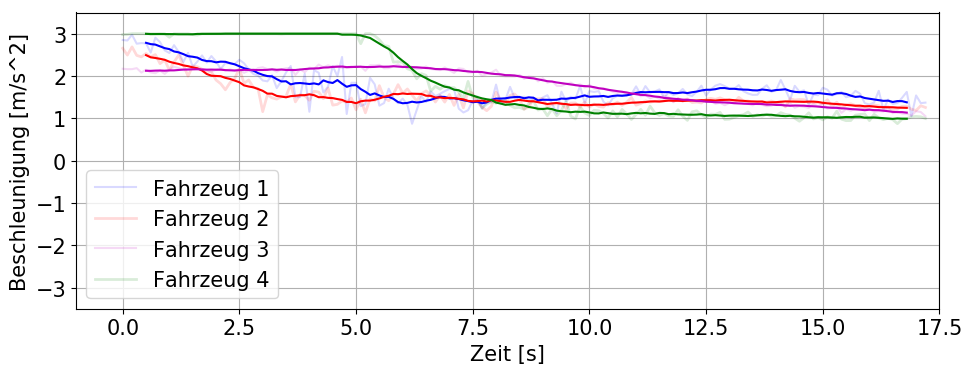

In [57]:
linewidth_para = 2

N_RA = 10
pltAlpha = 0.15

plt.figure(figsize=(10,4),dpi=100)

# print action
for time, action_1 in zip(times,actions_1):
    plt.plot(time[:-1],
             action_1[:-1],
             c='b',
             alpha=pltAlpha,
             label='Fahrzeug 1')
for time, action_2 in zip(times,actions_2):
    plt.plot(time[:-1],
             action_2[:-1],
             linewidth=linewidth_para,
             c='r',
             alpha=pltAlpha,
             label='Fahrzeug 2')
for time, action_3 in zip(times,actions_3):
    plt.plot(time[:-1],
             action_3[:-1],
             c='m',
             alpha=pltAlpha,
             label='Fahrzeug 3')
for time, action_4 in zip(times,actions_4):
    plt.plot(time[:-1],
             action_4[:-1],
             linewidth=linewidth_para,
             c='g',
             alpha=pltAlpha,
             label='Fahrzeug 4')

# print action with rolling avg
for time, action_1 in zip(times,actions_1):
    action_1_RA = np.convolve(action_1[:,0],np.ones((N_RA,))/N_RA,mode='valid')
    plt.plot(time[N_RA//2:-N_RA//2],
             action_1_RA[:-1],
             c='b')
for time, action_2 in zip(times,actions_2):
    action_2_RA = np.convolve(action_2[:,0],np.ones((N_RA,))/N_RA,mode='valid')
    plt.plot(time[N_RA//2:-N_RA//2],
             action_2_RA[:-1],
             c='r')
for time, action_3 in zip(times,actions_3):
    action_3_RA = np.convolve(action_3[:,0],np.ones((N_RA,))/N_RA,mode='valid')
    plt.plot(time[N_RA//2:-N_RA//2],
             action_3_RA[:-1],
             c='m')
for time, action_4 in zip(times,actions_4):
    action_4_RA = np.convolve(action_4[:,0],np.ones((N_RA,))/N_RA,mode='valid')
    plt.plot(time[N_RA//2:-N_RA//2],
             action_4_RA[:-1],
             c='g')    
plt.xlim(-1,17.5)
plt.legend(loc='lower left')
plt.xlabel('Zeit [s]')
plt.ylabel('Beschleunigung [m/s^2]')
plt.grid()
plt.tight_layout()
plt.ylim(-3.5,3.5)
plt.savefig("./Action_EX_V.png",dpi=100)

### D3) Vergleich der Geschwindigkeit beider Fahrzeuge

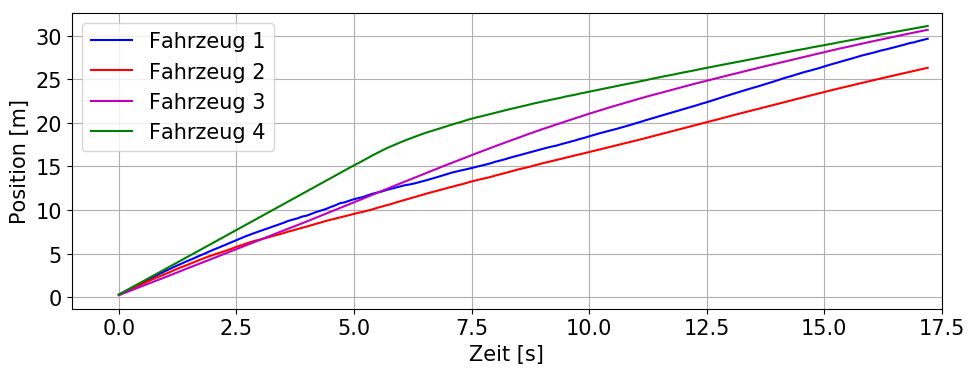

In [58]:
plt.figure(figsize=(10,4),dpi=100)

for time, veh_speed_1 in zip(times,veh_speeds_1):
    plt.plot(time[:-1],
             veh_speed_1[:-1],
             c='b',
             label='Fahrzeug 1')
for time, veh_speed_2 in zip(times,veh_speeds_2):
    plt.plot(time[:-1],
             veh_speed_2[:-1],
             c='r',
             label='Fahrzeug 2')
for time, veh_speed_3 in zip(times,veh_speeds_3):
    plt.plot(time[:-1],
             veh_speed_3[:-1],
             c='m',
             label='Fahrzeug 3')
for time, veh_speed_4 in zip(times,veh_speeds_4):
    plt.plot(time[:-1],
             veh_speed_4[:-1],
             c='g',
             label='Fahrzeug 4')
plt.xlim(-1,17.5)
plt.legend(loc='upper left')
plt.xlabel('Zeit [s]')
plt.ylabel('Position [m]')
plt.grid()
plt.tight_layout()
plt.savefig("./Geschwindigkeit_EX_V.png",dpi=100)

### D4) Position beider Fahrzeuge

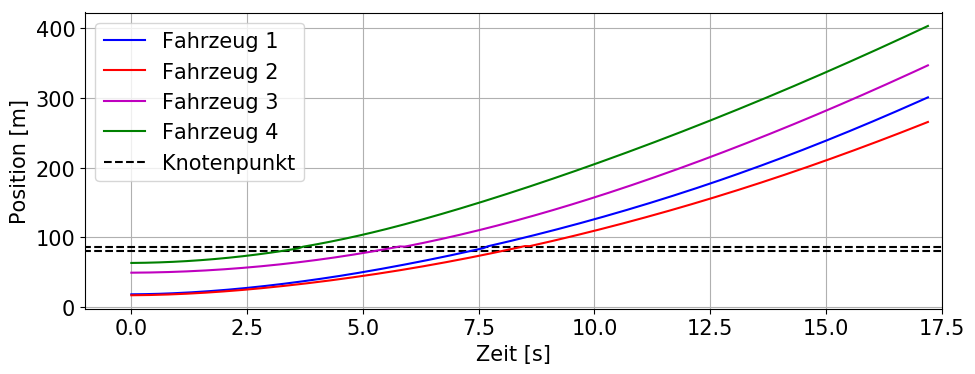

In [59]:
plt.figure(figsize=(10,4),dpi=100)
for time, veh_pos_1 in zip(times,veh_poss_1):
    plt.plot(time[:-1],
             veh_pos_1[:-1],
             c='b',
             label='Fahrzeug 1')
for time, veh_pos_2 in zip(times,veh_poss_2):
    plt.plot(time[:-1],
             veh_pos_2[:-1],
             c='r',
             label='Fahrzeug 2')
for time, veh_pos_3 in zip(times,veh_poss_3):
    plt.plot(time[:-1],
             veh_pos_3[:-1],
             c='m',
             label='Fahrzeug 3')
for time, veh_pos_4 in zip(times,veh_poss_4):
    plt.plot(time[:-1],
             veh_pos_4[:-1],
             c='g',
             label='Fahrzeug 4')

   
    
plt.hlines(80.0,xmin = -2, xmax = 18,linestyles = 'dashed', label = 'Knotenpunkt')
plt.hlines(86.2,xmin = -2, xmax = 18,linestyles = 'dashed')

plt.legend(loc='upper left')
plt.xlabel('Zeit [s]')
plt.ylabel('Position [m]')
plt.xlim(-1,17.5)
plt.grid()
plt.tight_layout()
plt.savefig("./Position_EX_V.png",dpi=100)